# Introduction to Human Activity Recognition

Here we will explore some common ways of preprocessing human activity recognition data.

Using the example data we will learn:
* how to merge multiple files into one large DataFrame
* how to split data into sliding windows
* how to quickly extract features from a window
* how to set the number of classes considered for classification
* how to build a simple Random Forest Classifier and train it on HAR data
* how to build a simple CNN and train it on HAR data 

Bear in mind that the sample data offered is not cleaned or high quality. You should not use it in your own experiments but it is useful for this tutorial.

You will need the following packages: 
* tsfresh
* scikit-learn
* tensorflow

#### Basic imports

In [1]:
import pandas as pd
import numpy as np
import tsfresh
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import tensorflow as tf

import os

import matplotlib.pyplot as plt

# keras goodies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv1D, Dropout, MaxPooling1D, BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras import metrics as kmetrics
import tensorflow.keras.backend as K

/afs/inf.ed.ac.uk/user/s19/s1973235/.local/lib/python3.8/site-packages/pandas/core/arrays/masked.py:59: UserWarning: Pandas requires version '1.3.2' or newer of 'bottleneck' (version '1.2.1' currently installed).
  from pandas.core import (


## Loading multiple files into one large DataFrame

At this stage you should only be working with clean data, saved in the format required for Coursework 1. An example of such data can be found in the Data/Clean/ folder.

In [2]:
base_df = pd.DataFrame()

clean_data_folder = "train_data"

for filename in os.listdir(clean_data_folder):
    full_path = f"{clean_data_folder}/{filename}"
    
    if "Falling" not in full_path:
    # load data into a DataFrame
        print(full_path)
        new_df = pd.read_csv(full_path)
    
        # merge into the base DataFrame
        base_df = pd.concat([base_df, new_df])

train_data/Resepck_s1714206_Climbing_stairs.csv
train_data/Resepck_s1714206_Descending_stairs.csv
train_data/Resepck_s1714206_Desk_work.csv
train_data/Resepck_s1714206_Lying down left.csv
train_data/Resepck_s1714206_Lying_down_on_back.csv
train_data/Resepck_s1714206_Lying_down_on_stomach.csv
train_data/Resepck_s1714206_Lying_down_right.csv
train_data/Resepck_s1714206_Movement.csv
train_data/Resepck_s1714206_Running.csv
train_data/Resepck_s1714206_Sitting.csv
train_data/Resepck_s1714206_Sitting_bent_backwards.csv
train_data/Resepck_s1714206_Sitting_bent_forward.csv
train_data/Resepck_s1714206_Walking.csv
train_data/Respeck_s1541031_Climbing stairs_06-10-2021_11-25-43.csv
train_data/Respeck_s1541031_Descending stairs_06-10-2021_11-25-05.csv
train_data/Respeck_s1541031_Desk work_06-10-2021_11-04-49.csv
train_data/Respeck_s1541031_Lying down left_06-10-2021_14-30-04.csv
train_data/Respeck_s1541031_Lying down on back_06-10-2021_11-15-13.csv
train_data/Respeck_s1541031_Lying down on stomach_

train_data/Respeck_s1724067_Lying down on stomach_03-10-2021_16-38-06.csv
train_data/Respeck_s1724067_Lying down right_03-10-2021_16-32-52.csv
train_data/Respeck_s1724067_Movement_06-10-2021_19-32-46.csv
train_data/Respeck_s1724067_Running_06-10-2021_19-55-17.csv
train_data/Respeck_s1724067_Sitting bent backward_03-10-2021_16-28-44.csv
train_data/Respeck_s1724067_Sitting bent forward_03-10-2021_16-27-22.csv
train_data/Respeck_s1724067_Sitting_03-10-2021_16-25-59.csv
train_data/Respeck_s1724067_Standing_03-10-2021_16-29-48.csv
train_data/Respeck_s1724067_Walking at normal speed_06-10-2021_19-54-01.csv
train_data/Respeck_s1724279_Climbing stairs_30-09-2021_12-42-15.csv
train_data/Respeck_s1724279_Descending stairs_07-10-2021_16-28-34.csv
train_data/Respeck_s1724279_Desk work_06-10-2021_12-34-21.csv
train_data/Respeck_s1724279_Lying down left_30-09-2021_12-36-48.csv
train_data/Respeck_s1724279_Lying down on back_30-09-2021_12-35-42.csv
train_data/Respeck_s1724279_Lying down on stomach_30-

train_data/Respeck_s1801931_Sitting bent forward_05-10-2021_22-56-09.csv
train_data/Respeck_s1801931_Sitting_05-10-2021_22-46-37.csv
train_data/Respeck_s1801931_Standing_05-10-2021_22-38-33.csv
train_data/Respeck_s1801931_Walking at normal speed_06-10-2021_00-19-32.csv
train_data/Respeck_s1809887_Climbing stairs_29-09-2022_12-41-55.csv
train_data/Respeck_s1809887_Descending stairs_29-09-2022_12-26-57.csv
train_data/Respeck_s1809887_Desk work_27-09-2022_15-09-34.csv
train_data/Respeck_s1809887_Lying down left_27-09-2022_15-00-55.csv
train_data/Respeck_s1809887_Lying down on back_27-09-2022_14-59-54.csv
train_data/Respeck_s1809887_Lying down on stomach_27-09-2022_15-04-05.csv
train_data/Respeck_s1809887_Lying down right_27-09-2022_15-03-09.csv
train_data/Respeck_s1809887_Movement_27-09-2022_15-11-36.csv
train_data/Respeck_s1809887_Running_29-09-2022_12-37-49.csv
train_data/Respeck_s1809887_Sitting bent backward_27-09-2022_14-56-45.csv
train_data/Respeck_s1809887_Sitting bent forward_27-0

train_data/Respeck_s1824891_Sitting bent backward_06-10-2021_16-42-14.csv
train_data/Respeck_s1824891_Sitting bent forward_06-10-2021_16-41-00.csv
train_data/Respeck_s1824891_Sitting_07-10-2021_22-17-50.csv
train_data/Respeck_s1824891_Standing_07-10-2021_22-15-47.csv
train_data/Respeck_s1824891_Walking at normal speed_06-10-2021_16-59-35.csv
train_data/Respeck_s1826377_Climbing stairs_07-10-2022_09-28-54-2.csv
train_data/Respeck_s1826377_Descending stairs_07-10-2022_09-29-45-2.csv
train_data/Respeck_s1826377_Desk work_30-09-2022_02-05-57.csv
train_data/Respeck_s1826377_Lying down left_28-09-2022_22-20-25.csv
train_data/Respeck_s1826377_Lying down on back_28-09-2022_22-18-43.csv
train_data/Respeck_s1826377_Lying down on stomach_28-09-2022_22-28-16.csv
train_data/Respeck_s1826377_Lying down right_28-09-2022_22-22-54.csv
train_data/Respeck_s1826377_Movement_28-09-2022_22-37-31.csv
train_data/Respeck_s1826377_Running_28-09-2022_23-03-32.csv
train_data/Respeck_s1826377_Sitting bent backward

train_data/Respeck_s1841064_Lying down on stomach_29-09-2021_13-33-46.csv
train_data/Respeck_s1841064_Lying down right_06-10-2021_15-06-57.csv
train_data/Respeck_s1841064_Movement_29-09-2021_13-54-37.csv
train_data/Respeck_s1841064_Running_29-09-2021_13-46-50.csv
train_data/Respeck_s1841064_Sitting bent backward_06-10-2021_14-57-36.csv
train_data/Respeck_s1841064_Sitting bent forward_06-10-2021_14-59-27.csv
train_data/Respeck_s1841064_Sitting_06-10-2021_15-00-45.csv
train_data/Respeck_s1841064_Standing_06-10-2021_15-03-25.csv
train_data/Respeck_s1841064_Walking at normal speed_29-09-2021_13-49-01.csv
train_data/Respeck_s1842093_Climbing stairs_06-10-2021_11-12-31.csv
train_data/Respeck_s1842093_Descending stairs_06-10-2021_11-13-53.csv
train_data/Respeck_s1842093_Desk work_05-10-2021_18-45-49.csv
train_data/Respeck_s1842093_Lying down left_05-10-2021_18-15-43.csv
train_data/Respeck_s1842093_Lying down on back_05-10-2021_18-12-01.csv
train_data/Respeck_s1842093_Lying down on stomach_05-

train_data/Respeck_s1862671_Sitting bent backward_05-10-2022_22-25-52.csv
train_data/Respeck_s1862671_Sitting bent forward_22-09-2022_21-50-21.csv
train_data/Respeck_s1862671_Sitting_04-10-2022_12-45-29.csv
train_data/Respeck_s1862671_Standing_04-10-2022_12-43-00.csv
train_data/Respeck_s1862671_Walking at normal speed_22-09-2022_21-09-24.csv
train_data/Respeck_s1863792_Climbing stairs_05-10-2022_16-17-08.csv
train_data/Respeck_s1863792_Descending stairs_05-10-2022_16-18-15.csv
train_data/Respeck_s1863792_Desk work_23-09-2022_15-49-23.csv
train_data/Respeck_s1863792_Lying down left_23-09-2022_15-34-31.csv
train_data/Respeck_s1863792_Lying down on back_23-09-2022_15-39-05.csv
train_data/Respeck_s1863792_Lying down on stomach_23-09-2022_15-37-42.csv
train_data/Respeck_s1863792_Lying down right_23-09-2022_15-36-02.csv
train_data/Respeck_s1863792_Movement_23-09-2022_15-53-04.csv
train_data/Respeck_s1863792_Running_23-09-2022_17-09-20.csv
train_data/Respeck_s1863792_Sitting bent backward_23-

train_data/Respeck_s1893474_Lying down on stomach_07-10-2021_11-46-04.csv
train_data/Respeck_s1893474_Lying down right_05-10-2021_23-46-34.csv
train_data/Respeck_s1893474_Movement_07-10-2021_11-44-12.csv
train_data/Respeck_s1893474_Running_06-10-2021_00-04-37.csv
train_data/Respeck_s1893474_Sitting bent backward_08-10-2021_11-20-46.csv
train_data/Respeck_s1893474_Sitting bent forward_04-10-2021_01-39-57.csv
train_data/Respeck_s1893474_Sitting_08-10-2021_11-16-55.csv
train_data/Respeck_s1893474_Standing_05-10-2021_23-39-23.csv
train_data/Respeck_s1893474_Walking at normal speed_06-10-2021_00-03-45.csv
train_data/Respeck_s1893835_Climbing stairs_06-10-2021_11-21-50.csv
train_data/Respeck_s1893835_Descending stairs_06-10-2021_11-23-03.csv
train_data/Respeck_s1893835_Desk work_29-09-2021_11-01-31.csv
train_data/Respeck_s1893835_Lying down left_29-09-2021_10-59-07.csv
train_data/Respeck_s1893835_Lying down on back_29-09-2021_10-57-28.csv
train_data/Respeck_s1893835_Lying down on stomach_29-

train_data/Respeck_s1911027_Running_04-10-2022_15-26-46.csv
train_data/Respeck_s1911027_Sitting bent backward_27-09-2022_11-24-30.csv
train_data/Respeck_s1911027_Sitting bent forward_04-10-2022_15-52-16.csv
train_data/Respeck_s1911027_Sitting_04-10-2022_16-03-16.csv
train_data/Respeck_s1911027_Standing_04-10-2022_15-50-05.csv
train_data/Respeck_s1911027_Walking at normal speed_27-09-2022_11-35-30.csv
train_data/Respeck_s1911455_Climbing stairs_04-10-2022_15-18-24.csv
train_data/Respeck_s1911455_Descending stairs_04-10-2022_15-17-25.csv
train_data/Respeck_s1911455_Desk work_23-09-2022_17-17-39.csv
train_data/Respeck_s1911455_Lying down left_23-09-2022_17-22-47.csv
train_data/Respeck_s1911455_Lying down on back_23-09-2022_17-22-09.csv
train_data/Respeck_s1911455_Lying down on stomach_04-10-2022_15-13-28.csv
train_data/Respeck_s1911455_Lying down right_23-09-2022_17-21-29.csv
train_data/Respeck_s1911455_Movement_23-09-2022_17-24-15.csv
train_data/Respeck_s1911455_Running_23-09-2022_17-34-

train_data/Respeck_s1923449_Lying down right_28-09-2022_14-20-13.csv
train_data/Respeck_s1923449_Movement_28-09-2022_15-59-29.csv
train_data/Respeck_s1923449_Running_28-09-2022_15-41-21.csv
train_data/Respeck_s1923449_Sitting bent backward_28-09-2022_14-07-57.csv
train_data/Respeck_s1923449_Sitting bent forward_28-09-2022_14-05-44.csv
train_data/Respeck_s1923449_Sitting_28-09-2022_14-03-34.csv
train_data/Respeck_s1923449_Standing_28-09-2022_14-10-59.csv
train_data/Respeck_s1923449_Walking at normal speed_28-09-2022_15-39-53.csv
train_data/Respeck_s1923493_Climbing stairs_02-10-2022_15-16-09.csv
train_data/Respeck_s1923493_Descending stairs_02-10-2022_15-15-07.csv
train_data/Respeck_s1923493_Desk work_02-10-2022_16-00-59.csv
train_data/Respeck_s1923493_Lying down left_02-10-2022_16-07-03.csv
train_data/Respeck_s1923493_Lying down on back_02-10-2022_16-04-08.csv
train_data/Respeck_s1923493_Lying down on stomach_02-10-2022_16-12-59.csv
train_data/Respeck_s1923493_Lying down right_02-10-20

train_data/Respeck_s1941321_Movement_04-10-2022_10-59-19.csv
train_data/Respeck_s1941321_Running_04-10-2022_11-10-47.csv
train_data/Respeck_s1941321_Sitting bent backward_04-10-2022_10-54-23.csv
train_data/Respeck_s1941321_Sitting bent forward_04-10-2022_10-53-18.csv
train_data/Respeck_s1941321_Sitting_04-10-2022_10-52-21.csv
train_data/Respeck_s1941321_Standing_04-10-2022_10-56-06.csv
train_data/Respeck_s1941321_Walking at normal speed_04-10-2022_11-09-11.csv
train_data/Respeck_s1948094_Climbing stairs_23-09-2022_12-51-37.csv
train_data/Respeck_s1948094_Descending stairs_23-09-2022_12-53-24.csv
train_data/Respeck_s1948094_Desk work_23-09-2022_12-01-53.csv
train_data/Respeck_s1948094_Lying down left_23-09-2022_11-54-37.csv
train_data/Respeck_s1948094_Lying down on back_23-09-2022_11-59-08.csv
train_data/Respeck_s1948094_Lying down on stomach_23-09-2022_11-57-49.csv
train_data/Respeck_s1948094_Lying down right_23-09-2022_11-56-22.csv
train_data/Respeck_s1948094_Movement_23-09-2022_12-58

train_data/Respeck_s1962038_Sitting bent backward_04-10-2022_14-47-08.csv
train_data/Respeck_s1962038_Sitting bent forward_23-09-2022_14-56-59.csv
train_data/Respeck_s1962038_Sitting_23-09-2022_14-54-11.csv
train_data/Respeck_s1962038_Standing_04-10-2022_14-45-21.csv
train_data/Respeck_s1962038_Walking at normal speed_02-10-2022_19-03-08.csv
train_data/Respeck_s1965695_Climbing stairs_29-09-2022_17-32-23.csv
train_data/Respeck_s1965695_Descending stairs_29-09-2022_17-31-42.csv
train_data/Respeck_s1965695_Desk work_29-09-2022_13-43-35.csv
train_data/Respeck_s1965695_Lying down left_29-09-2022_13-34-41.csv
train_data/Respeck_s1965695_Lying down on back_29-09-2022_13-32-30.csv
train_data/Respeck_s1965695_Lying down on stomach_29-09-2022_13-37-53.csv
train_data/Respeck_s1965695_Lying down right_29-09-2022_13-35-36.csv
train_data/Respeck_s1965695_Movement_29-09-2022_13-40-59.csv
train_data/Respeck_s1965695_Running_04-10-2022_19-39-27.csv
train_data/Respeck_s1965695_Sitting bent backward_29-

train_data/Respeck_s1977764_Movement_24-09-2022_15-50-36.csv
train_data/Respeck_s1977764_Running_24-09-2022_15-46-23.csv
train_data/Respeck_s1977764_Sitting bent backward_24-09-2022_15-38-53.csv
train_data/Respeck_s1977764_Sitting bent forward_24-09-2022_15-37-51.csv
train_data/Respeck_s1977764_Sitting_24-09-2022_15-36-44.csv
train_data/Respeck_s1977764_Standing_24-09-2022_15-39-50.csv
train_data/Respeck_s1977764_Walking at normal speed_24-09-2022_15-45-27.csv
train_data/Respeck_s1992413_Climbing stairs_29-09-2022_17-49-07.csv
train_data/Respeck_s1992413_Descending stairs_29-09-2022_17-48-20.csv
train_data/Respeck_s1992413_Desk work_29-09-2022_18-44-24.csv
train_data/Respeck_s1992413_Lying down left_05-10-2022_00-39-59.csv
train_data/Respeck_s1992413_Lying down on back_05-10-2022_00-42-59.csv
train_data/Respeck_s1992413_Lying down on stomach_05-10-2022_10-40-11.csv
train_data/Respeck_s1992413_Lying down right_05-10-2022_00-20-45.csv
train_data/Respeck_s1992413_Movement_28-09-2022_11-03

train_data/Respeck_s2181154_Movement_29-09-2021_14-13-07.csv
train_data/Respeck_s2181154_Running_29-09-2021_14-01-11.csv
train_data/Respeck_s2181154_Sitting bent backward_29-09-2021_14-10-58.csv
train_data/Respeck_s2181154_Sitting bent forward_29-09-2021_14-09-26.csv
train_data/Respeck_s2181154_Sitting_29-09-2021_13-58-39.csv
train_data/Respeck_s2181154_Standing_03-10-2021_17-44-24.csv
train_data/Respeck_s2181154_Walking at normal speed_29-09-2021_14-00-32.csv
train_data/Respeck_s2192970_Climbing stairs_29-09-2021_21-39-04.csv
train_data/Respeck_s2192970_Descending stairs_29-09-2021_21-39-49.csv
train_data/Respeck_s2192970_Desk work_29-09-2021_20-24-25.csv
train_data/Respeck_s2192970_Lying down left_29-09-2021_20-26-47.csv
train_data/Respeck_s2192970_Lying down on back_29-09-2021_20-26-05.csv
train_data/Respeck_s2192970_Lying down on stomach_29-09-2021_20-28-13.csv
train_data/Respeck_s2192970_Lying down right_29-09-2021_20-27-26.csv
train_data/Respeck_s2192970_Movement_29-09-2021_21-36

train_data/Respeck_s2298733_Lying down on back_30-09-2022_16-31-50.csv
train_data/Respeck_s2298733_Lying down on stomach_30-09-2022_16-33-56.csv
train_data/Respeck_s2298733_Lying down right_30-09-2022_16-33-11.csv
train_data/Respeck_s2298733_Movement_30-09-2022_17-21-20.csv
train_data/Respeck_s2298733_Running_30-09-2022_17-23-14.csv
train_data/Respeck_s2298733_Sitting bent backward_30-09-2022_16-30-04.csv
train_data/Respeck_s2298733_Sitting bent forward_30-09-2022_16-29-25.csv
train_data/Respeck_s2298733_Sitting_30-09-2022_16-28-26.csv
train_data/Respeck_s2298733_Standing_30-09-2022_16-30-43.csv
train_data/Respeck_s2298733_Walking at normal speed_30-09-2022_17-22-31.csv
train_data/Respeck_s2299270_Climbing stairs_03-10-2022_19-37-38.csv
train_data/Respeck_s2299270_Descending stairs_03-10-2022_19-39-22.csv
train_data/Respeck_s2299270_Desk work_03-10-2022_17-28-14.csv
train_data/Respeck_s2299270_Lying down left_03-10-2022_16-00-31.csv
train_data/Respeck_s2299270_Lying down on back_03-10-

train_data/Thingy_s1706154_Desk work_29-09-2021_13-46-45.csv
train_data/Thingy_s1706154_Lying down left_29-09-2021_13-39-25.csv
train_data/Thingy_s1706154_Lying down on back_29-09-2021_13-38-37.csv
train_data/Thingy_s1706154_Lying down on stomach_29-09-2021_13-40-54.csv
train_data/Thingy_s1706154_Lying down right_29-09-2021_13-40-09.csv
train_data/Thingy_s1706154_Movement_29-09-2021_13-45-55.csv
train_data/Thingy_s1706154_Running_29-09-2021_13-42-37.csv
train_data/Thingy_s1706154_Sitting bent backward_29-09-2021_13-37-47.csv
train_data/Thingy_s1706154_Sitting bent forward_29-09-2021_13-37-04.csv
train_data/Thingy_s1706154_Sitting_29-09-2021_12-44-18.csv
train_data/Thingy_s1706154_Standing_06-10-2021_12-53-58.csv
train_data/Thingy_s1706154_Walking at normal speed_29-09-2021_13-41-56.csv
train_data/Thingy_s1711661_Climbing stairs_23-09-2021_21-01-08.csv
train_data/Thingy_s1711661_Descending stairs_23-09-2021_21-00-17.csv
train_data/Thingy_s1711661_Desk work_23-09-2021_21-10-19.csv
train_

train_data/Thingy_s1732873_Sitting bent backward_04-10-2021_13-44-31.csv
train_data/Thingy_s1732873_Sitting bent backward_30-09-2022_14-07-58.csv
train_data/Thingy_s1732873_Sitting bent forward_04-10-2021_13-43-53.csv
train_data/Thingy_s1732873_Sitting bent forward_30-09-2022_13-46-08.csv
train_data/Thingy_s1732873_Sitting_04-10-2021_13-42-27.csv
train_data/Thingy_s1732873_Sitting_30-09-2022_13-45-22.csv
train_data/Thingy_s1732873_Standing_04-10-2021_13-45-11.csv
train_data/Thingy_s1732873_Standing_30-09-2022_14-09-08.csv
train_data/Thingy_s1732873_Walking at normal speed_04-10-2021_15-31-05.csv
train_data/Thingy_s1732873_Walking at normal speed_30-09-2022_14-14-14.csv
train_data/Thingy_s1757177_Climbing stairs_06-10-2021_16-35-56.csv
train_data/Thingy_s1757177_Descending stairs_06-10-2021_16-35-09.csv
train_data/Thingy_s1757177_Desk work_02-10-2021_13-48-52.csv
train_data/Thingy_s1757177_Lying down left_06-10-2021_20-35-46.csv
train_data/Thingy_s1757177_Lying down on back_06-10-2021_2

train_data/Thingy_s1817455_Lying down on back_29-09-2021_14-43-45.csv
train_data/Thingy_s1817455_Lying down on stomach_29-09-2021_14-42-26.csv
train_data/Thingy_s1817455_Lying down right_29-09-2021_14-41-01.csv
train_data/Thingy_s1817455_Movement_29-09-2021_14-49-30.csv
train_data/Thingy_s1817455_Running_29-09-2021_14-58-21.csv
train_data/Thingy_s1817455_Sitting bent backward_29-09-2021_14-25-28.csv
train_data/Thingy_s1817455_Sitting bent forward_29-09-2021_14-23-21.csv
train_data/Thingy_s1817455_Sitting_29-09-2021_14-21-18.csv
train_data/Thingy_s1817455_Standing_29-09-2021_14-27-26.csv
train_data/Thingy_s1817967_Running_30-09-2022_17-07-14.csv
train_data/Thingy_s1817455_Walking at normal speed_29-09-2021_14-55-03.csv
train_data/Thingy_s1817967_Climbing stairs_30-09-2022_17-09-17.csv
train_data/Thingy_s1817967_Descending stairs_30-09-2022_17-09-55.csv
train_data/Thingy_s1817967_Desk work_30-09-2022_17-11-38.csv
train_data/Thingy_s1817967_Lying down left_30-09-2022_17-03-05.csv
train_da

train_data/Thingy_s1832512_Lying down on back_02-10-2022_15-42-31.csv
train_data/Thingy_s1832512_Lying down on stomach_02-10-2022_15-43-34.csv
train_data/Thingy_s1832512_Lying down right_02-10-2022_15-39-31.csv
train_data/Thingy_s1832512_Movement_05-10-2022_11-27-35.csv
train_data/Thingy_s1832512_Running_05-10-2022_11-38-40.csv
train_data/Thingy_s1832512_Sitting bent backward_02-10-2022_15-29-04.csv
train_data/Thingy_s1832512_Sitting bent forward_07-10-2022_10-29-33.csv
train_data/Thingy_s1832512_Sitting_02-10-2022_15-25-34.csv
train_data/Thingy_s1832512_Standing_05-10-2022_11-23-45.csv
train_data/Thingy_s1832512_Walking at normal speed_07-10-2022_11-27-12.csv
train_data/Thingy_s1834237_Climbing stairs_30-09-2022_17-54-34.csv
train_data/Thingy_s1834237_Descending stairs_30-09-2022_17-55-23.csv
train_data/Thingy_s1834237_Desk work_30-09-2022_17-51-25.csv
train_data/Thingy_s1834237_Lying down left_30-09-2022_17-15-26.csv
train_data/Thingy_s1834237_Lying down on back_30-09-2022_17-10-14.c

train_data/Thingy_s1850642_Lying down on back_29-09-2021_13-18-10.csv
train_data/Thingy_s1850642_Lying down on stomach_29-09-2021_13-20-54.csv
train_data/Thingy_s1850642_Lying down right_29-09-2021_13-20-04.csv
train_data/Thingy_s1850642_Movement_29-09-2021_13-27-54.csv
train_data/Thingy_s1850642_Running_29-09-2021_13-24-04.csv
train_data/Thingy_s1850642_Sitting bent backward_29-09-2021_13-16-26.csv
train_data/Thingy_s1850642_Sitting bent forward_29-09-2021_13-15-41.csv
train_data/Thingy_s1850642_Sitting_29-09-2021_12-49-46.csv
train_data/Thingy_s1850642_Standing_29-09-2021_13-17-14.csv
train_data/Thingy_s1850642_Walking at normal speed_29-09-2021_13-22-31.csv
train_data/Thingy_s1852056_Climbing stairs_05-10-2022_14-36-59.csv
train_data/Thingy_s1852056_Descending stairs_05-10-2022_14-38-20.csv
train_data/Thingy_s1852056_Desk work_05-10-2022_15-04-41.csv
train_data/Thingy_s1852056_Lying down left_05-10-2022_15-15-29.csv
train_data/Thingy_s1852056_Lying down on back_05-10-2022_15-12-55.c

train_data/Thingy_s1865890_Lying down left_07-10-2021_00-47-00.csv
train_data/Thingy_s1865890_Lying down on back_07-10-2021_00-46-05.csv
train_data/Thingy_s1865890_Lying down on stomach_07-10-2021_00-48-11.csv
train_data/Thingy_s1865890_Lying down right_07-10-2021_20-12-04.csv
train_data/Thingy_s1865890_Movement_07-10-2021_00-40-22.csv
train_data/Thingy_s1865890_Running_07-10-2021_09-20-56.csv
train_data/Thingy_s1865890_Sitting bent backward_07-10-2021_00-35-45.csv
train_data/Thingy_s1865890_Sitting bent forward_07-10-2021_00-34-28.csv
train_data/Thingy_s1865890_Sitting_07-10-2021_20-09-57.csv
train_data/Thingy_s1865890_Standing_07-10-2021_00-36-52.csv
train_data/Thingy_s1865890_Walking at normal speed_07-10-2021_09-19-52.csv
train_data/Thingy_s1870467_Climbing stairs_06-10-2021_11-26-05.csv
train_data/Thingy_s1870467_Descending stairs_06-10-2021_11-26-56.csv
train_data/Thingy_s1870467_Desk work_29-09-2021_11-50-15.csv
train_data/Thingy_s1870467_Lying down left_29-09-2021_11-47-22.csv


train_data/Thingy_s1901843_Lying down left_24-09-2022_16-46-17.csv
train_data/Thingy_s1901843_Lying down on back_24-09-2022_16-45-33.csv
train_data/Thingy_s1901843_Lying down on stomach_24-09-2022_16-47-52.csv
train_data/Thingy_s1901843_Lying down right_24-09-2022_16-47-08.csv
train_data/Thingy_s1901843_Movement_24-09-2022_16-42-42.csv
train_data/Thingy_s1901843_Running_24-09-2022_16-40-18.csv
train_data/Thingy_s1901843_Sitting bent backward_24-09-2022_16-37-04.csv
train_data/Thingy_s1901843_Sitting_24-09-2022_16-35-39.csv
train_data/Thingy_s1901843_Sitting bent forward_24-09-2022_16-36-22.csv
train_data/Thingy_s1901843_Standing_24-09-2022_16-37-53.csv
train_data/Thingy_s1901843_Walking at normal speed_24-09-2022_16-39-22.csv
train_data/Thingy_s1904845_Climbing stairs_05-10-2022_19-17-14.csv
train_data/Thingy_s1904845_Descending stairs_05-10-2022_19-16-29.csv
train_data/Thingy_s1904845_Desk work_05-10-2022_19-24-42.csv
train_data/Thingy_s1904845_Lying down left_05-10-2022_18-57-03.csv


train_data/Thingy_s1915425_Desk work_28-09-2022_12-31-34.csv
train_data/Thingy_s1915425_Lying down left_28-09-2022_12-22-29.csv
train_data/Thingy_s1915425_Lying down on back_28-09-2022_12-20-39.csv
train_data/Thingy_s1915425_Lying down on stomach_28-09-2022_12-25-03.csv
train_data/Thingy_s1915425_Lying down right_28-09-2022_12-23-47.csv
train_data/Thingy_s1915425_Movement_28-09-2022_12-32-52.csv
train_data/Thingy_s1915425_Running_28-09-2022_14-30-07.csv
train_data/Thingy_s1915425_Sitting bent backward_28-09-2022_12-29-46.csv
train_data/Thingy_s1915425_Sitting bent forward_28-09-2022_12-28-00.csv
train_data/Thingy_s1915425_Sitting_28-09-2022_18-50-36.csv
train_data/Thingy_s1915425_Standing_28-09-2022_14-28-46.csv
train_data/Thingy_s1915425_Walking at normal speed_28-09-2022_14-31-25.csv
train_data/Thingy_s1918258_Climbing stairs_29-09-2022_18-03-40.csv
train_data/Thingy_s1918258_Descending stairs_29-09-2022_18-03-00.csv
train_data/Thingy_s1918258_Desk work_04-10-2022_16-36-52.csv
train_

train_data/Thingy_s1925715_Desk work_27-09-2022_11-55-10.csv
train_data/Thingy_s1925715_Lying down left_28-09-2022_16-59-32.csv
train_data/Thingy_s1925715_Lying down on back_28-09-2022_12-09-16.csv
train_data/Thingy_s1925715_Lying down on stomach_28-09-2022_12-16-22.csv
train_data/Thingy_s1925715_Lying down right_28-09-2022_12-15-06.csv
train_data/Thingy_s1925715_Movement_27-09-2022_11-56-37.csv
train_data/Thingy_s1925715_Running_28-09-2022_14-25-04.csv
train_data/Thingy_s1925715_Sitting bent backward_27-09-2022_11-52-14.csv
train_data/Thingy_s1925715_Sitting bent forward_27-09-2022_11-50-35.csv
train_data/Thingy_s1925715_Sitting_27-09-2022_11-49-17.csv
train_data/Thingy_s1925715_Standing_27-09-2022_11-53-35.csv
train_data/Thingy_s1925715_Walking at normal speed_28-09-2022_14-26-40.csv
train_data/Thingy_s1926989_Climbing stairs_04-10-2022_13-54-00.csv
train_data/Thingy_s1926989_Descending stairs_04-10-2022_13-55-16.csv
train_data/Thingy_s1926989_Desk work_03-10-2022_15-43-01.csv
train_

train_data/Thingy_s1956488_Descending stairs_30-09-2022_15-38-26.csv
train_data/Thingy_s1956488_Desk work_30-09-2022_15-34-56.csv
train_data/Thingy_s1956488_Lying down left_30-09-2022_15-32-01.csv
train_data/Thingy_s1956488_Lying down on back_30-09-2022_15-30-08.csv
train_data/Thingy_s1956488_Lying down on stomach_30-09-2022_15-32-48.csv
train_data/Thingy_s1956488_Running_05-10-2022_10-20-36.csv
train_data/Thingy_s1956488_Lying down right_30-09-2022_15-31-06.csv
train_data/Thingy_s1956488_Movement_30-09-2022_15-36-04.csv
train_data/Thingy_s1956488_Sitting bent backward_30-09-2022_15-25-41.csv
train_data/Thingy_s1956488_Sitting bent forward_06-10-2022_15-16-08.csv
train_data/Thingy_s1956488_Sitting_30-09-2022_15-20-57.csv
train_data/Thingy_s1956488_Standing_30-09-2022_15-28-40.csv
train_data/Thingy_s1956488_Walking at normal speed_05-10-2022_10-19-12.csv
train_data/Thingy_s1957847_Climbing stairs_05-10-2022_17-07-14.csv
train_data/Thingy_s1957847_Descending stairs_05-10-2022_17-06-24.cs

train_data/Thingy_s1970333_Climbing stairs_13-10-2021_23-35-47.csv
train_data/Thingy_s1970333_Descending stairs_13-10-2021_23-36-28.csv
train_data/Thingy_s1970333_Desk work_15-10-2021_02-30-14.csv
train_data/Thingy_s1970333_Lying down left_13-10-2021_21-33-10.csv
train_data/Thingy_s1970333_Lying down on back_13-10-2021_21-36-19.csv
train_data/Thingy_s1970333_Lying down on stomach_13-10-2021_21-40-53.csv
train_data/Thingy_s1970333_Lying down right_13-10-2021_21-37-27.csv
train_data/Thingy_s1970333_Movement_13-10-2021_21-55-05.csv
train_data/Thingy_s1970333_Running_13-10-2021_22-15-18.csv
train_data/Thingy_s1970333_Sitting bent backward_13-10-2021_21-26-48.csv
train_data/Thingy_s1970333_Sitting bent forward_13-10-2021_21-28-19.csv
train_data/Thingy_s1970333_Sitting_13-10-2021_21-20-58.csv
train_data/Thingy_s1970333_Standing_13-10-2021_21-29-53.csv
train_data/Thingy_s1970333_Walking at normal speed_13-10-2021_22-03-21.csv
train_data/Thingy_s1973139_Climbing stairs_03-10-2022_18-05-30.csv


train_data/Thingy_s1998909_Walking at normal speed_03-10-2022_16-32-54.csv
train_data/Thingy_s2119637_Climbing stairs_03-10-2021_23-40-48.csv
train_data/Thingy_s2119637_Descending stairs_03-10-2021_23-37-19.csv
train_data/Thingy_s2119637_Desk work_03-10-2021_23-22-43.csv
train_data/Thingy_s2119637_Lying down left_03-10-2021_23-17-46.csv
train_data/Thingy_s2119637_Lying down on back_03-10-2021_23-21-36.csv
train_data/Thingy_s2119637_Lying down on stomach_03-10-2021_23-19-46.csv
train_data/Thingy_s2119637_Lying down right_03-10-2021_23-18-46.csv
train_data/Thingy_s2119637_Movement_03-10-2021_23-23-45.csv
train_data/Thingy_s2119637_Running_03-10-2021_23-39-22.csv
train_data/Thingy_s2119637_Sitting bent backward_03-10-2021_23-15-47.csv
train_data/Thingy_s2119637_Sitting_03-10-2021_23-13-50.csv
train_data/Thingy_s2119637_Sitting bent forward_03-10-2021_23-14-57.csv
train_data/Thingy_s2119637_Standing_03-10-2021_23-16-46.csv
train_data/Thingy_s2119637_Walking at normal speed_03-10-2021_23-38

train_data/Thingy_s2211228_Sitting_29-09-2021_16-46-08.csv
train_data/Thingy_s2211228_Standing_06-10-2021_19-41-21.csv
train_data/Thingy_s2211228_Walking at normal speed_06-10-2021_19-48-08.csv
train_data/Thingy_s2212045_Climbing stairs_29-09-2021_13-37-28.csv
train_data/Thingy_s2212045_Descending stairs_29-09-2021_13-36-47.csv
train_data/Thingy_s2212045_Desk work_29-09-2021_11-59-56.csv
train_data/Thingy_s2212045_Running_29-09-2021_13-38-58.csv
train_data/Thingy_s2212045_Lying down left_29-09-2021_11-57-39.csv
train_data/Thingy_s2212045_Lying down on back_29-09-2021_11-56-56.csv
train_data/Thingy_s2212045_Lying down on stomach_29-09-2021_11-59-03.csv
train_data/Thingy_s2212045_Lying down right_29-09-2021_11-58-22.csv
train_data/Thingy_s2212045_Movement_29-09-2021_12-00-40.csv
train_data/Thingy_s2212045_Sitting bent backward_03-10-2021_17-23-22.csv
train_data/Thingy_s2212045_Sitting bent forward_03-10-2021_17-19-36.csv
train_data/Thingy_s2212045_Sitting_03-10-2021_17-18-53.csv
train_da

train_data/Thingy_s2303866_Running_29-09-2022_13-24-27.csv
train_data/Thingy_s2303866_Sitting bent backward_29-09-2022_12-50-27.csv
train_data/Thingy_s2303866_Sitting bent forward_29-09-2022_12-48-41.csv
train_data/Thingy_s2303866_Sitting_29-09-2022_12-46-56.csv
train_data/Thingy_s2303866_Standing_29-09-2022_12-54-56.csv
train_data/Thingy_s2303866_Walking at normal speed_29-09-2022_13-03-34.csv
train_data/Thingy_s2308859_Climbing stairs_05-10-2022_13-00-00.csv
train_data/Thingy_s2308859_Descending stairs_05-10-2022_12-55-02.csv
train_data/Thingy_s2308859_Desk work_05-10-2022_11-54-06.csv
train_data/Thingy_s2308859_Lying down left_05-10-2022_11-35-10.csv
train_data/Thingy_s2308859_Lying down on back_05-10-2022_11-28-33.csv
train_data/Thingy_s2308859_Lying down on stomach_05-10-2022_11-29-53.csv
train_data/Thingy_s2308859_Lying down right_05-10-2022_11-37-13.csv
train_data/Thingy_s2308859_Move_05-10-2022_11-56-00.csv
train_data/Thingy_s2308859_Running_05-10-2022_13-08-55.csv
train_data/T

In [3]:
len(base_df)

2623323

Reset the index of the base DataFrame.

In [4]:
base_df.reset_index(drop=True, inplace=True)
base_df

,Unnamed: 0,timestamp,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,sensor_type,activity_type,activity_code,subject_id,notes,Unnamed: 0.1,recording_id,mag_x,mag_y,mag_z
0,0.0,1.633613e+12,-0.020996,-0.946594,0.250427,10.500000,-11.968750,2.156250,Respeck,Climbing stairs,12,s1714206,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.633613e+12,-0.009277,-0.957336,0.206238,10.375000,-13.750000,-0.921875,Respeck,Climbing stairs,12,s1714206,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,1.633613e+12,0.044678,-1.119202,0.314880,7.312500,-11.890625,-0.781250,Respeck,Climbing stairs,12,s1714206,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,1.633613e+12,-0.075684,-1.090149,0.212341,2.343750,-7.593750,-3.625000,Respeck,Climbing stairs,12,s1714206,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,1.633613e+12,0.039307,-1.237854,0.263611,-1.296875,-2.890625,-10.875000,Respeck,Climbing stairs,12,s1714206,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2623318,NaN,1.664892e+12,-0.866211,-0.039062,0.042969,4.687500,-114.625000,-62.468750,Thingy,Walking at normal speed,1,s2342658,NaN,NaN,Thingy_s2342658_Walking at normal speed_04-10-...,0.0,0.0,0.0
2623319,NaN,1.664892e+12,-0.341797,0.122070,-0.123047,79.500000,-86.875000,-64.906250,Thingy,Walking at normal speed,1,s2342658,NaN,NaN,Thingy_s2342658_Walking at normal speed_04-10-...,0.0,0.0,0.0
2623320,NaN,1.664892e+12,0.120117,0.081055,0.121094,127.000000,-72.343750,-53.906250,Thingy,Walking at normal speed,1,s2342658,NaN,NaN,Thingy_s2342658_Walking at normal speed_04-10-...,0.0,0.0,0.0
2623321,NaN,1.664892e+12,-0.139648,0.122070,0.294922,97.750000,30.312500,-17.656250,Thingy,Walking at normal speed,1,s2342658,NaN,NaN,Thingy_s2342658_Walking at normal speed_04-10-...,0.0,0.0,0.0


Now you can get a list of all recording ids, activities, sensor types and anything else you might need.

In [5]:
print(f"The data was collected using the sensors: {base_df.sensor_type.unique()}")
print(f"The data was collected for the activities: {base_df.activity_type.unique()}")
print(f"The number of unique recordings is: {len(base_df.recording_id.unique())}")
print(f"The subject IDs in the recordings are: {len(base_df.subject_id.unique())}")

The data was collected using the sensors: ['Respeck' 'Thingy']
The data was collected for the activities: ['Climbing stairs' 'Descending stairs' 'Lying down left'
 'Lying down on back' 'Lying down on stomach' 'Lying down right'
 'Movement' 'Running' 'Sitting' 'Sitting bent backward'
 'Sitting bent forward' 'Walking at normal speed' 'Desk work' 'Standing'
 'Falling on knees']
The number of unique recordings is: 3551
The subject IDs in the recordings are: 123


In [6]:
base_df =  base_df[base_df["activity_type"] != "Falling on knees"]
base_df = base_df[base_df["accel_x"].notna()]
base_df = base_df[base_df["accel_y"].notna()]
base_df = base_df[base_df["accel_z"].notna()]

In [7]:
print(f"The data was collected using the sensors: {base_df.sensor_type.unique()}")
print(f"The data was collected for the activities: {base_df.activity_type.unique()}")
print(f"The number of unique recordings is: {len(base_df.recording_id.unique())}")
print(f"The subject IDs in the recordings are: {len(base_df.subject_id.unique())}")

The data was collected using the sensors: ['Respeck' 'Thingy']
The data was collected for the activities: ['Climbing stairs' 'Descending stairs' 'Lying down left'
 'Lying down on back' 'Lying down on stomach' 'Lying down right'
 'Movement' 'Running' 'Sitting' 'Sitting bent backward'
 'Sitting bent forward' 'Walking at normal speed' 'Desk work' 'Standing']
The number of unique recordings is: 3527
The subject IDs in the recordings are: 123


You can of course change the clean data folder to where you keep all the PDIoT data and you should be seeing a lot more subject IDs, unique recordings and activity types.

## Splitting data into sliding windows

The sliding window approach is one of the most efficient ways to process Human Activity Recognition data. We saw in the last notebook that sensor data comes in the form of Time Series. One single datapoint is not enough to represent an activity, we need a larger snapshot of the signal for that. The image below shows how a sliding window achieves that. 

![sliding windows](../Images/sliding_windows_complete.png "Sliding Windows")

The windows can have some amount of overlap, as shown in the picture, or they can have no overlap at all in which case they would be side-by-side.

Each window can now be treated as an input datapoint to whichever model you choose to train. 

### Watch out for separate recordings

You need to make sure that when you split your data into sliding windows you don't accidentally include two separate recordings in the same window. This would cause the signal from the first recording to suddenly "jump" to an unrelated value from the second recording. 

For this, you will have to first split up your dataset by recording (this is where the recording ID comes in), then you have to split each recording into sliding windows. At the end you can aggregate all of your resulting sliding windows in a large dataset.

### Sliding windows with Pandas 

Pandas conveniently offers built-in functions that help us create the sliding window data very easily.

In [8]:
example_recording = base_df[base_df.activity_code == 1]

# confim we only have one recording here
len(example_recording.recording_id.unique())

273

In [9]:
window_size = 50 # 50 datapoints for the window size, which, at 25Hz, means 2 seconds
step_size = 25 # this is 50% overlap

window_number = 0 # start a counter at 0 to keep track of the window number

large_enough_windows = [window for window in example_recording.rolling(window=window_size, min_periods=window_size) if len(window) == window_size]

In [10]:
# we then get the windows with the required overlap

overlapping_windows = large_enough_windows[::step_size] 

In [11]:
# then we will append a window ID to each window
for window in overlapping_windows:
    window.loc[:, 'window_id'] = window_number
    window_number += 1

In [12]:
# now we concatenate all the resulting windows
final_sliding_windows = pd.concat(overlapping_windows).reset_index(drop=True)

In [13]:
final_sliding_windows

,Unnamed: 0,timestamp,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,sensor_type,activity_type,activity_code,subject_id,notes,Unnamed: 0.1,recording_id,mag_x,mag_y,mag_z,window_id
0,0.0,1.633611e+12,-0.125488,-1.024719,0.306335,-18.734375,-36.468750,0.812500,Respeck,Walking at normal speed,1,s1714206,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1.0,1.633611e+12,-0.163330,-0.914856,0.314636,-11.234375,-35.312500,1.781250,Respeck,Walking at normal speed,1,s1714206,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2.0,1.633611e+12,-0.250977,-0.731262,0.199158,1.609375,-29.296875,0.562500,Respeck,Walking at normal speed,1,s1714206,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3.0,1.633611e+12,-0.042480,-1.002991,0.102966,11.937500,-16.218750,-7.562500,Respeck,Walking at normal speed,1,s1714206,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4.0,1.633611e+12,-0.036865,-1.185120,0.248718,17.734375,-38.484375,-13.296875,Respeck,Walking at normal speed,1,s1714206,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389795,NaN,1.664892e+12,0.552734,-0.266602,0.209961,52.218750,28.437500,-133.187500,Thingy,Walking at normal speed,1,s2342658,NaN,NaN,Thingy_s2342658_Walking at normal speed_04-10-...,-4.9375,30.625,-145.875,7795
389796,NaN,1.664892e+12,-2.000000,0.668945,-0.605469,-177.750000,183.093750,63.656250,Thingy,Walking at normal speed,1,s2342658,NaN,NaN,Thingy_s2342658_Walking at normal speed_04-10-...,0.0000,0.000,0.000,7795
389797,NaN,1.664892e+12,-1.551758,0.626953,0.454102,8.218750,28.312500,-12.781250,Thingy,Walking at normal speed,1,s2342658,NaN,NaN,Thingy_s2342658_Walking at normal speed_04-10-...,0.0000,0.000,0.000,7795
389798,NaN,1.664892e+12,-0.038086,0.239258,-0.227539,5.125000,47.156250,13.968750,Thingy,Walking at normal speed,1,s2342658,NaN,NaN,Thingy_s2342658_Walking at normal speed_04-10-...,0.0000,0.000,0.000,7795


You can plot each window to see the signals. Here we will plot the first four windows of the walking activity.

In [14]:
first_four_windows = [group for _, group in final_sliding_windows[final_sliding_windows.window_id < 4].groupby("window_id")]

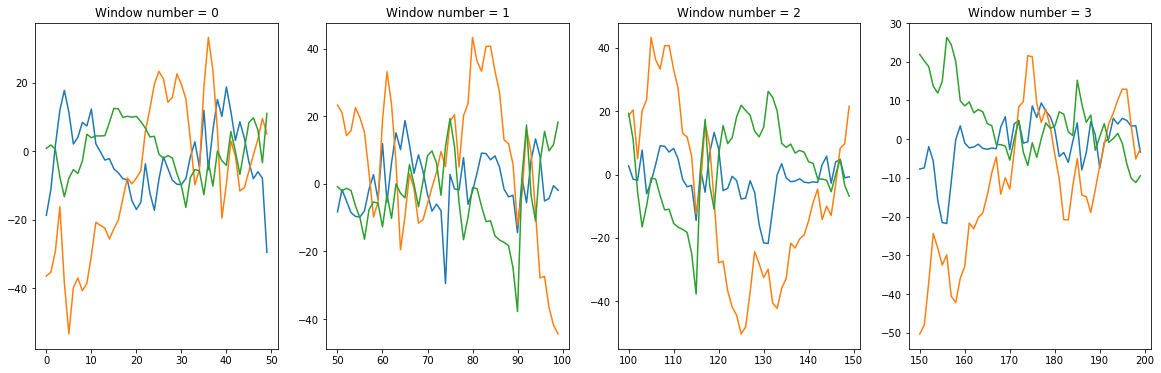

In [15]:
fig, ax = plt.subplots(1, 4, figsize=(20, 6))

for i in range(4):
    ax[i].plot(first_four_windows[i]['gyro_x'])
    ax[i].plot(first_four_windows[i]['gyro_y'])
    ax[i].plot(first_four_windows[i]['gyro_z'])
    ax[i].set_title(f"Window number = {first_four_windows[i].window_id.values[0]}")


It's also interesting to observe the dimensionality of one window. Considering just the accelerometer and gyroscope signals, with all three axes, the resulting dimensionality of one window is:

In [16]:
columns_of_interest = ['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z']

In [17]:
np.array(first_four_windows[0][columns_of_interest]).shape

(50, 6)

## From sliding windows to datapoints

Each sliding window needs to be further processed in order to represent an appropriate input datapoint. The preprocessing methods might differ depending on which type of model you choose to use. 

You can also do further processing on the signal types and axes, for example smooth the signal, apply axis fusion, eliminate noise etc. 

Here we will discuss simple examples without any preprocessing. 

### Feature extraction with tsfresh

One quick and simple method to consider for HAR is a [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). It can take a multi-dimensional datapoint as input and can output a classification. 

We can transform each window of data into one single, multidimensional datapoint by applying simple computations using the [tsfresh](https://tsfresh.readthedocs.io/en/latest/text/feature_extraction_settings.html) package.

In [18]:
feature_list = []

for col in columns_of_interest:
    new_features = tsfresh.extract_features(timeseries_container=final_sliding_windows, column_id='window_id',
                        column_value=col, default_fc_parameters=tsfresh.feature_extraction.MinimalFCParameters())
    new_features.dropna()
    feature_list.append(new_features)
    
feature_list = pd.concat(feature_list, axis=1)

feature_list

Feature Extraction: 100%|██████████| 10/10 [00:01<00:00,  5.10it/s]


,accel_x__sum_values,accel_x__median,accel_x__mean,accel_x__length,accel_x__standard_deviation,accel_x__variance,accel_x__root_mean_square,accel_x__maximum,accel_x__absolute_maximum,accel_x__minimum,...,gyro_z__sum_values,gyro_z__median,gyro_z__mean,gyro_z__length,gyro_z__standard_deviation,gyro_z__variance,gyro_z__root_mean_square,gyro_z__maximum,gyro_z__absolute_maximum,gyro_z__minimum
0,-8.088135,-0.197021,-0.161763,50.0,0.159934,0.025579,0.227478,0.177979,0.492920,-0.492920,...,19.218750,0.289062,0.384375,50.0,7.302757,53.330264,7.312866,12.484375,16.406250,-16.406250
1,-5.474609,-0.092773,-0.109492,50.0,0.159415,0.025413,0.193395,0.177979,0.492920,-0.492920,...,-155.796875,-3.242188,-3.115937,50.0,11.348848,128.796349,11.768832,19.343750,37.765625,-37.765625
2,-3.650146,-0.044678,-0.073003,50.0,0.126026,0.015883,0.145643,0.149170,0.411377,-0.411377,...,117.828125,3.757812,2.356562,50.0,13.735620,188.667253,13.936307,26.265625,37.765625,-37.765625
3,-2.698486,-0.045166,-0.053970,50.0,0.136837,0.018724,0.147095,0.254883,0.395020,-0.395020,...,234.281250,3.750000,4.685625,50.0,8.791727,77.294469,9.962407,26.265625,26.265625,-11.218750
4,-3.884766,-0.092407,-0.077695,50.0,0.136364,0.018595,0.156945,0.254883,0.449219,-0.449219,...,-13.343750,0.242188,-0.266875,50.0,5.432773,29.515028,5.439324,15.218750,15.218750,-11.671875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7791,-46.149414,-1.027832,-0.922988,50.0,0.621975,0.386853,1.112996,0.181641,2.000000,-2.000000,...,-478.343750,-5.843750,-9.566875,50.0,51.601272,2662.691250,52.480628,92.031250,136.906250,-136.906250
7792,-46.776367,-1.063477,-0.935527,50.0,0.620041,0.384451,1.122347,0.181641,2.000000,-2.000000,...,-388.250000,-8.046875,-7.765000,50.0,56.294343,3169.053017,56.827355,135.250000,136.906250,-136.906250
7793,-49.399414,-1.071777,-0.987988,50.0,0.574514,0.330066,1.142885,0.142578,2.000000,-2.000000,...,-332.843750,-10.421875,-6.656875,50.0,54.921810,3016.405254,55.323767,135.250000,135.250000,-111.781250
7794,-47.966797,-1.057617,-0.959336,50.0,0.581148,0.337732,1.121632,0.324219,2.000000,-2.000000,...,-485.812500,-0.140625,-9.716250,50.0,48.452263,2347.621791,49.416873,128.093750,128.093750,-109.437500


Now the index represents the window ID, and each row in the DataFrame represents a multi-dimensional datapoint which we can use as input to the RFC.

You can use the window ID to refer back to the initial dataframe and get the class (activity type) for each window.

We will now process both recordings so that we have two classes for our classifier. For your own work you should only aim to perform classification on data from one sensor. 

In [19]:
window_size = 50 # 50 datapoints for the window size, which, at 25Hz, means 2 seconds
step_size = 25 # this is 50% overlap

window_number = 0 # start a counter at 0 to keep track of the window number

all_overlapping_windows = []

for rid, group in base_df[base_df["sensor_type"].str.contains("Thingy")].groupby("sensor_type"):
    print(f"Processing rid = {rid}")
    
    large_enough_windows = [window for window in group.rolling(window=window_size, min_periods=window_size) if len(window) == window_size]
    
    overlapping_windows = large_enough_windows[::step_size] 
    
    # then we will append a window ID to each window
    for window in overlapping_windows:
        window.loc[:, 'window_id'] = window_number
        window_number += 1
    
    
    all_overlapping_windows.append(pd.concat(overlapping_windows).reset_index(drop=True))

Processing rid = Thingy


In [20]:
final_sliding_windows = pd.concat(all_overlapping_windows).reset_index(drop=True)

In [21]:
# now extract all features
feature_list = []

for col in columns_of_interest:
    new_features = tsfresh.extract_features(timeseries_container=final_sliding_windows, column_id='window_id',
                        column_value=col, default_fc_parameters=tsfresh.feature_extraction.MinimalFCParameters())
    new_features.dropna()
    feature_list.append(new_features)
feature_list = pd.concat(feature_list, axis=1)

feature_list

Feature Extraction: 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]


,accel_x__sum_values,accel_x__median,accel_x__mean,accel_x__length,accel_x__standard_deviation,accel_x__variance,accel_x__root_mean_square,accel_x__maximum,accel_x__absolute_maximum,accel_x__minimum,...,gyro_z__sum_values,gyro_z__median,gyro_z__mean,gyro_z__length,gyro_z__standard_deviation,gyro_z__variance,gyro_z__root_mean_square,gyro_z__maximum,gyro_z__absolute_maximum,gyro_z__minimum
0,-34.715576,-0.694336,-0.694312,50.0,0.003353,0.000011,0.694320,-0.687012,0.700684,-0.700684,...,-16.468750,-0.343750,-0.329375,50.0,0.130535,0.017039,0.354298,-0.078125,0.640625,-0.640625
1,-34.652100,-0.693481,-0.693042,50.0,0.003297,0.000011,0.693050,-0.685547,0.702881,-0.702881,...,-14.078125,-0.289062,-0.281562,50.0,0.116655,0.013608,0.304772,0.015625,0.562500,-0.562500
2,-34.660889,-0.693359,-0.693218,50.0,0.003351,0.000011,0.693226,-0.685547,0.702881,-0.702881,...,-15.484375,-0.335938,-0.309688,50.0,0.133890,0.017927,0.337391,0.015625,0.750000,-0.750000
3,-34.688232,-0.693604,-0.693765,50.0,0.003380,0.000011,0.693773,-0.685547,0.700195,-0.700195,...,-18.875000,-0.375000,-0.377500,50.0,0.123876,0.015345,0.397305,-0.046875,0.750000,-0.750000
4,-34.723877,-0.694336,-0.694478,50.0,0.003908,0.000015,0.694489,-0.685547,0.704102,-0.704102,...,-19.468750,-0.375000,-0.389375,50.0,0.145467,0.021161,0.415660,0.000000,0.671875,-0.671875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51557,-47.034180,-1.042969,-0.940684,50.0,0.631445,0.398723,1.132964,0.181641,2.000000,-2.000000,...,-471.656250,-2.515625,-9.433125,50.0,52.729902,2780.442579,53.567027,92.031250,136.906250,-136.906250
51558,-48.360352,-1.071777,-0.967207,50.0,0.634802,0.402974,1.156920,0.181641,2.000000,-2.000000,...,-380.750000,-5.781250,-7.615000,50.0,57.089227,3259.179822,57.594861,135.250000,136.906250,-136.906250
51559,-48.715820,-1.060547,-0.974316,50.0,0.561460,0.315238,1.124513,0.142578,2.000000,-2.000000,...,-367.968750,-8.500000,-7.359375,50.0,53.373962,2848.779854,53.878941,135.250000,135.250000,-109.437500
51560,-46.743164,-1.057129,-0.934863,50.0,0.552245,0.304974,1.085792,0.324219,2.000000,-2.000000,...,-486.781250,-2.546875,-9.735625,50.0,49.072651,2408.125086,50.029066,128.093750,128.093750,-105.000000


Now we also extract the classes from each window

In [22]:
final_sliding_windows.groupby("window_id")[['activity_type']].agg(np.min)

,activity_type
window_id,
0,Lying down left
1,Lying down left
2,Lying down left
3,Lying down left
4,Lying down left
...,...
51557,Walking at normal speed
51558,Walking at normal speed
51559,Walking at normal speed


We need to assign a number to each categorical class for the Random Forest Classifer. It is mainly up to you how you categorise your classes. In this example, we will use the labels:
- 0 for Desk work
- 1 for Walking at normal speed

Bear in mind that your classification task will be multi-class, not binary. 

In [23]:
class_labels = {
    'Desk work': 0,
    'Walking at normal speed': 1,
    'Climbing stairs': 2,
    'Descending stairs': 3,
    'Lying down left': 4,
    'Lying down right': 5,
    'Lying down on back': 6,
    'Lying down on stomach': 7,
    'Movement': 8,
    'Running': 9,
    'Sitting': 10,
    'Sitting bent backward': 11,
    'Sitting bent forward': 12,
    'Standing': 13  
}

In [24]:
window_id_class_labels = final_sliding_windows.groupby("window_id")[['activity_type']].agg(np.min).replace(class_labels)
window_id_class_labels

,activity_type
window_id,
0,4
1,4
2,4
3,4
4,4
...,...
51557,1
51558,1
51559,1


In [25]:
new_activity_types = [10 if l in [0, 11, 12, 6] else l for l in list(window_id_class_labels["activity_type"])]
window_id_class_labels["activity_type"] = new_activity_types
window_id_class_labels

,activity_type
window_id,
0,4
1,4
2,4
3,4
4,4
...,...
51557,1
51558,1
51559,1


In [26]:
base_df["recording_id"].unique()

array([nan, 'Respeck_s1541031_Climbing stairs_06-10-2021_11-25-43',
       'Respeck_s1541031_Descending stairs_06-10-2021_11-25-05', ...,
       'Thingy_s2342658_Sitting_04-10-2022_14-17-29',
       'Thingy_s2342658_Standing_04-10-2022_14-22-37',
       'Thingy_s2342658_Walking at normal speed_04-10-2022_14-53-43'],
      dtype=object)

### Quickly training a Random Forest Classifier

We now have all the tools to start training a Random Forest Classifier. We will use the feature_list as inputs and window_id_class_labels as outputs. We will do a basic 80/20 split of the data for demonstration purposes. 

In your project you should split the data into training and tests sets by excluding entire subjects from the training set. This is discussed later on in this notebook.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(feature_list, window_id_class_labels,
                                                    test_size=0.2, train_size=0.8)

In [28]:
print(f"Training set: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Test set: X_test = {X_test.shape}, y_test = {y_test.shape}")

Training set: X_train = (41249, 60), y_train = (41249, 1)
Test set: X_test = (10313, 60), y_test = (10313, 1)


Now we can build and train the random forest classifier

In [29]:
rfc = RandomForestClassifier(n_estimators=10)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

<ipython-input-29-014410a81363>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


In [30]:
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           1       0.81      0.90      0.85       691
           2       0.83      0.84      0.84       816
           3       0.85      0.87      0.86       758
           4       0.98      0.97      0.97       730
           5       0.99      0.96      0.98       765
           7       0.99      0.98      0.99       742
           8       0.82      0.74      0.78       722
           9       0.94      0.97      0.95       704
          10       0.99      0.99      0.99      3662
          13       0.99      0.95      0.97       723

    accuracy                           0.94     10313
   macro avg       0.92      0.92      0.92     10313
weighted avg       0.94      0.94      0.94     10313



This is a very easy problem so the classifier learns very quickly. Your actual problem of classifying multiple activities will be much harder.

## Leave-one-subject-out cross-validation

One of the other reason our previous classifier functions so well is that each person performs activities in a very consistent manner. If a subject's data is both in the training set and the test set, it provides the model with an unfair advantage. Moreover, the results that your model will output will be falsely high. When you test your model on a completely new, unseen subject, your accuracy will drop considerably. 

This is why when training a HAR model you will want to do a special kind of cross-validation: Leave-One-Subject-Out (LOSOXV), where we leave one (or more) subject(s) in the testing set at each iteration.

![losoxv](../Images/LOOCV.png "losoxv")

This ensures that the results we get from our classifier are consistent to what we would get in real life, if we were to test the model on a new user.

## Training a simple CNN

There are some different preprocessing techniques you can apply when the resulting "datapoint" is an input to a convolutional neural network. 

You can use two types of convolutional layers:
* 1D Conv Layers - which will work on 1D data, for example a single axis from one single sensor (accel, gyro or mag)
* 2D Conv Layers - suitable if the input data is in the form of an image, for example

We will be demonstrating how to build a simple 1D CNN using 6 channels: the 3 axes of the accelerometer and the 3 axes of the gyroscope.

### Setting up the model

In [31]:
filters = 128
kernel_size = 3
n_features = 6
activation='relu'
n_classes = 10

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 48, 128)           2432      
                                                                 
 batch_normalization (BatchN  (None, 48, 128)          512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 48, 128)           0         
                                                                 
 activation (Activation)     (None, 48, 128)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 46, 128)           49280     
                                                                 
 batch_normalization_1 (Batc  (None, 46, 128)          512       
 hNormalization)                                        

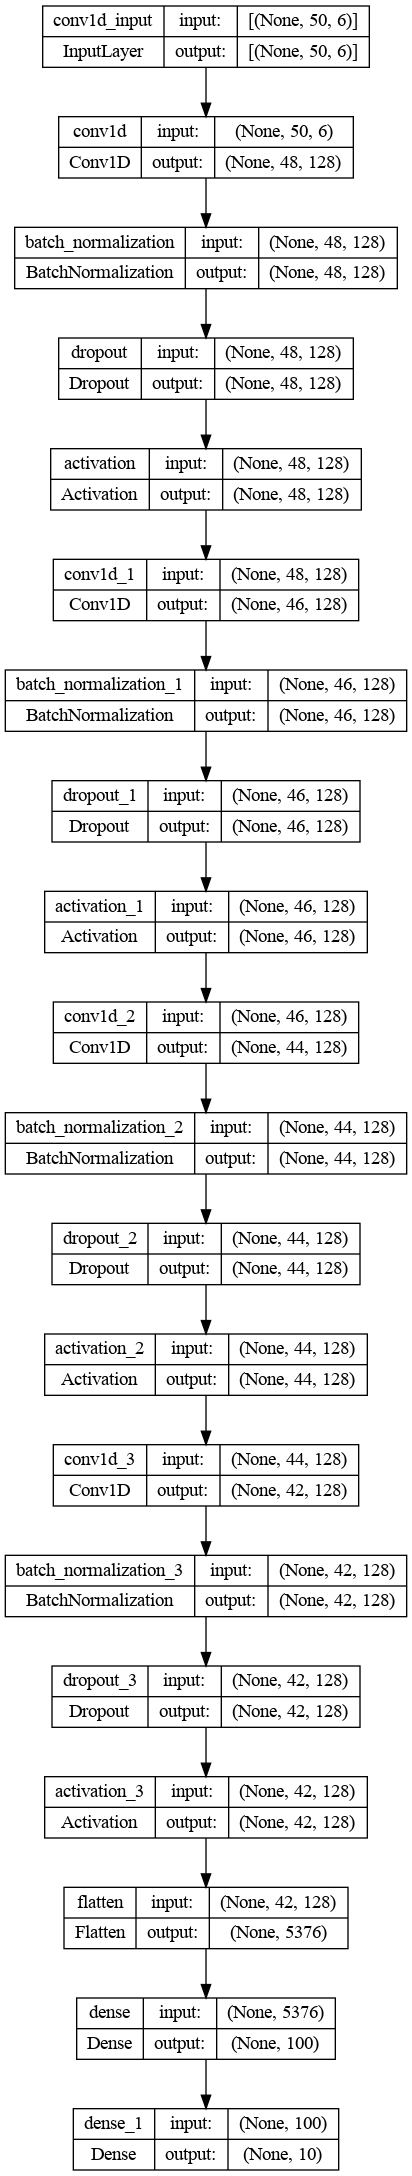

In [32]:
from keras.utils.vis_utils import plot_model
model = Sequential()

model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='linear', 
                 input_shape=(window_size, n_features)))
model.add(BatchNormalization())
model.add(Dropout(0.05))
model.add(Activation(activation))

model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='linear'))
model.add(BatchNormalization())
model.add(Dropout(0.05))
model.add(Activation(activation))

model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='linear'))
model.add(BatchNormalization())
model.add(Dropout(0.05))
model.add(Activation(activation))

model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='linear'))
model.add(BatchNormalization())
model.add(Dropout(0.05))
model.add(Activation(activation))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.summary()
plot_model(model, show_shapes=True, show_layer_names = True)

### Re-generating the data in the appropriate format

We need to do a bit more work with our data to bring it into a format fit for training a CNN. 

A CNN will take multi-dimensional arrays as input. We have already specified that the input shape is (window_size, n_features), i.e. (50, 6). 

Remember that we generated sliding windows before. Now we just need to take the raw values from each window and create a training set. 

In [33]:
columns_of_interest

['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z']

In [34]:
X = []
y = []

for window_id, group in final_sliding_windows.groupby('window_id'):
    print(f"window_id = {window_id}")
    
    shape = group[columns_of_interest].values.shape
    print(f"shape = {shape}")
    
    X.append(group[columns_of_interest].values)
    y.append(class_labels[group["activity_type"].values[0]])

window_id = 0
shape = (50, 6)
window_id = 1
shape = (50, 6)
window_id = 2
shape = (50, 6)
window_id = 3
shape = (50, 6)
window_id = 4
shape = (50, 6)
window_id = 5
shape = (50, 6)
window_id = 6
shape = (50, 6)
window_id = 7
shape = (50, 6)
window_id = 8
shape = (50, 6)
window_id = 9
shape = (50, 6)
window_id = 10
shape = (50, 6)
window_id = 11
shape = (50, 6)
window_id = 12
shape = (50, 6)
window_id = 13
shape = (50, 6)
window_id = 14
shape = (50, 6)
window_id = 15
shape = (50, 6)
window_id = 16
shape = (50, 6)
window_id = 17
shape = (50, 6)
window_id = 18
shape = (50, 6)
window_id = 19
shape = (50, 6)
window_id = 20
shape = (50, 6)
window_id = 21
shape = (50, 6)
window_id = 22
shape = (50, 6)
window_id = 23
shape = (50, 6)
window_id = 24
shape = (50, 6)
window_id = 25
shape = (50, 6)
window_id = 26
shape = (50, 6)
window_id = 27
shape = (50, 6)
window_id = 28
shape = (50, 6)
window_id = 29
shape = (50, 6)
window_id = 30
shape = (50, 6)
window_id = 31
shape = (50, 6)
window_id = 32
sha

window_id = 357
shape = (50, 6)
window_id = 358
shape = (50, 6)
window_id = 359
shape = (50, 6)
window_id = 360
shape = (50, 6)
window_id = 361
shape = (50, 6)
window_id = 362
shape = (50, 6)
window_id = 363
shape = (50, 6)
window_id = 364
shape = (50, 6)
window_id = 365
shape = (50, 6)
window_id = 366
shape = (50, 6)
window_id = 367
shape = (50, 6)
window_id = 368
shape = (50, 6)
window_id = 369
shape = (50, 6)
window_id = 370
shape = (50, 6)
window_id = 371
shape = (50, 6)
window_id = 372
shape = (50, 6)
window_id = 373
shape = (50, 6)
window_id = 374
shape = (50, 6)
window_id = 375
shape = (50, 6)
window_id = 376
shape = (50, 6)
window_id = 377
shape = (50, 6)
window_id = 378
shape = (50, 6)
window_id = 379
shape = (50, 6)
window_id = 380
shape = (50, 6)
window_id = 381
shape = (50, 6)
window_id = 382
shape = (50, 6)
window_id = 383
shape = (50, 6)
window_id = 384
shape = (50, 6)
window_id = 385
shape = (50, 6)
window_id = 386
shape = (50, 6)
window_id = 387
shape = (50, 6)
window_i

window_id = 650
shape = (50, 6)
window_id = 651
shape = (50, 6)
window_id = 652
shape = (50, 6)
window_id = 653
shape = (50, 6)
window_id = 654
shape = (50, 6)
window_id = 655
shape = (50, 6)
window_id = 656
shape = (50, 6)
window_id = 657
shape = (50, 6)
window_id = 658
shape = (50, 6)
window_id = 659
shape = (50, 6)
window_id = 660
shape = (50, 6)
window_id = 661
shape = (50, 6)
window_id = 662
shape = (50, 6)
window_id = 663
shape = (50, 6)
window_id = 664
shape = (50, 6)
window_id = 665
shape = (50, 6)
window_id = 666
shape = (50, 6)
window_id = 667
shape = (50, 6)
window_id = 668
shape = (50, 6)
window_id = 669
shape = (50, 6)
window_id = 670
shape = (50, 6)
window_id = 671
shape = (50, 6)
window_id = 672
shape = (50, 6)
window_id = 673
shape = (50, 6)
window_id = 674
shape = (50, 6)
window_id = 675
shape = (50, 6)
window_id = 676
shape = (50, 6)
window_id = 677
shape = (50, 6)
window_id = 678
shape = (50, 6)
window_id = 679
shape = (50, 6)
window_id = 680
shape = (50, 6)
window_i

window_id = 953
shape = (50, 6)
window_id = 954
shape = (50, 6)
window_id = 955
shape = (50, 6)
window_id = 956
shape = (50, 6)
window_id = 957
shape = (50, 6)
window_id = 958
shape = (50, 6)
window_id = 959
shape = (50, 6)
window_id = 960
shape = (50, 6)
window_id = 961
shape = (50, 6)
window_id = 962
shape = (50, 6)
window_id = 963
shape = (50, 6)
window_id = 964
shape = (50, 6)
window_id = 965
shape = (50, 6)
window_id = 966
shape = (50, 6)
window_id = 967
shape = (50, 6)
window_id = 968
shape = (50, 6)
window_id = 969
shape = (50, 6)
window_id = 970
shape = (50, 6)
window_id = 971
shape = (50, 6)
window_id = 972
shape = (50, 6)
window_id = 973
shape = (50, 6)
window_id = 974
shape = (50, 6)
window_id = 975
shape = (50, 6)
window_id = 976
shape = (50, 6)
window_id = 977
shape = (50, 6)
window_id = 978
shape = (50, 6)
window_id = 979
shape = (50, 6)
window_id = 980
shape = (50, 6)
window_id = 981
shape = (50, 6)
window_id = 982
shape = (50, 6)
window_id = 983
shape = (50, 6)
window_i

window_id = 1326
shape = (50, 6)
window_id = 1327
shape = (50, 6)
window_id = 1328
shape = (50, 6)
window_id = 1329
shape = (50, 6)
window_id = 1330
shape = (50, 6)
window_id = 1331
shape = (50, 6)
window_id = 1332
shape = (50, 6)
window_id = 1333
shape = (50, 6)
window_id = 1334
shape = (50, 6)
window_id = 1335
shape = (50, 6)
window_id = 1336
shape = (50, 6)
window_id = 1337
shape = (50, 6)
window_id = 1338
shape = (50, 6)
window_id = 1339
shape = (50, 6)
window_id = 1340
shape = (50, 6)
window_id = 1341
shape = (50, 6)
window_id = 1342
shape = (50, 6)
window_id = 1343
shape = (50, 6)
window_id = 1344
shape = (50, 6)
window_id = 1345
shape = (50, 6)
window_id = 1346
shape = (50, 6)
window_id = 1347
shape = (50, 6)
window_id = 1348
shape = (50, 6)
window_id = 1349
shape = (50, 6)
window_id = 1350
shape = (50, 6)
window_id = 1351
shape = (50, 6)
window_id = 1352
shape = (50, 6)
window_id = 1353
shape = (50, 6)
window_id = 1354
shape = (50, 6)
window_id = 1355
shape = (50, 6)
window_id 

window_id = 1662
shape = (50, 6)
window_id = 1663
shape = (50, 6)
window_id = 1664
shape = (50, 6)
window_id = 1665
shape = (50, 6)
window_id = 1666
shape = (50, 6)
window_id = 1667
shape = (50, 6)
window_id = 1668
shape = (50, 6)
window_id = 1669
shape = (50, 6)
window_id = 1670
shape = (50, 6)
window_id = 1671
shape = (50, 6)
window_id = 1672
shape = (50, 6)
window_id = 1673
shape = (50, 6)
window_id = 1674
shape = (50, 6)
window_id = 1675
shape = (50, 6)
window_id = 1676
shape = (50, 6)
window_id = 1677
shape = (50, 6)
window_id = 1678
shape = (50, 6)
window_id = 1679
shape = (50, 6)
window_id = 1680
shape = (50, 6)
window_id = 1681
shape = (50, 6)
window_id = 1682
shape = (50, 6)
window_id = 1683
shape = (50, 6)
window_id = 1684
shape = (50, 6)
window_id = 1685
shape = (50, 6)
window_id = 1686
shape = (50, 6)
window_id = 1687
shape = (50, 6)
window_id = 1688
shape = (50, 6)
window_id = 1689
shape = (50, 6)
window_id = 1690
shape = (50, 6)
window_id = 1691
shape = (50, 6)
window_id 

window_id = 2025
shape = (50, 6)
window_id = 2026
shape = (50, 6)
window_id = 2027
shape = (50, 6)
window_id = 2028
shape = (50, 6)
window_id = 2029
shape = (50, 6)
window_id = 2030
shape = (50, 6)
window_id = 2031
shape = (50, 6)
window_id = 2032
shape = (50, 6)
window_id = 2033
shape = (50, 6)
window_id = 2034
shape = (50, 6)
window_id = 2035
shape = (50, 6)
window_id = 2036
shape = (50, 6)
window_id = 2037
shape = (50, 6)
window_id = 2038
shape = (50, 6)
window_id = 2039
shape = (50, 6)
window_id = 2040
shape = (50, 6)
window_id = 2041
shape = (50, 6)
window_id = 2042
shape = (50, 6)
window_id = 2043
shape = (50, 6)
window_id = 2044
shape = (50, 6)
window_id = 2045
shape = (50, 6)
window_id = 2046
shape = (50, 6)
window_id = 2047
shape = (50, 6)
window_id = 2048
shape = (50, 6)
window_id = 2049
shape = (50, 6)
window_id = 2050
shape = (50, 6)
window_id = 2051
shape = (50, 6)
window_id = 2052
shape = (50, 6)
window_id = 2053
shape = (50, 6)
window_id = 2054
shape = (50, 6)
window_id 

window_id = 2379
shape = (50, 6)
window_id = 2380
shape = (50, 6)
window_id = 2381
shape = (50, 6)
window_id = 2382
shape = (50, 6)
window_id = 2383
shape = (50, 6)
window_id = 2384
shape = (50, 6)
window_id = 2385
shape = (50, 6)
window_id = 2386
shape = (50, 6)
window_id = 2387
shape = (50, 6)
window_id = 2388
shape = (50, 6)
window_id = 2389
shape = (50, 6)
window_id = 2390
shape = (50, 6)
window_id = 2391
shape = (50, 6)
window_id = 2392
shape = (50, 6)
window_id = 2393
shape = (50, 6)
window_id = 2394
shape = (50, 6)
window_id = 2395
shape = (50, 6)
window_id = 2396
shape = (50, 6)
window_id = 2397
shape = (50, 6)
window_id = 2398
shape = (50, 6)
window_id = 2399
shape = (50, 6)
window_id = 2400
shape = (50, 6)
window_id = 2401
shape = (50, 6)
window_id = 2402
shape = (50, 6)
window_id = 2403
shape = (50, 6)
window_id = 2404
shape = (50, 6)
window_id = 2405
shape = (50, 6)
window_id = 2406
shape = (50, 6)
window_id = 2407
shape = (50, 6)
window_id = 2408
shape = (50, 6)
window_id 

shape = (50, 6)
window_id = 2700
shape = (50, 6)
window_id = 2701
shape = (50, 6)
window_id = 2702
shape = (50, 6)
window_id = 2703
shape = (50, 6)
window_id = 2704
shape = (50, 6)
window_id = 2705
shape = (50, 6)
window_id = 2706
shape = (50, 6)
window_id = 2707
shape = (50, 6)
window_id = 2708
shape = (50, 6)
window_id = 2709
shape = (50, 6)
window_id = 2710
shape = (50, 6)
window_id = 2711
shape = (50, 6)
window_id = 2712
shape = (50, 6)
window_id = 2713
shape = (50, 6)
window_id = 2714
shape = (50, 6)
window_id = 2715
shape = (50, 6)
window_id = 2716
shape = (50, 6)
window_id = 2717
shape = (50, 6)
window_id = 2718
shape = (50, 6)
window_id = 2719
shape = (50, 6)
window_id = 2720
shape = (50, 6)
window_id = 2721
shape = (50, 6)
window_id = 2722
shape = (50, 6)
window_id = 2723
shape = (50, 6)
window_id = 2724
shape = (50, 6)
window_id = 2725
shape = (50, 6)
window_id = 2726
shape = (50, 6)
window_id = 2727
shape = (50, 6)
window_id = 2728
shape = (50, 6)
window_id = 2729
shape = (5

shape = (50, 6)
window_id = 3070
shape = (50, 6)
window_id = 3071
shape = (50, 6)
window_id = 3072
shape = (50, 6)
window_id = 3073
shape = (50, 6)
window_id = 3074
shape = (50, 6)
window_id = 3075
shape = (50, 6)
window_id = 3076
shape = (50, 6)
window_id = 3077
shape = (50, 6)
window_id = 3078
shape = (50, 6)
window_id = 3079
shape = (50, 6)
window_id = 3080
shape = (50, 6)
window_id = 3081
shape = (50, 6)
window_id = 3082
shape = (50, 6)
window_id = 3083
shape = (50, 6)
window_id = 3084
shape = (50, 6)
window_id = 3085
shape = (50, 6)
window_id = 3086
shape = (50, 6)
window_id = 3087
shape = (50, 6)
window_id = 3088
shape = (50, 6)
window_id = 3089
shape = (50, 6)
window_id = 3090
shape = (50, 6)
window_id = 3091
shape = (50, 6)
window_id = 3092
shape = (50, 6)
window_id = 3093
shape = (50, 6)
window_id = 3094
shape = (50, 6)
window_id = 3095
shape = (50, 6)
window_id = 3096
shape = (50, 6)
window_id = 3097
shape = (50, 6)
window_id = 3098
shape = (50, 6)
window_id = 3099
shape = (5

shape = (50, 6)
window_id = 3368
shape = (50, 6)
window_id = 3369
shape = (50, 6)
window_id = 3370
shape = (50, 6)
window_id = 3371
shape = (50, 6)
window_id = 3372
shape = (50, 6)
window_id = 3373
shape = (50, 6)
window_id = 3374
shape = (50, 6)
window_id = 3375
shape = (50, 6)
window_id = 3376
shape = (50, 6)
window_id = 3377
shape = (50, 6)
window_id = 3378
shape = (50, 6)
window_id = 3379
shape = (50, 6)
window_id = 3380
shape = (50, 6)
window_id = 3381
shape = (50, 6)
window_id = 3382
shape = (50, 6)
window_id = 3383
shape = (50, 6)
window_id = 3384
shape = (50, 6)
window_id = 3385
shape = (50, 6)
window_id = 3386
shape = (50, 6)
window_id = 3387
shape = (50, 6)
window_id = 3388
shape = (50, 6)
window_id = 3389
shape = (50, 6)
window_id = 3390
shape = (50, 6)
window_id = 3391
shape = (50, 6)
window_id = 3392
shape = (50, 6)
window_id = 3393
shape = (50, 6)
window_id = 3394
shape = (50, 6)
window_id = 3395
shape = (50, 6)
window_id = 3396
shape = (50, 6)
window_id = 3397
shape = (5

window_id = 3663
shape = (50, 6)
window_id = 3664
shape = (50, 6)
window_id = 3665
shape = (50, 6)
window_id = 3666
shape = (50, 6)
window_id = 3667
shape = (50, 6)
window_id = 3668
shape = (50, 6)
window_id = 3669
shape = (50, 6)
window_id = 3670
shape = (50, 6)
window_id = 3671
shape = (50, 6)
window_id = 3672
shape = (50, 6)
window_id = 3673
shape = (50, 6)
window_id = 3674
shape = (50, 6)
window_id = 3675
shape = (50, 6)
window_id = 3676
shape = (50, 6)
window_id = 3677
shape = (50, 6)
window_id = 3678
shape = (50, 6)
window_id = 3679
shape = (50, 6)
window_id = 3680
shape = (50, 6)
window_id = 3681
shape = (50, 6)
window_id = 3682
shape = (50, 6)
window_id = 3683
shape = (50, 6)
window_id = 3684
shape = (50, 6)
window_id = 3685
shape = (50, 6)
window_id = 3686
shape = (50, 6)
window_id = 3687
shape = (50, 6)
window_id = 3688
shape = (50, 6)
window_id = 3689
shape = (50, 6)
window_id = 3690
shape = (50, 6)
window_id = 3691
shape = (50, 6)
window_id = 3692
shape = (50, 6)
window_id 

window_id = 4033
shape = (50, 6)
window_id = 4034
shape = (50, 6)
window_id = 4035
shape = (50, 6)
window_id = 4036
shape = (50, 6)
window_id = 4037
shape = (50, 6)
window_id = 4038
shape = (50, 6)
window_id = 4039
shape = (50, 6)
window_id = 4040
shape = (50, 6)
window_id = 4041
shape = (50, 6)
window_id = 4042
shape = (50, 6)
window_id = 4043
shape = (50, 6)
window_id = 4044
shape = (50, 6)
window_id = 4045
shape = (50, 6)
window_id = 4046
shape = (50, 6)
window_id = 4047
shape = (50, 6)
window_id = 4048
shape = (50, 6)
window_id = 4049
shape = (50, 6)
window_id = 4050
shape = (50, 6)
window_id = 4051
shape = (50, 6)
window_id = 4052
shape = (50, 6)
window_id = 4053
shape = (50, 6)
window_id = 4054
shape = (50, 6)
window_id = 4055
shape = (50, 6)
window_id = 4056
shape = (50, 6)
window_id = 4057
shape = (50, 6)
window_id = 4058
shape = (50, 6)
window_id = 4059
shape = (50, 6)
window_id = 4060
shape = (50, 6)
window_id = 4061
shape = (50, 6)
window_id = 4062
shape = (50, 6)
window_id 

shape = (50, 6)
window_id = 4366
shape = (50, 6)
window_id = 4367
shape = (50, 6)
window_id = 4368
shape = (50, 6)
window_id = 4369
shape = (50, 6)
window_id = 4370
shape = (50, 6)
window_id = 4371
shape = (50, 6)
window_id = 4372
shape = (50, 6)
window_id = 4373
shape = (50, 6)
window_id = 4374
shape = (50, 6)
window_id = 4375
shape = (50, 6)
window_id = 4376
shape = (50, 6)
window_id = 4377
shape = (50, 6)
window_id = 4378
shape = (50, 6)
window_id = 4379
shape = (50, 6)
window_id = 4380
shape = (50, 6)
window_id = 4381
shape = (50, 6)
window_id = 4382
shape = (50, 6)
window_id = 4383
shape = (50, 6)
window_id = 4384
shape = (50, 6)
window_id = 4385
shape = (50, 6)
window_id = 4386
shape = (50, 6)
window_id = 4387
shape = (50, 6)
window_id = 4388
shape = (50, 6)
window_id = 4389
shape = (50, 6)
window_id = 4390
shape = (50, 6)
window_id = 4391
shape = (50, 6)
window_id = 4392
shape = (50, 6)
window_id = 4393
shape = (50, 6)
window_id = 4394
shape = (50, 6)
window_id = 4395
shape = (5

shape = (50, 6)
window_id = 4679
shape = (50, 6)
window_id = 4680
shape = (50, 6)
window_id = 4681
shape = (50, 6)
window_id = 4682
shape = (50, 6)
window_id = 4683
shape = (50, 6)
window_id = 4684
shape = (50, 6)
window_id = 4685
shape = (50, 6)
window_id = 4686
shape = (50, 6)
window_id = 4687
shape = (50, 6)
window_id = 4688
shape = (50, 6)
window_id = 4689
shape = (50, 6)
window_id = 4690
shape = (50, 6)
window_id = 4691
shape = (50, 6)
window_id = 4692
shape = (50, 6)
window_id = 4693
shape = (50, 6)
window_id = 4694
shape = (50, 6)
window_id = 4695
shape = (50, 6)
window_id = 4696
shape = (50, 6)
window_id = 4697
shape = (50, 6)
window_id = 4698
shape = (50, 6)
window_id = 4699
shape = (50, 6)
window_id = 4700
shape = (50, 6)
window_id = 4701
shape = (50, 6)
window_id = 4702
shape = (50, 6)
window_id = 4703
shape = (50, 6)
window_id = 4704
shape = (50, 6)
window_id = 4705
shape = (50, 6)
window_id = 4706
shape = (50, 6)
window_id = 4707
shape = (50, 6)
window_id = 4708
shape = (5

shape = (50, 6)
window_id = 5018
shape = (50, 6)
window_id = 5019
shape = (50, 6)
window_id = 5020
shape = (50, 6)
window_id = 5021
shape = (50, 6)
window_id = 5022
shape = (50, 6)
window_id = 5023
shape = (50, 6)
window_id = 5024
shape = (50, 6)
window_id = 5025
shape = (50, 6)
window_id = 5026
shape = (50, 6)
window_id = 5027
shape = (50, 6)
window_id = 5028
shape = (50, 6)
window_id = 5029
shape = (50, 6)
window_id = 5030
shape = (50, 6)
window_id = 5031
shape = (50, 6)
window_id = 5032
shape = (50, 6)
window_id = 5033
shape = (50, 6)
window_id = 5034
shape = (50, 6)
window_id = 5035
shape = (50, 6)
window_id = 5036
shape = (50, 6)
window_id = 5037
shape = (50, 6)
window_id = 5038
shape = (50, 6)
window_id = 5039
shape = (50, 6)
window_id = 5040
shape = (50, 6)
window_id = 5041
shape = (50, 6)
window_id = 5042
shape = (50, 6)
window_id = 5043
shape = (50, 6)
window_id = 5044
shape = (50, 6)
window_id = 5045
shape = (50, 6)
window_id = 5046
shape = (50, 6)
window_id = 5047
shape = (5

shape = (50, 6)
window_id = 5386
shape = (50, 6)
window_id = 5387
shape = (50, 6)
window_id = 5388
shape = (50, 6)
window_id = 5389
shape = (50, 6)
window_id = 5390
shape = (50, 6)
window_id = 5391
shape = (50, 6)
window_id = 5392
shape = (50, 6)
window_id = 5393
shape = (50, 6)
window_id = 5394
shape = (50, 6)
window_id = 5395
shape = (50, 6)
window_id = 5396
shape = (50, 6)
window_id = 5397
shape = (50, 6)
window_id = 5398
shape = (50, 6)
window_id = 5399
shape = (50, 6)
window_id = 5400
shape = (50, 6)
window_id = 5401
shape = (50, 6)
window_id = 5402
shape = (50, 6)
window_id = 5403
shape = (50, 6)
window_id = 5404
shape = (50, 6)
window_id = 5405
shape = (50, 6)
window_id = 5406
shape = (50, 6)
window_id = 5407
shape = (50, 6)
window_id = 5408
shape = (50, 6)
window_id = 5409
shape = (50, 6)
window_id = 5410
shape = (50, 6)
window_id = 5411
shape = (50, 6)
window_id = 5412
shape = (50, 6)
window_id = 5413
shape = (50, 6)
window_id = 5414
shape = (50, 6)
window_id = 5415
shape = (5

shape = (50, 6)
window_id = 5750
shape = (50, 6)
window_id = 5751
shape = (50, 6)
window_id = 5752
shape = (50, 6)
window_id = 5753
shape = (50, 6)
window_id = 5754
shape = (50, 6)
window_id = 5755
shape = (50, 6)
window_id = 5756
shape = (50, 6)
window_id = 5757
shape = (50, 6)
window_id = 5758
shape = (50, 6)
window_id = 5759
shape = (50, 6)
window_id = 5760
shape = (50, 6)
window_id = 5761
shape = (50, 6)
window_id = 5762
shape = (50, 6)
window_id = 5763
shape = (50, 6)
window_id = 5764
shape = (50, 6)
window_id = 5765
shape = (50, 6)
window_id = 5766
shape = (50, 6)
window_id = 5767
shape = (50, 6)
window_id = 5768
shape = (50, 6)
window_id = 5769
shape = (50, 6)
window_id = 5770
shape = (50, 6)
window_id = 5771
shape = (50, 6)
window_id = 5772
shape = (50, 6)
window_id = 5773
shape = (50, 6)
window_id = 5774
shape = (50, 6)
window_id = 5775
shape = (50, 6)
window_id = 5776
shape = (50, 6)
window_id = 5777
shape = (50, 6)
window_id = 5778
shape = (50, 6)
window_id = 5779
shape = (5

window_id = 6096
shape = (50, 6)
window_id = 6097
shape = (50, 6)
window_id = 6098
shape = (50, 6)
window_id = 6099
shape = (50, 6)
window_id = 6100
shape = (50, 6)
window_id = 6101
shape = (50, 6)
window_id = 6102
shape = (50, 6)
window_id = 6103
shape = (50, 6)
window_id = 6104
shape = (50, 6)
window_id = 6105
shape = (50, 6)
window_id = 6106
shape = (50, 6)
window_id = 6107
shape = (50, 6)
window_id = 6108
shape = (50, 6)
window_id = 6109
shape = (50, 6)
window_id = 6110
shape = (50, 6)
window_id = 6111
shape = (50, 6)
window_id = 6112
shape = (50, 6)
window_id = 6113
shape = (50, 6)
window_id = 6114
shape = (50, 6)
window_id = 6115
shape = (50, 6)
window_id = 6116
shape = (50, 6)
window_id = 6117
shape = (50, 6)
window_id = 6118
shape = (50, 6)
window_id = 6119
shape = (50, 6)
window_id = 6120
shape = (50, 6)
window_id = 6121
shape = (50, 6)
window_id = 6122
shape = (50, 6)
window_id = 6123
shape = (50, 6)
window_id = 6124
shape = (50, 6)
window_id = 6125
shape = (50, 6)
window_id 

window_id = 6457
shape = (50, 6)
window_id = 6458
shape = (50, 6)
window_id = 6459
shape = (50, 6)
window_id = 6460
shape = (50, 6)
window_id = 6461
shape = (50, 6)
window_id = 6462
shape = (50, 6)
window_id = 6463
shape = (50, 6)
window_id = 6464
shape = (50, 6)
window_id = 6465
shape = (50, 6)
window_id = 6466
shape = (50, 6)
window_id = 6467
shape = (50, 6)
window_id = 6468
shape = (50, 6)
window_id = 6469
shape = (50, 6)
window_id = 6470
shape = (50, 6)
window_id = 6471
shape = (50, 6)
window_id = 6472
shape = (50, 6)
window_id = 6473
shape = (50, 6)
window_id = 6474
shape = (50, 6)
window_id = 6475
shape = (50, 6)
window_id = 6476
shape = (50, 6)
window_id = 6477
shape = (50, 6)
window_id = 6478
shape = (50, 6)
window_id = 6479
shape = (50, 6)
window_id = 6480
shape = (50, 6)
window_id = 6481
shape = (50, 6)
window_id = 6482
shape = (50, 6)
window_id = 6483
shape = (50, 6)
window_id = 6484
shape = (50, 6)
window_id = 6485
shape = (50, 6)
window_id = 6486
shape = (50, 6)
window_id 

shape = (50, 6)
window_id = 6821
shape = (50, 6)
window_id = 6822
shape = (50, 6)
window_id = 6823
shape = (50, 6)
window_id = 6824
shape = (50, 6)
window_id = 6825
shape = (50, 6)
window_id = 6826
shape = (50, 6)
window_id = 6827
shape = (50, 6)
window_id = 6828
shape = (50, 6)
window_id = 6829
shape = (50, 6)
window_id = 6830
shape = (50, 6)
window_id = 6831
shape = (50, 6)
window_id = 6832
shape = (50, 6)
window_id = 6833
shape = (50, 6)
window_id = 6834
shape = (50, 6)
window_id = 6835
shape = (50, 6)
window_id = 6836
shape = (50, 6)
window_id = 6837
shape = (50, 6)
window_id = 6838
shape = (50, 6)
window_id = 6839
shape = (50, 6)
window_id = 6840
shape = (50, 6)
window_id = 6841
shape = (50, 6)
window_id = 6842
shape = (50, 6)
window_id = 6843
shape = (50, 6)
window_id = 6844
shape = (50, 6)
window_id = 6845
shape = (50, 6)
window_id = 6846
shape = (50, 6)
window_id = 6847
shape = (50, 6)
window_id = 6848
shape = (50, 6)
window_id = 6849
shape = (50, 6)
window_id = 6850
shape = (5

window_id = 7193
shape = (50, 6)
window_id = 7194
shape = (50, 6)
window_id = 7195
shape = (50, 6)
window_id = 7196
shape = (50, 6)
window_id = 7197
shape = (50, 6)
window_id = 7198
shape = (50, 6)
window_id = 7199
shape = (50, 6)
window_id = 7200
shape = (50, 6)
window_id = 7201
shape = (50, 6)
window_id = 7202
shape = (50, 6)
window_id = 7203
shape = (50, 6)
window_id = 7204
shape = (50, 6)
window_id = 7205
shape = (50, 6)
window_id = 7206
shape = (50, 6)
window_id = 7207
shape = (50, 6)
window_id = 7208
shape = (50, 6)
window_id = 7209
shape = (50, 6)
window_id = 7210
shape = (50, 6)
window_id = 7211
shape = (50, 6)
window_id = 7212
shape = (50, 6)
window_id = 7213
shape = (50, 6)
window_id = 7214
shape = (50, 6)
window_id = 7215
shape = (50, 6)
window_id = 7216
shape = (50, 6)
window_id = 7217
shape = (50, 6)
window_id = 7218
shape = (50, 6)
window_id = 7219
shape = (50, 6)
window_id = 7220
shape = (50, 6)
window_id = 7221
shape = (50, 6)
window_id = 7222
shape = (50, 6)
window_id 

window_id = 7555
shape = (50, 6)
window_id = 7556
shape = (50, 6)
window_id = 7557
shape = (50, 6)
window_id = 7558
shape = (50, 6)
window_id = 7559
shape = (50, 6)
window_id = 7560
shape = (50, 6)
window_id = 7561
shape = (50, 6)
window_id = 7562
shape = (50, 6)
window_id = 7563
shape = (50, 6)
window_id = 7564
shape = (50, 6)
window_id = 7565
shape = (50, 6)
window_id = 7566
shape = (50, 6)
window_id = 7567
shape = (50, 6)
window_id = 7568
shape = (50, 6)
window_id = 7569
shape = (50, 6)
window_id = 7570
shape = (50, 6)
window_id = 7571
shape = (50, 6)
window_id = 7572
shape = (50, 6)
window_id = 7573
shape = (50, 6)
window_id = 7574
shape = (50, 6)
window_id = 7575
shape = (50, 6)
window_id = 7576
shape = (50, 6)
window_id = 7577
shape = (50, 6)
window_id = 7578
shape = (50, 6)
window_id = 7579
shape = (50, 6)
window_id = 7580
shape = (50, 6)
window_id = 7581
shape = (50, 6)
window_id = 7582
shape = (50, 6)
window_id = 7583
shape = (50, 6)
window_id = 7584
shape = (50, 6)
window_id 

window_id = 7930
shape = (50, 6)
window_id = 7931
shape = (50, 6)
window_id = 7932
shape = (50, 6)
window_id = 7933
shape = (50, 6)
window_id = 7934
shape = (50, 6)
window_id = 7935
shape = (50, 6)
window_id = 7936
shape = (50, 6)
window_id = 7937
shape = (50, 6)
window_id = 7938
shape = (50, 6)
window_id = 7939
shape = (50, 6)
window_id = 7940
shape = (50, 6)
window_id = 7941
shape = (50, 6)
window_id = 7942
shape = (50, 6)
window_id = 7943
shape = (50, 6)
window_id = 7944
shape = (50, 6)
window_id = 7945
shape = (50, 6)
window_id = 7946
shape = (50, 6)
window_id = 7947
shape = (50, 6)
window_id = 7948
shape = (50, 6)
window_id = 7949
shape = (50, 6)
window_id = 7950
shape = (50, 6)
window_id = 7951
shape = (50, 6)
window_id = 7952
shape = (50, 6)
window_id = 7953
shape = (50, 6)
window_id = 7954
shape = (50, 6)
window_id = 7955
shape = (50, 6)
window_id = 7956
shape = (50, 6)
window_id = 7957
shape = (50, 6)
window_id = 7958
shape = (50, 6)
window_id = 7959
shape = (50, 6)
window_id 

window_id = 8299
shape = (50, 6)
window_id = 8300
shape = (50, 6)
window_id = 8301
shape = (50, 6)
window_id = 8302
shape = (50, 6)
window_id = 8303
shape = (50, 6)
window_id = 8304
shape = (50, 6)
window_id = 8305
shape = (50, 6)
window_id = 8306
shape = (50, 6)
window_id = 8307
shape = (50, 6)
window_id = 8308
shape = (50, 6)
window_id = 8309
shape = (50, 6)
window_id = 8310
shape = (50, 6)
window_id = 8311
shape = (50, 6)
window_id = 8312
shape = (50, 6)
window_id = 8313
shape = (50, 6)
window_id = 8314
shape = (50, 6)
window_id = 8315
shape = (50, 6)
window_id = 8316
shape = (50, 6)
window_id = 8317
shape = (50, 6)
window_id = 8318
shape = (50, 6)
window_id = 8319
shape = (50, 6)
window_id = 8320
shape = (50, 6)
window_id = 8321
shape = (50, 6)
window_id = 8322
shape = (50, 6)
window_id = 8323
shape = (50, 6)
window_id = 8324
shape = (50, 6)
window_id = 8325
shape = (50, 6)
window_id = 8326
shape = (50, 6)
window_id = 8327
shape = (50, 6)
window_id = 8328
shape = (50, 6)
window_id 

window_id = 8659
shape = (50, 6)
window_id = 8660
shape = (50, 6)
window_id = 8661
shape = (50, 6)
window_id = 8662
shape = (50, 6)
window_id = 8663
shape = (50, 6)
window_id = 8664
shape = (50, 6)
window_id = 8665
shape = (50, 6)
window_id = 8666
shape = (50, 6)
window_id = 8667
shape = (50, 6)
window_id = 8668
shape = (50, 6)
window_id = 8669
shape = (50, 6)
window_id = 8670
shape = (50, 6)
window_id = 8671
shape = (50, 6)
window_id = 8672
shape = (50, 6)
window_id = 8673
shape = (50, 6)
window_id = 8674
shape = (50, 6)
window_id = 8675
shape = (50, 6)
window_id = 8676
shape = (50, 6)
window_id = 8677
shape = (50, 6)
window_id = 8678
shape = (50, 6)
window_id = 8679
shape = (50, 6)
window_id = 8680
shape = (50, 6)
window_id = 8681
shape = (50, 6)
window_id = 8682
shape = (50, 6)
window_id = 8683
shape = (50, 6)
window_id = 8684
shape = (50, 6)
window_id = 8685
shape = (50, 6)
window_id = 8686
shape = (50, 6)
window_id = 8687
shape = (50, 6)
window_id = 8688
shape = (50, 6)
window_id 

shape = (50, 6)
window_id = 9027
shape = (50, 6)
window_id = 9028
shape = (50, 6)
window_id = 9029
shape = (50, 6)
window_id = 9030
shape = (50, 6)
window_id = 9031
shape = (50, 6)
window_id = 9032
shape = (50, 6)
window_id = 9033
shape = (50, 6)
window_id = 9034
shape = (50, 6)
window_id = 9035
shape = (50, 6)
window_id = 9036
shape = (50, 6)
window_id = 9037
shape = (50, 6)
window_id = 9038
shape = (50, 6)
window_id = 9039
shape = (50, 6)
window_id = 9040
shape = (50, 6)
window_id = 9041
shape = (50, 6)
window_id = 9042
shape = (50, 6)
window_id = 9043
shape = (50, 6)
window_id = 9044
shape = (50, 6)
window_id = 9045
shape = (50, 6)
window_id = 9046
shape = (50, 6)
window_id = 9047
shape = (50, 6)
window_id = 9048
shape = (50, 6)
window_id = 9049
shape = (50, 6)
window_id = 9050
shape = (50, 6)
window_id = 9051
shape = (50, 6)
window_id = 9052
shape = (50, 6)
window_id = 9053
shape = (50, 6)
window_id = 9054
shape = (50, 6)
window_id = 9055
shape = (50, 6)
window_id = 9056
shape = (5

shape = (50, 6)
window_id = 9396
shape = (50, 6)
window_id = 9397
shape = (50, 6)
window_id = 9398
shape = (50, 6)
window_id = 9399
shape = (50, 6)
window_id = 9400
shape = (50, 6)
window_id = 9401
shape = (50, 6)
window_id = 9402
shape = (50, 6)
window_id = 9403
shape = (50, 6)
window_id = 9404
shape = (50, 6)
window_id = 9405
shape = (50, 6)
window_id = 9406
shape = (50, 6)
window_id = 9407
shape = (50, 6)
window_id = 9408
shape = (50, 6)
window_id = 9409
shape = (50, 6)
window_id = 9410
shape = (50, 6)
window_id = 9411
shape = (50, 6)
window_id = 9412
shape = (50, 6)
window_id = 9413
shape = (50, 6)
window_id = 9414
shape = (50, 6)
window_id = 9415
shape = (50, 6)
window_id = 9416
shape = (50, 6)
window_id = 9417
shape = (50, 6)
window_id = 9418
shape = (50, 6)
window_id = 9419
shape = (50, 6)
window_id = 9420
shape = (50, 6)
window_id = 9421
shape = (50, 6)
window_id = 9422
shape = (50, 6)
window_id = 9423
shape = (50, 6)
window_id = 9424
shape = (50, 6)
window_id = 9425
shape = (5

window_id = 9761
shape = (50, 6)
window_id = 9762
shape = (50, 6)
window_id = 9763
shape = (50, 6)
window_id = 9764
shape = (50, 6)
window_id = 9765
shape = (50, 6)
window_id = 9766
shape = (50, 6)
window_id = 9767
shape = (50, 6)
window_id = 9768
shape = (50, 6)
window_id = 9769
shape = (50, 6)
window_id = 9770
shape = (50, 6)
window_id = 9771
shape = (50, 6)
window_id = 9772
shape = (50, 6)
window_id = 9773
shape = (50, 6)
window_id = 9774
shape = (50, 6)
window_id = 9775
shape = (50, 6)
window_id = 9776
shape = (50, 6)
window_id = 9777
shape = (50, 6)
window_id = 9778
shape = (50, 6)
window_id = 9779
shape = (50, 6)
window_id = 9780
shape = (50, 6)
window_id = 9781
shape = (50, 6)
window_id = 9782
shape = (50, 6)
window_id = 9783
shape = (50, 6)
window_id = 9784
shape = (50, 6)
window_id = 9785
shape = (50, 6)
window_id = 9786
shape = (50, 6)
window_id = 9787
shape = (50, 6)
window_id = 9788
shape = (50, 6)
window_id = 9789
shape = (50, 6)
window_id = 9790
shape = (50, 6)
window_id 

window_id = 10128
shape = (50, 6)
window_id = 10129
shape = (50, 6)
window_id = 10130
shape = (50, 6)
window_id = 10131
shape = (50, 6)
window_id = 10132
shape = (50, 6)
window_id = 10133
shape = (50, 6)
window_id = 10134
shape = (50, 6)
window_id = 10135
shape = (50, 6)
window_id = 10136
shape = (50, 6)
window_id = 10137
shape = (50, 6)
window_id = 10138
shape = (50, 6)
window_id = 10139
shape = (50, 6)
window_id = 10140
shape = (50, 6)
window_id = 10141
shape = (50, 6)
window_id = 10142
shape = (50, 6)
window_id = 10143
shape = (50, 6)
window_id = 10144
shape = (50, 6)
window_id = 10145
shape = (50, 6)
window_id = 10146
shape = (50, 6)
window_id = 10147
shape = (50, 6)
window_id = 10148
shape = (50, 6)
window_id = 10149
shape = (50, 6)
window_id = 10150
shape = (50, 6)
window_id = 10151
shape = (50, 6)
window_id = 10152
shape = (50, 6)
window_id = 10153
shape = (50, 6)
window_id = 10154
shape = (50, 6)
window_id = 10155
shape = (50, 6)
window_id = 10156
shape = (50, 6)
window_id = 10

shape = (50, 6)
window_id = 10494
shape = (50, 6)
window_id = 10495
shape = (50, 6)
window_id = 10496
shape = (50, 6)
window_id = 10497
shape = (50, 6)
window_id = 10498
shape = (50, 6)
window_id = 10499
shape = (50, 6)
window_id = 10500
shape = (50, 6)
window_id = 10501
shape = (50, 6)
window_id = 10502
shape = (50, 6)
window_id = 10503
shape = (50, 6)
window_id = 10504
shape = (50, 6)
window_id = 10505
shape = (50, 6)
window_id = 10506
shape = (50, 6)
window_id = 10507
shape = (50, 6)
window_id = 10508
shape = (50, 6)
window_id = 10509
shape = (50, 6)
window_id = 10510
shape = (50, 6)
window_id = 10511
shape = (50, 6)
window_id = 10512
shape = (50, 6)
window_id = 10513
shape = (50, 6)
window_id = 10514
shape = (50, 6)
window_id = 10515
shape = (50, 6)
window_id = 10516
shape = (50, 6)
window_id = 10517
shape = (50, 6)
window_id = 10518
shape = (50, 6)
window_id = 10519
shape = (50, 6)
window_id = 10520
shape = (50, 6)
window_id = 10521
shape = (50, 6)
window_id = 10522
shape = (50, 6

window_id = 10859
shape = (50, 6)
window_id = 10860
shape = (50, 6)
window_id = 10861
shape = (50, 6)
window_id = 10862
shape = (50, 6)
window_id = 10863
shape = (50, 6)
window_id = 10864
shape = (50, 6)
window_id = 10865
shape = (50, 6)
window_id = 10866
shape = (50, 6)
window_id = 10867
shape = (50, 6)
window_id = 10868
shape = (50, 6)
window_id = 10869
shape = (50, 6)
window_id = 10870
shape = (50, 6)
window_id = 10871
shape = (50, 6)
window_id = 10872
shape = (50, 6)
window_id = 10873
shape = (50, 6)
window_id = 10874
shape = (50, 6)
window_id = 10875
shape = (50, 6)
window_id = 10876
shape = (50, 6)
window_id = 10877
shape = (50, 6)
window_id = 10878
shape = (50, 6)
window_id = 10879
shape = (50, 6)
window_id = 10880
shape = (50, 6)
window_id = 10881
shape = (50, 6)
window_id = 10882
shape = (50, 6)
window_id = 10883
shape = (50, 6)
window_id = 10884
shape = (50, 6)
window_id = 10885
shape = (50, 6)
window_id = 10886
shape = (50, 6)
window_id = 10887
shape = (50, 6)
window_id = 10

shape = (50, 6)
window_id = 11232
shape = (50, 6)
window_id = 11233
shape = (50, 6)
window_id = 11234
shape = (50, 6)
window_id = 11235
shape = (50, 6)
window_id = 11236
shape = (50, 6)
window_id = 11237
shape = (50, 6)
window_id = 11238
shape = (50, 6)
window_id = 11239
shape = (50, 6)
window_id = 11240
shape = (50, 6)
window_id = 11241
shape = (50, 6)
window_id = 11242
shape = (50, 6)
window_id = 11243
shape = (50, 6)
window_id = 11244
shape = (50, 6)
window_id = 11245
shape = (50, 6)
window_id = 11246
shape = (50, 6)
window_id = 11247
shape = (50, 6)
window_id = 11248
shape = (50, 6)
window_id = 11249
shape = (50, 6)
window_id = 11250
shape = (50, 6)
window_id = 11251
shape = (50, 6)
window_id = 11252
shape = (50, 6)
window_id = 11253
shape = (50, 6)
window_id = 11254
shape = (50, 6)
window_id = 11255
shape = (50, 6)
window_id = 11256
shape = (50, 6)
window_id = 11257
shape = (50, 6)
window_id = 11258
shape = (50, 6)
window_id = 11259
shape = (50, 6)
window_id = 11260
shape = (50, 6

shape = (50, 6)
window_id = 11578
shape = (50, 6)
window_id = 11579
shape = (50, 6)
window_id = 11580
shape = (50, 6)
window_id = 11581
shape = (50, 6)
window_id = 11582
shape = (50, 6)
window_id = 11583
shape = (50, 6)
window_id = 11584
shape = (50, 6)
window_id = 11585
shape = (50, 6)
window_id = 11586
shape = (50, 6)
window_id = 11587
shape = (50, 6)
window_id = 11588
shape = (50, 6)
window_id = 11589
shape = (50, 6)
window_id = 11590
shape = (50, 6)
window_id = 11591
shape = (50, 6)
window_id = 11592
shape = (50, 6)
window_id = 11593
shape = (50, 6)
window_id = 11594
shape = (50, 6)
window_id = 11595
shape = (50, 6)
window_id = 11596
shape = (50, 6)
window_id = 11597
shape = (50, 6)
window_id = 11598
shape = (50, 6)
window_id = 11599
shape = (50, 6)
window_id = 11600
shape = (50, 6)
window_id = 11601
shape = (50, 6)
window_id = 11602
shape = (50, 6)
window_id = 11603
shape = (50, 6)
window_id = 11604
shape = (50, 6)
window_id = 11605
shape = (50, 6)
window_id = 11606
shape = (50, 6

window_id = 11935
shape = (50, 6)
window_id = 11936
shape = (50, 6)
window_id = 11937
shape = (50, 6)
window_id = 11938
shape = (50, 6)
window_id = 11939
shape = (50, 6)
window_id = 11940
shape = (50, 6)
window_id = 11941
shape = (50, 6)
window_id = 11942
shape = (50, 6)
window_id = 11943
shape = (50, 6)
window_id = 11944
shape = (50, 6)
window_id = 11945
shape = (50, 6)
window_id = 11946
shape = (50, 6)
window_id = 11947
shape = (50, 6)
window_id = 11948
shape = (50, 6)
window_id = 11949
shape = (50, 6)
window_id = 11950
shape = (50, 6)
window_id = 11951
shape = (50, 6)
window_id = 11952
shape = (50, 6)
window_id = 11953
shape = (50, 6)
window_id = 11954
shape = (50, 6)
window_id = 11955
shape = (50, 6)
window_id = 11956
shape = (50, 6)
window_id = 11957
shape = (50, 6)
window_id = 11958
shape = (50, 6)
window_id = 11959
shape = (50, 6)
window_id = 11960
shape = (50, 6)
window_id = 11961
shape = (50, 6)
window_id = 11962
shape = (50, 6)
window_id = 11963
shape = (50, 6)
window_id = 11

window_id = 12296
shape = (50, 6)
window_id = 12297
shape = (50, 6)
window_id = 12298
shape = (50, 6)
window_id = 12299
shape = (50, 6)
window_id = 12300
shape = (50, 6)
window_id = 12301
shape = (50, 6)
window_id = 12302
shape = (50, 6)
window_id = 12303
shape = (50, 6)
window_id = 12304
shape = (50, 6)
window_id = 12305
shape = (50, 6)
window_id = 12306
shape = (50, 6)
window_id = 12307
shape = (50, 6)
window_id = 12308
shape = (50, 6)
window_id = 12309
shape = (50, 6)
window_id = 12310
shape = (50, 6)
window_id = 12311
shape = (50, 6)
window_id = 12312
shape = (50, 6)
window_id = 12313
shape = (50, 6)
window_id = 12314
shape = (50, 6)
window_id = 12315
shape = (50, 6)
window_id = 12316
shape = (50, 6)
window_id = 12317
shape = (50, 6)
window_id = 12318
shape = (50, 6)
window_id = 12319
shape = (50, 6)
window_id = 12320
shape = (50, 6)
window_id = 12321
shape = (50, 6)
window_id = 12322
shape = (50, 6)
window_id = 12323
shape = (50, 6)
window_id = 12324
shape = (50, 6)
window_id = 12

shape = (50, 6)
window_id = 12669
shape = (50, 6)
window_id = 12670
shape = (50, 6)
window_id = 12671
shape = (50, 6)
window_id = 12672
shape = (50, 6)
window_id = 12673
shape = (50, 6)
window_id = 12674
shape = (50, 6)
window_id = 12675
shape = (50, 6)
window_id = 12676
shape = (50, 6)
window_id = 12677
shape = (50, 6)
window_id = 12678
shape = (50, 6)
window_id = 12679
shape = (50, 6)
window_id = 12680
shape = (50, 6)
window_id = 12681
shape = (50, 6)
window_id = 12682
shape = (50, 6)
window_id = 12683
shape = (50, 6)
window_id = 12684
shape = (50, 6)
window_id = 12685
shape = (50, 6)
window_id = 12686
shape = (50, 6)
window_id = 12687
shape = (50, 6)
window_id = 12688
shape = (50, 6)
window_id = 12689
shape = (50, 6)
window_id = 12690
shape = (50, 6)
window_id = 12691
shape = (50, 6)
window_id = 12692
shape = (50, 6)
window_id = 12693
shape = (50, 6)
window_id = 12694
shape = (50, 6)
window_id = 12695
shape = (50, 6)
window_id = 12696
shape = (50, 6)
window_id = 12697
shape = (50, 6

window_id = 13039
shape = (50, 6)
window_id = 13040
shape = (50, 6)
window_id = 13041
shape = (50, 6)
window_id = 13042
shape = (50, 6)
window_id = 13043
shape = (50, 6)
window_id = 13044
shape = (50, 6)
window_id = 13045
shape = (50, 6)
window_id = 13046
shape = (50, 6)
window_id = 13047
shape = (50, 6)
window_id = 13048
shape = (50, 6)
window_id = 13049
shape = (50, 6)
window_id = 13050
shape = (50, 6)
window_id = 13051
shape = (50, 6)
window_id = 13052
shape = (50, 6)
window_id = 13053
shape = (50, 6)
window_id = 13054
shape = (50, 6)
window_id = 13055
shape = (50, 6)
window_id = 13056
shape = (50, 6)
window_id = 13057
shape = (50, 6)
window_id = 13058
shape = (50, 6)
window_id = 13059
shape = (50, 6)
window_id = 13060
shape = (50, 6)
window_id = 13061
shape = (50, 6)
window_id = 13062
shape = (50, 6)
window_id = 13063
shape = (50, 6)
window_id = 13064
shape = (50, 6)
window_id = 13065
shape = (50, 6)
window_id = 13066
shape = (50, 6)
window_id = 13067
shape = (50, 6)
window_id = 13

window_id = 13402
shape = (50, 6)
window_id = 13403
shape = (50, 6)
window_id = 13404
shape = (50, 6)
window_id = 13405
shape = (50, 6)
window_id = 13406
shape = (50, 6)
window_id = 13407
shape = (50, 6)
window_id = 13408
shape = (50, 6)
window_id = 13409
shape = (50, 6)
window_id = 13410
shape = (50, 6)
window_id = 13411
shape = (50, 6)
window_id = 13412
shape = (50, 6)
window_id = 13413
shape = (50, 6)
window_id = 13414
shape = (50, 6)
window_id = 13415
shape = (50, 6)
window_id = 13416
shape = (50, 6)
window_id = 13417
shape = (50, 6)
window_id = 13418
shape = (50, 6)
window_id = 13419
shape = (50, 6)
window_id = 13420
shape = (50, 6)
window_id = 13421
shape = (50, 6)
window_id = 13422
shape = (50, 6)
window_id = 13423
shape = (50, 6)
window_id = 13424
shape = (50, 6)
window_id = 13425
shape = (50, 6)
window_id = 13426
shape = (50, 6)
window_id = 13427
shape = (50, 6)
window_id = 13428
shape = (50, 6)
window_id = 13429
shape = (50, 6)
window_id = 13430
shape = (50, 6)
window_id = 13

window_id = 13761
shape = (50, 6)
window_id = 13762
shape = (50, 6)
window_id = 13763
shape = (50, 6)
window_id = 13764
shape = (50, 6)
window_id = 13765
shape = (50, 6)
window_id = 13766
shape = (50, 6)
window_id = 13767
shape = (50, 6)
window_id = 13768
shape = (50, 6)
window_id = 13769
shape = (50, 6)
window_id = 13770
shape = (50, 6)
window_id = 13771
shape = (50, 6)
window_id = 13772
shape = (50, 6)
window_id = 13773
shape = (50, 6)
window_id = 13774
shape = (50, 6)
window_id = 13775
shape = (50, 6)
window_id = 13776
shape = (50, 6)
window_id = 13777
shape = (50, 6)
window_id = 13778
shape = (50, 6)
window_id = 13779
shape = (50, 6)
window_id = 13780
shape = (50, 6)
window_id = 13781
shape = (50, 6)
window_id = 13782
shape = (50, 6)
window_id = 13783
shape = (50, 6)
window_id = 13784
shape = (50, 6)
window_id = 13785
shape = (50, 6)
window_id = 13786
shape = (50, 6)
window_id = 13787
shape = (50, 6)
window_id = 13788
shape = (50, 6)
window_id = 13789
shape = (50, 6)
window_id = 13

shape = (50, 6)
window_id = 14142
shape = (50, 6)
window_id = 14143
shape = (50, 6)
window_id = 14144
shape = (50, 6)
window_id = 14145
shape = (50, 6)
window_id = 14146
shape = (50, 6)
window_id = 14147
shape = (50, 6)
window_id = 14148
shape = (50, 6)
window_id = 14149
shape = (50, 6)
window_id = 14150
shape = (50, 6)
window_id = 14151
shape = (50, 6)
window_id = 14152
shape = (50, 6)
window_id = 14153
shape = (50, 6)
window_id = 14154
shape = (50, 6)
window_id = 14155
shape = (50, 6)
window_id = 14156
shape = (50, 6)
window_id = 14157
shape = (50, 6)
window_id = 14158
shape = (50, 6)
window_id = 14159
shape = (50, 6)
window_id = 14160
shape = (50, 6)
window_id = 14161
shape = (50, 6)
window_id = 14162
shape = (50, 6)
window_id = 14163
shape = (50, 6)
window_id = 14164
shape = (50, 6)
window_id = 14165
shape = (50, 6)
window_id = 14166
shape = (50, 6)
window_id = 14167
shape = (50, 6)
window_id = 14168
shape = (50, 6)
window_id = 14169
shape = (50, 6)
window_id = 14170
shape = (50, 6

window_id = 14502
shape = (50, 6)
window_id = 14503
shape = (50, 6)
window_id = 14504
shape = (50, 6)
window_id = 14505
shape = (50, 6)
window_id = 14506
shape = (50, 6)
window_id = 14507
shape = (50, 6)
window_id = 14508
shape = (50, 6)
window_id = 14509
shape = (50, 6)
window_id = 14510
shape = (50, 6)
window_id = 14511
shape = (50, 6)
window_id = 14512
shape = (50, 6)
window_id = 14513
shape = (50, 6)
window_id = 14514
shape = (50, 6)
window_id = 14515
shape = (50, 6)
window_id = 14516
shape = (50, 6)
window_id = 14517
shape = (50, 6)
window_id = 14518
shape = (50, 6)
window_id = 14519
shape = (50, 6)
window_id = 14520
shape = (50, 6)
window_id = 14521
shape = (50, 6)
window_id = 14522
shape = (50, 6)
window_id = 14523
shape = (50, 6)
window_id = 14524
shape = (50, 6)
window_id = 14525
shape = (50, 6)
window_id = 14526
shape = (50, 6)
window_id = 14527
shape = (50, 6)
window_id = 14528
shape = (50, 6)
window_id = 14529
shape = (50, 6)
window_id = 14530
shape = (50, 6)
window_id = 14

window_id = 14864
shape = (50, 6)
window_id = 14865
shape = (50, 6)
window_id = 14866
shape = (50, 6)
window_id = 14867
shape = (50, 6)
window_id = 14868
shape = (50, 6)
window_id = 14869
shape = (50, 6)
window_id = 14870
shape = (50, 6)
window_id = 14871
shape = (50, 6)
window_id = 14872
shape = (50, 6)
window_id = 14873
shape = (50, 6)
window_id = 14874
shape = (50, 6)
window_id = 14875
shape = (50, 6)
window_id = 14876
shape = (50, 6)
window_id = 14877
shape = (50, 6)
window_id = 14878
shape = (50, 6)
window_id = 14879
shape = (50, 6)
window_id = 14880
shape = (50, 6)
window_id = 14881
shape = (50, 6)
window_id = 14882
shape = (50, 6)
window_id = 14883
shape = (50, 6)
window_id = 14884
shape = (50, 6)
window_id = 14885
shape = (50, 6)
window_id = 14886
shape = (50, 6)
window_id = 14887
shape = (50, 6)
window_id = 14888
shape = (50, 6)
window_id = 14889
shape = (50, 6)
window_id = 14890
shape = (50, 6)
window_id = 14891
shape = (50, 6)
window_id = 14892
shape = (50, 6)
window_id = 14

shape = (50, 6)
window_id = 15236
shape = (50, 6)
window_id = 15237
shape = (50, 6)
window_id = 15238
shape = (50, 6)
window_id = 15239
shape = (50, 6)
window_id = 15240
shape = (50, 6)
window_id = 15241
shape = (50, 6)
window_id = 15242
shape = (50, 6)
window_id = 15243
shape = (50, 6)
window_id = 15244
shape = (50, 6)
window_id = 15245
shape = (50, 6)
window_id = 15246
shape = (50, 6)
window_id = 15247
shape = (50, 6)
window_id = 15248
shape = (50, 6)
window_id = 15249
shape = (50, 6)
window_id = 15250
shape = (50, 6)
window_id = 15251
shape = (50, 6)
window_id = 15252
shape = (50, 6)
window_id = 15253
shape = (50, 6)
window_id = 15254
shape = (50, 6)
window_id = 15255
shape = (50, 6)
window_id = 15256
shape = (50, 6)
window_id = 15257
shape = (50, 6)
window_id = 15258
shape = (50, 6)
window_id = 15259
shape = (50, 6)
window_id = 15260
shape = (50, 6)
window_id = 15261
shape = (50, 6)
window_id = 15262
shape = (50, 6)
window_id = 15263
shape = (50, 6)
window_id = 15264
shape = (50, 6

window_id = 15592
shape = (50, 6)
window_id = 15593
shape = (50, 6)
window_id = 15594
shape = (50, 6)
window_id = 15595
shape = (50, 6)
window_id = 15596
shape = (50, 6)
window_id = 15597
shape = (50, 6)
window_id = 15598
shape = (50, 6)
window_id = 15599
shape = (50, 6)
window_id = 15600
shape = (50, 6)
window_id = 15601
shape = (50, 6)
window_id = 15602
shape = (50, 6)
window_id = 15603
shape = (50, 6)
window_id = 15604
shape = (50, 6)
window_id = 15605
shape = (50, 6)
window_id = 15606
shape = (50, 6)
window_id = 15607
shape = (50, 6)
window_id = 15608
shape = (50, 6)
window_id = 15609
shape = (50, 6)
window_id = 15610
shape = (50, 6)
window_id = 15611
shape = (50, 6)
window_id = 15612
shape = (50, 6)
window_id = 15613
shape = (50, 6)
window_id = 15614
shape = (50, 6)
window_id = 15615
shape = (50, 6)
window_id = 15616
shape = (50, 6)
window_id = 15617
shape = (50, 6)
window_id = 15618
shape = (50, 6)
window_id = 15619
shape = (50, 6)
window_id = 15620
shape = (50, 6)
window_id = 15

window_id = 15984
shape = (50, 6)
window_id = 15985
shape = (50, 6)
window_id = 15986
shape = (50, 6)
window_id = 15987
shape = (50, 6)
window_id = 15988
shape = (50, 6)
window_id = 15989
shape = (50, 6)
window_id = 15990
shape = (50, 6)
window_id = 15991
shape = (50, 6)
window_id = 15992
shape = (50, 6)
window_id = 15993
shape = (50, 6)
window_id = 15994
shape = (50, 6)
window_id = 15995
shape = (50, 6)
window_id = 15996
shape = (50, 6)
window_id = 15997
shape = (50, 6)
window_id = 15998
shape = (50, 6)
window_id = 15999
shape = (50, 6)
window_id = 16000
shape = (50, 6)
window_id = 16001
shape = (50, 6)
window_id = 16002
shape = (50, 6)
window_id = 16003
shape = (50, 6)
window_id = 16004
shape = (50, 6)
window_id = 16005
shape = (50, 6)
window_id = 16006
shape = (50, 6)
window_id = 16007
shape = (50, 6)
window_id = 16008
shape = (50, 6)
window_id = 16009
shape = (50, 6)
window_id = 16010
shape = (50, 6)
window_id = 16011
shape = (50, 6)
window_id = 16012
shape = (50, 6)
window_id = 16

window_id = 16344
shape = (50, 6)
window_id = 16345
shape = (50, 6)
window_id = 16346
shape = (50, 6)
window_id = 16347
shape = (50, 6)
window_id = 16348
shape = (50, 6)
window_id = 16349
shape = (50, 6)
window_id = 16350
shape = (50, 6)
window_id = 16351
shape = (50, 6)
window_id = 16352
shape = (50, 6)
window_id = 16353
shape = (50, 6)
window_id = 16354
shape = (50, 6)
window_id = 16355
shape = (50, 6)
window_id = 16356
shape = (50, 6)
window_id = 16357
shape = (50, 6)
window_id = 16358
shape = (50, 6)
window_id = 16359
shape = (50, 6)
window_id = 16360
shape = (50, 6)
window_id = 16361
shape = (50, 6)
window_id = 16362
shape = (50, 6)
window_id = 16363
shape = (50, 6)
window_id = 16364
shape = (50, 6)
window_id = 16365
shape = (50, 6)
window_id = 16366
shape = (50, 6)
window_id = 16367
shape = (50, 6)
window_id = 16368
shape = (50, 6)
window_id = 16369
shape = (50, 6)
window_id = 16370
shape = (50, 6)
window_id = 16371
shape = (50, 6)
window_id = 16372
shape = (50, 6)
window_id = 16

window_id = 16716
shape = (50, 6)
window_id = 16717
shape = (50, 6)
window_id = 16718
shape = (50, 6)
window_id = 16719
shape = (50, 6)
window_id = 16720
shape = (50, 6)
window_id = 16721
shape = (50, 6)
window_id = 16722
shape = (50, 6)
window_id = 16723
shape = (50, 6)
window_id = 16724
shape = (50, 6)
window_id = 16725
shape = (50, 6)
window_id = 16726
shape = (50, 6)
window_id = 16727
shape = (50, 6)
window_id = 16728
shape = (50, 6)
window_id = 16729
shape = (50, 6)
window_id = 16730
shape = (50, 6)
window_id = 16731
shape = (50, 6)
window_id = 16732
shape = (50, 6)
window_id = 16733
shape = (50, 6)
window_id = 16734
shape = (50, 6)
window_id = 16735
shape = (50, 6)
window_id = 16736
shape = (50, 6)
window_id = 16737
shape = (50, 6)
window_id = 16738
shape = (50, 6)
window_id = 16739
shape = (50, 6)
window_id = 16740
shape = (50, 6)
window_id = 16741
shape = (50, 6)
window_id = 16742
shape = (50, 6)
window_id = 16743
shape = (50, 6)
window_id = 16744
shape = (50, 6)
window_id = 16

shape = (50, 6)
window_id = 17084
shape = (50, 6)
window_id = 17085
shape = (50, 6)
window_id = 17086
shape = (50, 6)
window_id = 17087
shape = (50, 6)
window_id = 17088
shape = (50, 6)
window_id = 17089
shape = (50, 6)
window_id = 17090
shape = (50, 6)
window_id = 17091
shape = (50, 6)
window_id = 17092
shape = (50, 6)
window_id = 17093
shape = (50, 6)
window_id = 17094
shape = (50, 6)
window_id = 17095
shape = (50, 6)
window_id = 17096
shape = (50, 6)
window_id = 17097
shape = (50, 6)
window_id = 17098
shape = (50, 6)
window_id = 17099
shape = (50, 6)
window_id = 17100
shape = (50, 6)
window_id = 17101
shape = (50, 6)
window_id = 17102
shape = (50, 6)
window_id = 17103
shape = (50, 6)
window_id = 17104
shape = (50, 6)
window_id = 17105
shape = (50, 6)
window_id = 17106
shape = (50, 6)
window_id = 17107
shape = (50, 6)
window_id = 17108
shape = (50, 6)
window_id = 17109
shape = (50, 6)
window_id = 17110
shape = (50, 6)
window_id = 17111
shape = (50, 6)
window_id = 17112
shape = (50, 6

shape = (50, 6)
window_id = 17443
shape = (50, 6)
window_id = 17444
shape = (50, 6)
window_id = 17445
shape = (50, 6)
window_id = 17446
shape = (50, 6)
window_id = 17447
shape = (50, 6)
window_id = 17448
shape = (50, 6)
window_id = 17449
shape = (50, 6)
window_id = 17450
shape = (50, 6)
window_id = 17451
shape = (50, 6)
window_id = 17452
shape = (50, 6)
window_id = 17453
shape = (50, 6)
window_id = 17454
shape = (50, 6)
window_id = 17455
shape = (50, 6)
window_id = 17456
shape = (50, 6)
window_id = 17457
shape = (50, 6)
window_id = 17458
shape = (50, 6)
window_id = 17459
shape = (50, 6)
window_id = 17460
shape = (50, 6)
window_id = 17461
shape = (50, 6)
window_id = 17462
shape = (50, 6)
window_id = 17463
shape = (50, 6)
window_id = 17464
shape = (50, 6)
window_id = 17465
shape = (50, 6)
window_id = 17466
shape = (50, 6)
window_id = 17467
shape = (50, 6)
window_id = 17468
shape = (50, 6)
window_id = 17469
shape = (50, 6)
window_id = 17470
shape = (50, 6)
window_id = 17471
shape = (50, 6

shape = (50, 6)
window_id = 17808
shape = (50, 6)
window_id = 17809
shape = (50, 6)
window_id = 17810
shape = (50, 6)
window_id = 17811
shape = (50, 6)
window_id = 17812
shape = (50, 6)
window_id = 17813
shape = (50, 6)
window_id = 17814
shape = (50, 6)
window_id = 17815
shape = (50, 6)
window_id = 17816
shape = (50, 6)
window_id = 17817
shape = (50, 6)
window_id = 17818
shape = (50, 6)
window_id = 17819
shape = (50, 6)
window_id = 17820
shape = (50, 6)
window_id = 17821
shape = (50, 6)
window_id = 17822
shape = (50, 6)
window_id = 17823
shape = (50, 6)
window_id = 17824
shape = (50, 6)
window_id = 17825
shape = (50, 6)
window_id = 17826
shape = (50, 6)
window_id = 17827
shape = (50, 6)
window_id = 17828
shape = (50, 6)
window_id = 17829
shape = (50, 6)
window_id = 17830
shape = (50, 6)
window_id = 17831
shape = (50, 6)
window_id = 17832
shape = (50, 6)
window_id = 17833
shape = (50, 6)
window_id = 17834
shape = (50, 6)
window_id = 17835
shape = (50, 6)
window_id = 17836
shape = (50, 6

shape = (50, 6)
window_id = 18166
shape = (50, 6)
window_id = 18167
shape = (50, 6)
window_id = 18168
shape = (50, 6)
window_id = 18169
shape = (50, 6)
window_id = 18170
shape = (50, 6)
window_id = 18171
shape = (50, 6)
window_id = 18172
shape = (50, 6)
window_id = 18173
shape = (50, 6)
window_id = 18174
shape = (50, 6)
window_id = 18175
shape = (50, 6)
window_id = 18176
shape = (50, 6)
window_id = 18177
shape = (50, 6)
window_id = 18178
shape = (50, 6)
window_id = 18179
shape = (50, 6)
window_id = 18180
shape = (50, 6)
window_id = 18181
shape = (50, 6)
window_id = 18182
shape = (50, 6)
window_id = 18183
shape = (50, 6)
window_id = 18184
shape = (50, 6)
window_id = 18185
shape = (50, 6)
window_id = 18186
shape = (50, 6)
window_id = 18187
shape = (50, 6)
window_id = 18188
shape = (50, 6)
window_id = 18189
shape = (50, 6)
window_id = 18190
shape = (50, 6)
window_id = 18191
shape = (50, 6)
window_id = 18192
shape = (50, 6)
window_id = 18193
shape = (50, 6)
window_id = 18194
shape = (50, 6

window_id = 18530
shape = (50, 6)
window_id = 18531
shape = (50, 6)
window_id = 18532
shape = (50, 6)
window_id = 18533
shape = (50, 6)
window_id = 18534
shape = (50, 6)
window_id = 18535
shape = (50, 6)
window_id = 18536
shape = (50, 6)
window_id = 18537
shape = (50, 6)
window_id = 18538
shape = (50, 6)
window_id = 18539
shape = (50, 6)
window_id = 18540
shape = (50, 6)
window_id = 18541
shape = (50, 6)
window_id = 18542
shape = (50, 6)
window_id = 18543
shape = (50, 6)
window_id = 18544
shape = (50, 6)
window_id = 18545
shape = (50, 6)
window_id = 18546
shape = (50, 6)
window_id = 18547
shape = (50, 6)
window_id = 18548
shape = (50, 6)
window_id = 18549
shape = (50, 6)
window_id = 18550
shape = (50, 6)
window_id = 18551
shape = (50, 6)
window_id = 18552
shape = (50, 6)
window_id = 18553
shape = (50, 6)
window_id = 18554
shape = (50, 6)
window_id = 18555
shape = (50, 6)
window_id = 18556
shape = (50, 6)
window_id = 18557
shape = (50, 6)
window_id = 18558
shape = (50, 6)
window_id = 18

window_id = 18890
shape = (50, 6)
window_id = 18891
shape = (50, 6)
window_id = 18892
shape = (50, 6)
window_id = 18893
shape = (50, 6)
window_id = 18894
shape = (50, 6)
window_id = 18895
shape = (50, 6)
window_id = 18896
shape = (50, 6)
window_id = 18897
shape = (50, 6)
window_id = 18898
shape = (50, 6)
window_id = 18899
shape = (50, 6)
window_id = 18900
shape = (50, 6)
window_id = 18901
shape = (50, 6)
window_id = 18902
shape = (50, 6)
window_id = 18903
shape = (50, 6)
window_id = 18904
shape = (50, 6)
window_id = 18905
shape = (50, 6)
window_id = 18906
shape = (50, 6)
window_id = 18907
shape = (50, 6)
window_id = 18908
shape = (50, 6)
window_id = 18909
shape = (50, 6)
window_id = 18910
shape = (50, 6)
window_id = 18911
shape = (50, 6)
window_id = 18912
shape = (50, 6)
window_id = 18913
shape = (50, 6)
window_id = 18914
shape = (50, 6)
window_id = 18915
shape = (50, 6)
window_id = 18916
shape = (50, 6)
window_id = 18917
shape = (50, 6)
window_id = 18918
shape = (50, 6)
window_id = 18

shape = (50, 6)
window_id = 19260
shape = (50, 6)
window_id = 19261
shape = (50, 6)
window_id = 19262
shape = (50, 6)
window_id = 19263
shape = (50, 6)
window_id = 19264
shape = (50, 6)
window_id = 19265
shape = (50, 6)
window_id = 19266
shape = (50, 6)
window_id = 19267
shape = (50, 6)
window_id = 19268
shape = (50, 6)
window_id = 19269
shape = (50, 6)
window_id = 19270
shape = (50, 6)
window_id = 19271
shape = (50, 6)
window_id = 19272
shape = (50, 6)
window_id = 19273
shape = (50, 6)
window_id = 19274
shape = (50, 6)
window_id = 19275
shape = (50, 6)
window_id = 19276
shape = (50, 6)
window_id = 19277
shape = (50, 6)
window_id = 19278
shape = (50, 6)
window_id = 19279
shape = (50, 6)
window_id = 19280
shape = (50, 6)
window_id = 19281
shape = (50, 6)
window_id = 19282
shape = (50, 6)
window_id = 19283
shape = (50, 6)
window_id = 19284
shape = (50, 6)
window_id = 19285
shape = (50, 6)
window_id = 19286
shape = (50, 6)
window_id = 19287
shape = (50, 6)
window_id = 19288
shape = (50, 6

shape = (50, 6)
window_id = 19631
shape = (50, 6)
window_id = 19632
shape = (50, 6)
window_id = 19633
shape = (50, 6)
window_id = 19634
shape = (50, 6)
window_id = 19635
shape = (50, 6)
window_id = 19636
shape = (50, 6)
window_id = 19637
shape = (50, 6)
window_id = 19638
shape = (50, 6)
window_id = 19639
shape = (50, 6)
window_id = 19640
shape = (50, 6)
window_id = 19641
shape = (50, 6)
window_id = 19642
shape = (50, 6)
window_id = 19643
shape = (50, 6)
window_id = 19644
shape = (50, 6)
window_id = 19645
shape = (50, 6)
window_id = 19646
shape = (50, 6)
window_id = 19647
shape = (50, 6)
window_id = 19648
shape = (50, 6)
window_id = 19649
shape = (50, 6)
window_id = 19650
shape = (50, 6)
window_id = 19651
shape = (50, 6)
window_id = 19652
shape = (50, 6)
window_id = 19653
shape = (50, 6)
window_id = 19654
shape = (50, 6)
window_id = 19655
shape = (50, 6)
window_id = 19656
shape = (50, 6)
window_id = 19657
shape = (50, 6)
window_id = 19658
shape = (50, 6)
window_id = 19659
shape = (50, 6

window_id = 19992
shape = (50, 6)
window_id = 19993
shape = (50, 6)
window_id = 19994
shape = (50, 6)
window_id = 19995
shape = (50, 6)
window_id = 19996
shape = (50, 6)
window_id = 19997
shape = (50, 6)
window_id = 19998
shape = (50, 6)
window_id = 19999
shape = (50, 6)
window_id = 20000
shape = (50, 6)
window_id = 20001
shape = (50, 6)
window_id = 20002
shape = (50, 6)
window_id = 20003
shape = (50, 6)
window_id = 20004
shape = (50, 6)
window_id = 20005
shape = (50, 6)
window_id = 20006
shape = (50, 6)
window_id = 20007
shape = (50, 6)
window_id = 20008
shape = (50, 6)
window_id = 20009
shape = (50, 6)
window_id = 20010
shape = (50, 6)
window_id = 20011
shape = (50, 6)
window_id = 20012
shape = (50, 6)
window_id = 20013
shape = (50, 6)
window_id = 20014
shape = (50, 6)
window_id = 20015
shape = (50, 6)
window_id = 20016
shape = (50, 6)
window_id = 20017
shape = (50, 6)
window_id = 20018
shape = (50, 6)
window_id = 20019
shape = (50, 6)
window_id = 20020
shape = (50, 6)
window_id = 20

shape = (50, 6)
window_id = 20351
shape = (50, 6)
window_id = 20352
shape = (50, 6)
window_id = 20353
shape = (50, 6)
window_id = 20354
shape = (50, 6)
window_id = 20355
shape = (50, 6)
window_id = 20356
shape = (50, 6)
window_id = 20357
shape = (50, 6)
window_id = 20358
shape = (50, 6)
window_id = 20359
shape = (50, 6)
window_id = 20360
shape = (50, 6)
window_id = 20361
shape = (50, 6)
window_id = 20362
shape = (50, 6)
window_id = 20363
shape = (50, 6)
window_id = 20364
shape = (50, 6)
window_id = 20365
shape = (50, 6)
window_id = 20366
shape = (50, 6)
window_id = 20367
shape = (50, 6)
window_id = 20368
shape = (50, 6)
window_id = 20369
shape = (50, 6)
window_id = 20370
shape = (50, 6)
window_id = 20371
shape = (50, 6)
window_id = 20372
shape = (50, 6)
window_id = 20373
shape = (50, 6)
window_id = 20374
shape = (50, 6)
window_id = 20375
shape = (50, 6)
window_id = 20376
shape = (50, 6)
window_id = 20377
shape = (50, 6)
window_id = 20378
shape = (50, 6)
window_id = 20379
shape = (50, 6

window_id = 20713
shape = (50, 6)
window_id = 20714
shape = (50, 6)
window_id = 20715
shape = (50, 6)
window_id = 20716
shape = (50, 6)
window_id = 20717
shape = (50, 6)
window_id = 20718
shape = (50, 6)
window_id = 20719
shape = (50, 6)
window_id = 20720
shape = (50, 6)
window_id = 20721
shape = (50, 6)
window_id = 20722
shape = (50, 6)
window_id = 20723
shape = (50, 6)
window_id = 20724
shape = (50, 6)
window_id = 20725
shape = (50, 6)
window_id = 20726
shape = (50, 6)
window_id = 20727
shape = (50, 6)
window_id = 20728
shape = (50, 6)
window_id = 20729
shape = (50, 6)
window_id = 20730
shape = (50, 6)
window_id = 20731
shape = (50, 6)
window_id = 20732
shape = (50, 6)
window_id = 20733
shape = (50, 6)
window_id = 20734
shape = (50, 6)
window_id = 20735
shape = (50, 6)
window_id = 20736
shape = (50, 6)
window_id = 20737
shape = (50, 6)
window_id = 20738
shape = (50, 6)
window_id = 20739
shape = (50, 6)
window_id = 20740
shape = (50, 6)
window_id = 20741
shape = (50, 6)
window_id = 20

shape = (50, 6)
window_id = 21077
shape = (50, 6)
window_id = 21078
shape = (50, 6)
window_id = 21079
shape = (50, 6)
window_id = 21080
shape = (50, 6)
window_id = 21081
shape = (50, 6)
window_id = 21082
shape = (50, 6)
window_id = 21083
shape = (50, 6)
window_id = 21084
shape = (50, 6)
window_id = 21085
shape = (50, 6)
window_id = 21086
shape = (50, 6)
window_id = 21087
shape = (50, 6)
window_id = 21088
shape = (50, 6)
window_id = 21089
shape = (50, 6)
window_id = 21090
shape = (50, 6)
window_id = 21091
shape = (50, 6)
window_id = 21092
shape = (50, 6)
window_id = 21093
shape = (50, 6)
window_id = 21094
shape = (50, 6)
window_id = 21095
shape = (50, 6)
window_id = 21096
shape = (50, 6)
window_id = 21097
shape = (50, 6)
window_id = 21098
shape = (50, 6)
window_id = 21099
shape = (50, 6)
window_id = 21100
shape = (50, 6)
window_id = 21101
shape = (50, 6)
window_id = 21102
shape = (50, 6)
window_id = 21103
shape = (50, 6)
window_id = 21104
shape = (50, 6)
window_id = 21105
shape = (50, 6

window_id = 21446
shape = (50, 6)
window_id = 21447
shape = (50, 6)
window_id = 21448
shape = (50, 6)
window_id = 21449
shape = (50, 6)
window_id = 21450
shape = (50, 6)
window_id = 21451
shape = (50, 6)
window_id = 21452
shape = (50, 6)
window_id = 21453
shape = (50, 6)
window_id = 21454
shape = (50, 6)
window_id = 21455
shape = (50, 6)
window_id = 21456
shape = (50, 6)
window_id = 21457
shape = (50, 6)
window_id = 21458
shape = (50, 6)
window_id = 21459
shape = (50, 6)
window_id = 21460
shape = (50, 6)
window_id = 21461
shape = (50, 6)
window_id = 21462
shape = (50, 6)
window_id = 21463
shape = (50, 6)
window_id = 21464
shape = (50, 6)
window_id = 21465
shape = (50, 6)
window_id = 21466
shape = (50, 6)
window_id = 21467
shape = (50, 6)
window_id = 21468
shape = (50, 6)
window_id = 21469
shape = (50, 6)
window_id = 21470
shape = (50, 6)
window_id = 21471
shape = (50, 6)
window_id = 21472
shape = (50, 6)
window_id = 21473
shape = (50, 6)
window_id = 21474
shape = (50, 6)
window_id = 21

window_id = 21833
shape = (50, 6)
window_id = 21834
shape = (50, 6)
window_id = 21835
shape = (50, 6)
window_id = 21836
shape = (50, 6)
window_id = 21837
shape = (50, 6)
window_id = 21838
shape = (50, 6)
window_id = 21839
shape = (50, 6)
window_id = 21840
shape = (50, 6)
window_id = 21841
shape = (50, 6)
window_id = 21842
shape = (50, 6)
window_id = 21843
shape = (50, 6)
window_id = 21844
shape = (50, 6)
window_id = 21845
shape = (50, 6)
window_id = 21846
shape = (50, 6)
window_id = 21847
shape = (50, 6)
window_id = 21848
shape = (50, 6)
window_id = 21849
shape = (50, 6)
window_id = 21850
shape = (50, 6)
window_id = 21851
shape = (50, 6)
window_id = 21852
shape = (50, 6)
window_id = 21853
shape = (50, 6)
window_id = 21854
shape = (50, 6)
window_id = 21855
shape = (50, 6)
window_id = 21856
shape = (50, 6)
window_id = 21857
shape = (50, 6)
window_id = 21858
shape = (50, 6)
window_id = 21859
shape = (50, 6)
window_id = 21860
shape = (50, 6)
window_id = 21861
shape = (50, 6)
window_id = 21

window_id = 22213
shape = (50, 6)
window_id = 22214
shape = (50, 6)
window_id = 22215
shape = (50, 6)
window_id = 22216
shape = (50, 6)
window_id = 22217
shape = (50, 6)
window_id = 22218
shape = (50, 6)
window_id = 22219
shape = (50, 6)
window_id = 22220
shape = (50, 6)
window_id = 22221
shape = (50, 6)
window_id = 22222
shape = (50, 6)
window_id = 22223
shape = (50, 6)
window_id = 22224
shape = (50, 6)
window_id = 22225
shape = (50, 6)
window_id = 22226
shape = (50, 6)
window_id = 22227
shape = (50, 6)
window_id = 22228
shape = (50, 6)
window_id = 22229
shape = (50, 6)
window_id = 22230
shape = (50, 6)
window_id = 22231
shape = (50, 6)
window_id = 22232
shape = (50, 6)
window_id = 22233
shape = (50, 6)
window_id = 22234
shape = (50, 6)
window_id = 22235
shape = (50, 6)
window_id = 22236
shape = (50, 6)
window_id = 22237
shape = (50, 6)
window_id = 22238
shape = (50, 6)
window_id = 22239
shape = (50, 6)
window_id = 22240
shape = (50, 6)
window_id = 22241
shape = (50, 6)
window_id = 22

shape = (50, 6)
window_id = 22577
shape = (50, 6)
window_id = 22578
shape = (50, 6)
window_id = 22579
shape = (50, 6)
window_id = 22580
shape = (50, 6)
window_id = 22581
shape = (50, 6)
window_id = 22582
shape = (50, 6)
window_id = 22583
shape = (50, 6)
window_id = 22584
shape = (50, 6)
window_id = 22585
shape = (50, 6)
window_id = 22586
shape = (50, 6)
window_id = 22587
shape = (50, 6)
window_id = 22588
shape = (50, 6)
window_id = 22589
shape = (50, 6)
window_id = 22590
shape = (50, 6)
window_id = 22591
shape = (50, 6)
window_id = 22592
shape = (50, 6)
window_id = 22593
shape = (50, 6)
window_id = 22594
shape = (50, 6)
window_id = 22595
shape = (50, 6)
window_id = 22596
shape = (50, 6)
window_id = 22597
shape = (50, 6)
window_id = 22598
shape = (50, 6)
window_id = 22599
shape = (50, 6)
window_id = 22600
shape = (50, 6)
window_id = 22601
shape = (50, 6)
window_id = 22602
shape = (50, 6)
window_id = 22603
shape = (50, 6)
window_id = 22604
shape = (50, 6)
window_id = 22605
shape = (50, 6

window_id = 22933
shape = (50, 6)
window_id = 22934
shape = (50, 6)
window_id = 22935
shape = (50, 6)
window_id = 22936
shape = (50, 6)
window_id = 22937
shape = (50, 6)
window_id = 22938
shape = (50, 6)
window_id = 22939
shape = (50, 6)
window_id = 22940
shape = (50, 6)
window_id = 22941
shape = (50, 6)
window_id = 22942
shape = (50, 6)
window_id = 22943
shape = (50, 6)
window_id = 22944
shape = (50, 6)
window_id = 22945
shape = (50, 6)
window_id = 22946
shape = (50, 6)
window_id = 22947
shape = (50, 6)
window_id = 22948
shape = (50, 6)
window_id = 22949
shape = (50, 6)
window_id = 22950
shape = (50, 6)
window_id = 22951
shape = (50, 6)
window_id = 22952
shape = (50, 6)
window_id = 22953
shape = (50, 6)
window_id = 22954
shape = (50, 6)
window_id = 22955
shape = (50, 6)
window_id = 22956
shape = (50, 6)
window_id = 22957
shape = (50, 6)
window_id = 22958
shape = (50, 6)
window_id = 22959
shape = (50, 6)
window_id = 22960
shape = (50, 6)
window_id = 22961
shape = (50, 6)
window_id = 22

shape = (50, 6)
window_id = 23297
shape = (50, 6)
window_id = 23298
shape = (50, 6)
window_id = 23299
shape = (50, 6)
window_id = 23300
shape = (50, 6)
window_id = 23301
shape = (50, 6)
window_id = 23302
shape = (50, 6)
window_id = 23303
shape = (50, 6)
window_id = 23304
shape = (50, 6)
window_id = 23305
shape = (50, 6)
window_id = 23306
shape = (50, 6)
window_id = 23307
shape = (50, 6)
window_id = 23308
shape = (50, 6)
window_id = 23309
shape = (50, 6)
window_id = 23310
shape = (50, 6)
window_id = 23311
shape = (50, 6)
window_id = 23312
shape = (50, 6)
window_id = 23313
shape = (50, 6)
window_id = 23314
shape = (50, 6)
window_id = 23315
shape = (50, 6)
window_id = 23316
shape = (50, 6)
window_id = 23317
shape = (50, 6)
window_id = 23318
shape = (50, 6)
window_id = 23319
shape = (50, 6)
window_id = 23320
shape = (50, 6)
window_id = 23321
shape = (50, 6)
window_id = 23322
shape = (50, 6)
window_id = 23323
shape = (50, 6)
window_id = 23324
shape = (50, 6)
window_id = 23325
shape = (50, 6

shape = (50, 6)
window_id = 23660
shape = (50, 6)
window_id = 23661
shape = (50, 6)
window_id = 23662
shape = (50, 6)
window_id = 23663
shape = (50, 6)
window_id = 23664
shape = (50, 6)
window_id = 23665
shape = (50, 6)
window_id = 23666
shape = (50, 6)
window_id = 23667
shape = (50, 6)
window_id = 23668
shape = (50, 6)
window_id = 23669
shape = (50, 6)
window_id = 23670
shape = (50, 6)
window_id = 23671
shape = (50, 6)
window_id = 23672
shape = (50, 6)
window_id = 23673
shape = (50, 6)
window_id = 23674
shape = (50, 6)
window_id = 23675
shape = (50, 6)
window_id = 23676
shape = (50, 6)
window_id = 23677
shape = (50, 6)
window_id = 23678
shape = (50, 6)
window_id = 23679
shape = (50, 6)
window_id = 23680
shape = (50, 6)
window_id = 23681
shape = (50, 6)
window_id = 23682
shape = (50, 6)
window_id = 23683
shape = (50, 6)
window_id = 23684
shape = (50, 6)
window_id = 23685
shape = (50, 6)
window_id = 23686
shape = (50, 6)
window_id = 23687
shape = (50, 6)
window_id = 23688
shape = (50, 6

window_id = 24023
shape = (50, 6)
window_id = 24024
shape = (50, 6)
window_id = 24025
shape = (50, 6)
window_id = 24026
shape = (50, 6)
window_id = 24027
shape = (50, 6)
window_id = 24028
shape = (50, 6)
window_id = 24029
shape = (50, 6)
window_id = 24030
shape = (50, 6)
window_id = 24031
shape = (50, 6)
window_id = 24032
shape = (50, 6)
window_id = 24033
shape = (50, 6)
window_id = 24034
shape = (50, 6)
window_id = 24035
shape = (50, 6)
window_id = 24036
shape = (50, 6)
window_id = 24037
shape = (50, 6)
window_id = 24038
shape = (50, 6)
window_id = 24039
shape = (50, 6)
window_id = 24040
shape = (50, 6)
window_id = 24041
shape = (50, 6)
window_id = 24042
shape = (50, 6)
window_id = 24043
shape = (50, 6)
window_id = 24044
shape = (50, 6)
window_id = 24045
shape = (50, 6)
window_id = 24046
shape = (50, 6)
window_id = 24047
shape = (50, 6)
window_id = 24048
shape = (50, 6)
window_id = 24049
shape = (50, 6)
window_id = 24050
shape = (50, 6)
window_id = 24051
shape = (50, 6)
window_id = 24

window_id = 24393
shape = (50, 6)
window_id = 24394
shape = (50, 6)
window_id = 24395
shape = (50, 6)
window_id = 24396
shape = (50, 6)
window_id = 24397
shape = (50, 6)
window_id = 24398
shape = (50, 6)
window_id = 24399
shape = (50, 6)
window_id = 24400
shape = (50, 6)
window_id = 24401
shape = (50, 6)
window_id = 24402
shape = (50, 6)
window_id = 24403
shape = (50, 6)
window_id = 24404
shape = (50, 6)
window_id = 24405
shape = (50, 6)
window_id = 24406
shape = (50, 6)
window_id = 24407
shape = (50, 6)
window_id = 24408
shape = (50, 6)
window_id = 24409
shape = (50, 6)
window_id = 24410
shape = (50, 6)
window_id = 24411
shape = (50, 6)
window_id = 24412
shape = (50, 6)
window_id = 24413
shape = (50, 6)
window_id = 24414
shape = (50, 6)
window_id = 24415
shape = (50, 6)
window_id = 24416
shape = (50, 6)
window_id = 24417
shape = (50, 6)
window_id = 24418
shape = (50, 6)
window_id = 24419
shape = (50, 6)
window_id = 24420
shape = (50, 6)
window_id = 24421
shape = (50, 6)
window_id = 24

shape = (50, 6)
window_id = 24759
shape = (50, 6)
window_id = 24760
shape = (50, 6)
window_id = 24761
shape = (50, 6)
window_id = 24762
shape = (50, 6)
window_id = 24763
shape = (50, 6)
window_id = 24764
shape = (50, 6)
window_id = 24765
shape = (50, 6)
window_id = 24766
shape = (50, 6)
window_id = 24767
shape = (50, 6)
window_id = 24768
shape = (50, 6)
window_id = 24769
shape = (50, 6)
window_id = 24770
shape = (50, 6)
window_id = 24771
shape = (50, 6)
window_id = 24772
shape = (50, 6)
window_id = 24773
shape = (50, 6)
window_id = 24774
shape = (50, 6)
window_id = 24775
shape = (50, 6)
window_id = 24776
shape = (50, 6)
window_id = 24777
shape = (50, 6)
window_id = 24778
shape = (50, 6)
window_id = 24779
shape = (50, 6)
window_id = 24780
shape = (50, 6)
window_id = 24781
shape = (50, 6)
window_id = 24782
shape = (50, 6)
window_id = 24783
shape = (50, 6)
window_id = 24784
shape = (50, 6)
window_id = 24785
shape = (50, 6)
window_id = 24786
shape = (50, 6)
window_id = 24787
shape = (50, 6

window_id = 25138
shape = (50, 6)
window_id = 25139
shape = (50, 6)
window_id = 25140
shape = (50, 6)
window_id = 25141
shape = (50, 6)
window_id = 25142
shape = (50, 6)
window_id = 25143
shape = (50, 6)
window_id = 25144
shape = (50, 6)
window_id = 25145
shape = (50, 6)
window_id = 25146
shape = (50, 6)
window_id = 25147
shape = (50, 6)
window_id = 25148
shape = (50, 6)
window_id = 25149
shape = (50, 6)
window_id = 25150
shape = (50, 6)
window_id = 25151
shape = (50, 6)
window_id = 25152
shape = (50, 6)
window_id = 25153
shape = (50, 6)
window_id = 25154
shape = (50, 6)
window_id = 25155
shape = (50, 6)
window_id = 25156
shape = (50, 6)
window_id = 25157
shape = (50, 6)
window_id = 25158
shape = (50, 6)
window_id = 25159
shape = (50, 6)
window_id = 25160
shape = (50, 6)
window_id = 25161
shape = (50, 6)
window_id = 25162
shape = (50, 6)
window_id = 25163
shape = (50, 6)
window_id = 25164
shape = (50, 6)
window_id = 25165
shape = (50, 6)
window_id = 25166
shape = (50, 6)
window_id = 25

window_id = 25502
shape = (50, 6)
window_id = 25503
shape = (50, 6)
window_id = 25504
shape = (50, 6)
window_id = 25505
shape = (50, 6)
window_id = 25506
shape = (50, 6)
window_id = 25507
shape = (50, 6)
window_id = 25508
shape = (50, 6)
window_id = 25509
shape = (50, 6)
window_id = 25510
shape = (50, 6)
window_id = 25511
shape = (50, 6)
window_id = 25512
shape = (50, 6)
window_id = 25513
shape = (50, 6)
window_id = 25514
shape = (50, 6)
window_id = 25515
shape = (50, 6)
window_id = 25516
shape = (50, 6)
window_id = 25517
shape = (50, 6)
window_id = 25518
shape = (50, 6)
window_id = 25519
shape = (50, 6)
window_id = 25520
shape = (50, 6)
window_id = 25521
shape = (50, 6)
window_id = 25522
shape = (50, 6)
window_id = 25523
shape = (50, 6)
window_id = 25524
shape = (50, 6)
window_id = 25525
shape = (50, 6)
window_id = 25526
shape = (50, 6)
window_id = 25527
shape = (50, 6)
window_id = 25528
shape = (50, 6)
window_id = 25529
shape = (50, 6)
window_id = 25530
shape = (50, 6)
window_id = 25

window_id = 25871
shape = (50, 6)
window_id = 25872
shape = (50, 6)
window_id = 25873
shape = (50, 6)
window_id = 25874
shape = (50, 6)
window_id = 25875
shape = (50, 6)
window_id = 25876
shape = (50, 6)
window_id = 25877
shape = (50, 6)
window_id = 25878
shape = (50, 6)
window_id = 25879
shape = (50, 6)
window_id = 25880
shape = (50, 6)
window_id = 25881
shape = (50, 6)
window_id = 25882
shape = (50, 6)
window_id = 25883
shape = (50, 6)
window_id = 25884
shape = (50, 6)
window_id = 25885
shape = (50, 6)
window_id = 25886
shape = (50, 6)
window_id = 25887
shape = (50, 6)
window_id = 25888
shape = (50, 6)
window_id = 25889
shape = (50, 6)
window_id = 25890
shape = (50, 6)
window_id = 25891
shape = (50, 6)
window_id = 25892
shape = (50, 6)
window_id = 25893
shape = (50, 6)
window_id = 25894
shape = (50, 6)
window_id = 25895
shape = (50, 6)
window_id = 25896
shape = (50, 6)
window_id = 25897
shape = (50, 6)
window_id = 25898
shape = (50, 6)
window_id = 25899
shape = (50, 6)
window_id = 25

window_id = 26239
shape = (50, 6)
window_id = 26240
shape = (50, 6)
window_id = 26241
shape = (50, 6)
window_id = 26242
shape = (50, 6)
window_id = 26243
shape = (50, 6)
window_id = 26244
shape = (50, 6)
window_id = 26245
shape = (50, 6)
window_id = 26246
shape = (50, 6)
window_id = 26247
shape = (50, 6)
window_id = 26248
shape = (50, 6)
window_id = 26249
shape = (50, 6)
window_id = 26250
shape = (50, 6)
window_id = 26251
shape = (50, 6)
window_id = 26252
shape = (50, 6)
window_id = 26253
shape = (50, 6)
window_id = 26254
shape = (50, 6)
window_id = 26255
shape = (50, 6)
window_id = 26256
shape = (50, 6)
window_id = 26257
shape = (50, 6)
window_id = 26258
shape = (50, 6)
window_id = 26259
shape = (50, 6)
window_id = 26260
shape = (50, 6)
window_id = 26261
shape = (50, 6)
window_id = 26262
shape = (50, 6)
window_id = 26263
shape = (50, 6)
window_id = 26264
shape = (50, 6)
window_id = 26265
shape = (50, 6)
window_id = 26266
shape = (50, 6)
window_id = 26267
shape = (50, 6)
window_id = 26

shape = (50, 6)
window_id = 26602
shape = (50, 6)
window_id = 26603
shape = (50, 6)
window_id = 26604
shape = (50, 6)
window_id = 26605
shape = (50, 6)
window_id = 26606
shape = (50, 6)
window_id = 26607
shape = (50, 6)
window_id = 26608
shape = (50, 6)
window_id = 26609
shape = (50, 6)
window_id = 26610
shape = (50, 6)
window_id = 26611
shape = (50, 6)
window_id = 26612
shape = (50, 6)
window_id = 26613
shape = (50, 6)
window_id = 26614
shape = (50, 6)
window_id = 26615
shape = (50, 6)
window_id = 26616
shape = (50, 6)
window_id = 26617
shape = (50, 6)
window_id = 26618
shape = (50, 6)
window_id = 26619
shape = (50, 6)
window_id = 26620
shape = (50, 6)
window_id = 26621
shape = (50, 6)
window_id = 26622
shape = (50, 6)
window_id = 26623
shape = (50, 6)
window_id = 26624
shape = (50, 6)
window_id = 26625
shape = (50, 6)
window_id = 26626
shape = (50, 6)
window_id = 26627
shape = (50, 6)
window_id = 26628
shape = (50, 6)
window_id = 26629
shape = (50, 6)
window_id = 26630
shape = (50, 6

window_id = 26965
shape = (50, 6)
window_id = 26966
shape = (50, 6)
window_id = 26967
shape = (50, 6)
window_id = 26968
shape = (50, 6)
window_id = 26969
shape = (50, 6)
window_id = 26970
shape = (50, 6)
window_id = 26971
shape = (50, 6)
window_id = 26972
shape = (50, 6)
window_id = 26973
shape = (50, 6)
window_id = 26974
shape = (50, 6)
window_id = 26975
shape = (50, 6)
window_id = 26976
shape = (50, 6)
window_id = 26977
shape = (50, 6)
window_id = 26978
shape = (50, 6)
window_id = 26979
shape = (50, 6)
window_id = 26980
shape = (50, 6)
window_id = 26981
shape = (50, 6)
window_id = 26982
shape = (50, 6)
window_id = 26983
shape = (50, 6)
window_id = 26984
shape = (50, 6)
window_id = 26985
shape = (50, 6)
window_id = 26986
shape = (50, 6)
window_id = 26987
shape = (50, 6)
window_id = 26988
shape = (50, 6)
window_id = 26989
shape = (50, 6)
window_id = 26990
shape = (50, 6)
window_id = 26991
shape = (50, 6)
window_id = 26992
shape = (50, 6)
window_id = 26993
shape = (50, 6)
window_id = 26

shape = (50, 6)
window_id = 27333
shape = (50, 6)
window_id = 27334
shape = (50, 6)
window_id = 27335
shape = (50, 6)
window_id = 27336
shape = (50, 6)
window_id = 27337
shape = (50, 6)
window_id = 27338
shape = (50, 6)
window_id = 27339
shape = (50, 6)
window_id = 27340
shape = (50, 6)
window_id = 27341
shape = (50, 6)
window_id = 27342
shape = (50, 6)
window_id = 27343
shape = (50, 6)
window_id = 27344
shape = (50, 6)
window_id = 27345
shape = (50, 6)
window_id = 27346
shape = (50, 6)
window_id = 27347
shape = (50, 6)
window_id = 27348
shape = (50, 6)
window_id = 27349
shape = (50, 6)
window_id = 27350
shape = (50, 6)
window_id = 27351
shape = (50, 6)
window_id = 27352
shape = (50, 6)
window_id = 27353
shape = (50, 6)
window_id = 27354
shape = (50, 6)
window_id = 27355
shape = (50, 6)
window_id = 27356
shape = (50, 6)
window_id = 27357
shape = (50, 6)
window_id = 27358
shape = (50, 6)
window_id = 27359
shape = (50, 6)
window_id = 27360
shape = (50, 6)
window_id = 27361
shape = (50, 6

window_id = 27692
shape = (50, 6)
window_id = 27693
shape = (50, 6)
window_id = 27694
shape = (50, 6)
window_id = 27695
shape = (50, 6)
window_id = 27696
shape = (50, 6)
window_id = 27697
shape = (50, 6)
window_id = 27698
shape = (50, 6)
window_id = 27699
shape = (50, 6)
window_id = 27700
shape = (50, 6)
window_id = 27701
shape = (50, 6)
window_id = 27702
shape = (50, 6)
window_id = 27703
shape = (50, 6)
window_id = 27704
shape = (50, 6)
window_id = 27705
shape = (50, 6)
window_id = 27706
shape = (50, 6)
window_id = 27707
shape = (50, 6)
window_id = 27708
shape = (50, 6)
window_id = 27709
shape = (50, 6)
window_id = 27710
shape = (50, 6)
window_id = 27711
shape = (50, 6)
window_id = 27712
shape = (50, 6)
window_id = 27713
shape = (50, 6)
window_id = 27714
shape = (50, 6)
window_id = 27715
shape = (50, 6)
window_id = 27716
shape = (50, 6)
window_id = 27717
shape = (50, 6)
window_id = 27718
shape = (50, 6)
window_id = 27719
shape = (50, 6)
window_id = 27720
shape = (50, 6)
window_id = 27

shape = (50, 6)
window_id = 28063
shape = (50, 6)
window_id = 28064
shape = (50, 6)
window_id = 28065
shape = (50, 6)
window_id = 28066
shape = (50, 6)
window_id = 28067
shape = (50, 6)
window_id = 28068
shape = (50, 6)
window_id = 28069
shape = (50, 6)
window_id = 28070
shape = (50, 6)
window_id = 28071
shape = (50, 6)
window_id = 28072
shape = (50, 6)
window_id = 28073
shape = (50, 6)
window_id = 28074
shape = (50, 6)
window_id = 28075
shape = (50, 6)
window_id = 28076
shape = (50, 6)
window_id = 28077
shape = (50, 6)
window_id = 28078
shape = (50, 6)
window_id = 28079
shape = (50, 6)
window_id = 28080
shape = (50, 6)
window_id = 28081
shape = (50, 6)
window_id = 28082
shape = (50, 6)
window_id = 28083
shape = (50, 6)
window_id = 28084
shape = (50, 6)
window_id = 28085
shape = (50, 6)
window_id = 28086
shape = (50, 6)
window_id = 28087
shape = (50, 6)
window_id = 28088
shape = (50, 6)
window_id = 28089
shape = (50, 6)
window_id = 28090
shape = (50, 6)
window_id = 28091
shape = (50, 6

window_id = 28423
shape = (50, 6)
window_id = 28424
shape = (50, 6)
window_id = 28425
shape = (50, 6)
window_id = 28426
shape = (50, 6)
window_id = 28427
shape = (50, 6)
window_id = 28428
shape = (50, 6)
window_id = 28429
shape = (50, 6)
window_id = 28430
shape = (50, 6)
window_id = 28431
shape = (50, 6)
window_id = 28432
shape = (50, 6)
window_id = 28433
shape = (50, 6)
window_id = 28434
shape = (50, 6)
window_id = 28435
shape = (50, 6)
window_id = 28436
shape = (50, 6)
window_id = 28437
shape = (50, 6)
window_id = 28438
shape = (50, 6)
window_id = 28439
shape = (50, 6)
window_id = 28440
shape = (50, 6)
window_id = 28441
shape = (50, 6)
window_id = 28442
shape = (50, 6)
window_id = 28443
shape = (50, 6)
window_id = 28444
shape = (50, 6)
window_id = 28445
shape = (50, 6)
window_id = 28446
shape = (50, 6)
window_id = 28447
shape = (50, 6)
window_id = 28448
shape = (50, 6)
window_id = 28449
shape = (50, 6)
window_id = 28450
shape = (50, 6)
window_id = 28451
shape = (50, 6)
window_id = 28

window_id = 28778
shape = (50, 6)
window_id = 28779
shape = (50, 6)
window_id = 28780
shape = (50, 6)
window_id = 28781
shape = (50, 6)
window_id = 28782
shape = (50, 6)
window_id = 28783
shape = (50, 6)
window_id = 28784
shape = (50, 6)
window_id = 28785
shape = (50, 6)
window_id = 28786
shape = (50, 6)
window_id = 28787
shape = (50, 6)
window_id = 28788
shape = (50, 6)
window_id = 28789
shape = (50, 6)
window_id = 28790
shape = (50, 6)
window_id = 28791
shape = (50, 6)
window_id = 28792
shape = (50, 6)
window_id = 28793
shape = (50, 6)
window_id = 28794
shape = (50, 6)
window_id = 28795
shape = (50, 6)
window_id = 28796
shape = (50, 6)
window_id = 28797
shape = (50, 6)
window_id = 28798
shape = (50, 6)
window_id = 28799
shape = (50, 6)
window_id = 28800
shape = (50, 6)
window_id = 28801
shape = (50, 6)
window_id = 28802
shape = (50, 6)
window_id = 28803
shape = (50, 6)
window_id = 28804
shape = (50, 6)
window_id = 28805
shape = (50, 6)
window_id = 28806
shape = (50, 6)
window_id = 28

window_id = 29138
shape = (50, 6)
window_id = 29139
shape = (50, 6)
window_id = 29140
shape = (50, 6)
window_id = 29141
shape = (50, 6)
window_id = 29142
shape = (50, 6)
window_id = 29143
shape = (50, 6)
window_id = 29144
shape = (50, 6)
window_id = 29145
shape = (50, 6)
window_id = 29146
shape = (50, 6)
window_id = 29147
shape = (50, 6)
window_id = 29148
shape = (50, 6)
window_id = 29149
shape = (50, 6)
window_id = 29150
shape = (50, 6)
window_id = 29151
shape = (50, 6)
window_id = 29152
shape = (50, 6)
window_id = 29153
shape = (50, 6)
window_id = 29154
shape = (50, 6)
window_id = 29155
shape = (50, 6)
window_id = 29156
shape = (50, 6)
window_id = 29157
shape = (50, 6)
window_id = 29158
shape = (50, 6)
window_id = 29159
shape = (50, 6)
window_id = 29160
shape = (50, 6)
window_id = 29161
shape = (50, 6)
window_id = 29162
shape = (50, 6)
window_id = 29163
shape = (50, 6)
window_id = 29164
shape = (50, 6)
window_id = 29165
shape = (50, 6)
window_id = 29166
shape = (50, 6)
window_id = 29

shape = (50, 6)
window_id = 29501
shape = (50, 6)
window_id = 29502
shape = (50, 6)
window_id = 29503
shape = (50, 6)
window_id = 29504
shape = (50, 6)
window_id = 29505
shape = (50, 6)
window_id = 29506
shape = (50, 6)
window_id = 29507
shape = (50, 6)
window_id = 29508
shape = (50, 6)
window_id = 29509
shape = (50, 6)
window_id = 29510
shape = (50, 6)
window_id = 29511
shape = (50, 6)
window_id = 29512
shape = (50, 6)
window_id = 29513
shape = (50, 6)
window_id = 29514
shape = (50, 6)
window_id = 29515
shape = (50, 6)
window_id = 29516
shape = (50, 6)
window_id = 29517
shape = (50, 6)
window_id = 29518
shape = (50, 6)
window_id = 29519
shape = (50, 6)
window_id = 29520
shape = (50, 6)
window_id = 29521
shape = (50, 6)
window_id = 29522
shape = (50, 6)
window_id = 29523
shape = (50, 6)
window_id = 29524
shape = (50, 6)
window_id = 29525
shape = (50, 6)
window_id = 29526
shape = (50, 6)
window_id = 29527
shape = (50, 6)
window_id = 29528
shape = (50, 6)
window_id = 29529
shape = (50, 6

window_id = 29861
shape = (50, 6)
window_id = 29862
shape = (50, 6)
window_id = 29863
shape = (50, 6)
window_id = 29864
shape = (50, 6)
window_id = 29865
shape = (50, 6)
window_id = 29866
shape = (50, 6)
window_id = 29867
shape = (50, 6)
window_id = 29868
shape = (50, 6)
window_id = 29869
shape = (50, 6)
window_id = 29870
shape = (50, 6)
window_id = 29871
shape = (50, 6)
window_id = 29872
shape = (50, 6)
window_id = 29873
shape = (50, 6)
window_id = 29874
shape = (50, 6)
window_id = 29875
shape = (50, 6)
window_id = 29876
shape = (50, 6)
window_id = 29877
shape = (50, 6)
window_id = 29878
shape = (50, 6)
window_id = 29879
shape = (50, 6)
window_id = 29880
shape = (50, 6)
window_id = 29881
shape = (50, 6)
window_id = 29882
shape = (50, 6)
window_id = 29883
shape = (50, 6)
window_id = 29884
shape = (50, 6)
window_id = 29885
shape = (50, 6)
window_id = 29886
shape = (50, 6)
window_id = 29887
shape = (50, 6)
window_id = 29888
shape = (50, 6)
window_id = 29889
shape = (50, 6)
window_id = 29

shape = (50, 6)
window_id = 30235
shape = (50, 6)
window_id = 30236
shape = (50, 6)
window_id = 30237
shape = (50, 6)
window_id = 30238
shape = (50, 6)
window_id = 30239
shape = (50, 6)
window_id = 30240
shape = (50, 6)
window_id = 30241
shape = (50, 6)
window_id = 30242
shape = (50, 6)
window_id = 30243
shape = (50, 6)
window_id = 30244
shape = (50, 6)
window_id = 30245
shape = (50, 6)
window_id = 30246
shape = (50, 6)
window_id = 30247
shape = (50, 6)
window_id = 30248
shape = (50, 6)
window_id = 30249
shape = (50, 6)
window_id = 30250
shape = (50, 6)
window_id = 30251
shape = (50, 6)
window_id = 30252
shape = (50, 6)
window_id = 30253
shape = (50, 6)
window_id = 30254
shape = (50, 6)
window_id = 30255
shape = (50, 6)
window_id = 30256
shape = (50, 6)
window_id = 30257
shape = (50, 6)
window_id = 30258
shape = (50, 6)
window_id = 30259
shape = (50, 6)
window_id = 30260
shape = (50, 6)
window_id = 30261
shape = (50, 6)
window_id = 30262
shape = (50, 6)
window_id = 30263
shape = (50, 6

shape = (50, 6)
window_id = 30594
shape = (50, 6)
window_id = 30595
shape = (50, 6)
window_id = 30596
shape = (50, 6)
window_id = 30597
shape = (50, 6)
window_id = 30598
shape = (50, 6)
window_id = 30599
shape = (50, 6)
window_id = 30600
shape = (50, 6)
window_id = 30601
shape = (50, 6)
window_id = 30602
shape = (50, 6)
window_id = 30603
shape = (50, 6)
window_id = 30604
shape = (50, 6)
window_id = 30605
shape = (50, 6)
window_id = 30606
shape = (50, 6)
window_id = 30607
shape = (50, 6)
window_id = 30608
shape = (50, 6)
window_id = 30609
shape = (50, 6)
window_id = 30610
shape = (50, 6)
window_id = 30611
shape = (50, 6)
window_id = 30612
shape = (50, 6)
window_id = 30613
shape = (50, 6)
window_id = 30614
shape = (50, 6)
window_id = 30615
shape = (50, 6)
window_id = 30616
shape = (50, 6)
window_id = 30617
shape = (50, 6)
window_id = 30618
shape = (50, 6)
window_id = 30619
shape = (50, 6)
window_id = 30620
shape = (50, 6)
window_id = 30621
shape = (50, 6)
window_id = 30622
shape = (50, 6

window_id = 30956
shape = (50, 6)
window_id = 30957
shape = (50, 6)
window_id = 30958
shape = (50, 6)
window_id = 30959
shape = (50, 6)
window_id = 30960
shape = (50, 6)
window_id = 30961
shape = (50, 6)
window_id = 30962
shape = (50, 6)
window_id = 30963
shape = (50, 6)
window_id = 30964
shape = (50, 6)
window_id = 30965
shape = (50, 6)
window_id = 30966
shape = (50, 6)
window_id = 30967
shape = (50, 6)
window_id = 30968
shape = (50, 6)
window_id = 30969
shape = (50, 6)
window_id = 30970
shape = (50, 6)
window_id = 30971
shape = (50, 6)
window_id = 30972
shape = (50, 6)
window_id = 30973
shape = (50, 6)
window_id = 30974
shape = (50, 6)
window_id = 30975
shape = (50, 6)
window_id = 30976
shape = (50, 6)
window_id = 30977
shape = (50, 6)
window_id = 30978
shape = (50, 6)
window_id = 30979
shape = (50, 6)
window_id = 30980
shape = (50, 6)
window_id = 30981
shape = (50, 6)
window_id = 30982
shape = (50, 6)
window_id = 30983
shape = (50, 6)
window_id = 30984
shape = (50, 6)
window_id = 30

window_id = 31311
shape = (50, 6)
window_id = 31312
shape = (50, 6)
window_id = 31313
shape = (50, 6)
window_id = 31314
shape = (50, 6)
window_id = 31315
shape = (50, 6)
window_id = 31316
shape = (50, 6)
window_id = 31317
shape = (50, 6)
window_id = 31318
shape = (50, 6)
window_id = 31319
shape = (50, 6)
window_id = 31320
shape = (50, 6)
window_id = 31321
shape = (50, 6)
window_id = 31322
shape = (50, 6)
window_id = 31323
shape = (50, 6)
window_id = 31324
shape = (50, 6)
window_id = 31325
shape = (50, 6)
window_id = 31326
shape = (50, 6)
window_id = 31327
shape = (50, 6)
window_id = 31328
shape = (50, 6)
window_id = 31329
shape = (50, 6)
window_id = 31330
shape = (50, 6)
window_id = 31331
shape = (50, 6)
window_id = 31332
shape = (50, 6)
window_id = 31333
shape = (50, 6)
window_id = 31334
shape = (50, 6)
window_id = 31335
shape = (50, 6)
window_id = 31336
shape = (50, 6)
window_id = 31337
shape = (50, 6)
window_id = 31338
shape = (50, 6)
window_id = 31339
shape = (50, 6)
window_id = 31

window_id = 31669
shape = (50, 6)
window_id = 31670
shape = (50, 6)
window_id = 31671
shape = (50, 6)
window_id = 31672
shape = (50, 6)
window_id = 31673
shape = (50, 6)
window_id = 31674
shape = (50, 6)
window_id = 31675
shape = (50, 6)
window_id = 31676
shape = (50, 6)
window_id = 31677
shape = (50, 6)
window_id = 31678
shape = (50, 6)
window_id = 31679
shape = (50, 6)
window_id = 31680
shape = (50, 6)
window_id = 31681
shape = (50, 6)
window_id = 31682
shape = (50, 6)
window_id = 31683
shape = (50, 6)
window_id = 31684
shape = (50, 6)
window_id = 31685
shape = (50, 6)
window_id = 31686
shape = (50, 6)
window_id = 31687
shape = (50, 6)
window_id = 31688
shape = (50, 6)
window_id = 31689
shape = (50, 6)
window_id = 31690
shape = (50, 6)
window_id = 31691
shape = (50, 6)
window_id = 31692
shape = (50, 6)
window_id = 31693
shape = (50, 6)
window_id = 31694
shape = (50, 6)
window_id = 31695
shape = (50, 6)
window_id = 31696
shape = (50, 6)
window_id = 31697
shape = (50, 6)
window_id = 31

window_id = 32033
shape = (50, 6)
window_id = 32034
shape = (50, 6)
window_id = 32035
shape = (50, 6)
window_id = 32036
shape = (50, 6)
window_id = 32037
shape = (50, 6)
window_id = 32038
shape = (50, 6)
window_id = 32039
shape = (50, 6)
window_id = 32040
shape = (50, 6)
window_id = 32041
shape = (50, 6)
window_id = 32042
shape = (50, 6)
window_id = 32043
shape = (50, 6)
window_id = 32044
shape = (50, 6)
window_id = 32045
shape = (50, 6)
window_id = 32046
shape = (50, 6)
window_id = 32047
shape = (50, 6)
window_id = 32048
shape = (50, 6)
window_id = 32049
shape = (50, 6)
window_id = 32050
shape = (50, 6)
window_id = 32051
shape = (50, 6)
window_id = 32052
shape = (50, 6)
window_id = 32053
shape = (50, 6)
window_id = 32054
shape = (50, 6)
window_id = 32055
shape = (50, 6)
window_id = 32056
shape = (50, 6)
window_id = 32057
shape = (50, 6)
window_id = 32058
shape = (50, 6)
window_id = 32059
shape = (50, 6)
window_id = 32060
shape = (50, 6)
window_id = 32061
shape = (50, 6)
window_id = 32

shape = (50, 6)
window_id = 32395
shape = (50, 6)
window_id = 32396
shape = (50, 6)
window_id = 32397
shape = (50, 6)
window_id = 32398
shape = (50, 6)
window_id = 32399
shape = (50, 6)
window_id = 32400
shape = (50, 6)
window_id = 32401
shape = (50, 6)
window_id = 32402
shape = (50, 6)
window_id = 32403
shape = (50, 6)
window_id = 32404
shape = (50, 6)
window_id = 32405
shape = (50, 6)
window_id = 32406
shape = (50, 6)
window_id = 32407
shape = (50, 6)
window_id = 32408
shape = (50, 6)
window_id = 32409
shape = (50, 6)
window_id = 32410
shape = (50, 6)
window_id = 32411
shape = (50, 6)
window_id = 32412
shape = (50, 6)
window_id = 32413
shape = (50, 6)
window_id = 32414
shape = (50, 6)
window_id = 32415
shape = (50, 6)
window_id = 32416
shape = (50, 6)
window_id = 32417
shape = (50, 6)
window_id = 32418
shape = (50, 6)
window_id = 32419
shape = (50, 6)
window_id = 32420
shape = (50, 6)
window_id = 32421
shape = (50, 6)
window_id = 32422
shape = (50, 6)
window_id = 32423
shape = (50, 6

shape = (50, 6)
window_id = 32755
shape = (50, 6)
window_id = 32756
shape = (50, 6)
window_id = 32757
shape = (50, 6)
window_id = 32758
shape = (50, 6)
window_id = 32759
shape = (50, 6)
window_id = 32760
shape = (50, 6)
window_id = 32761
shape = (50, 6)
window_id = 32762
shape = (50, 6)
window_id = 32763
shape = (50, 6)
window_id = 32764
shape = (50, 6)
window_id = 32765
shape = (50, 6)
window_id = 32766
shape = (50, 6)
window_id = 32767
shape = (50, 6)
window_id = 32768
shape = (50, 6)
window_id = 32769
shape = (50, 6)
window_id = 32770
shape = (50, 6)
window_id = 32771
shape = (50, 6)
window_id = 32772
shape = (50, 6)
window_id = 32773
shape = (50, 6)
window_id = 32774
shape = (50, 6)
window_id = 32775
shape = (50, 6)
window_id = 32776
shape = (50, 6)
window_id = 32777
shape = (50, 6)
window_id = 32778
shape = (50, 6)
window_id = 32779
shape = (50, 6)
window_id = 32780
shape = (50, 6)
window_id = 32781
shape = (50, 6)
window_id = 32782
shape = (50, 6)
window_id = 32783
shape = (50, 6

window_id = 33121
shape = (50, 6)
window_id = 33122
shape = (50, 6)
window_id = 33123
shape = (50, 6)
window_id = 33124
shape = (50, 6)
window_id = 33125
shape = (50, 6)
window_id = 33126
shape = (50, 6)
window_id = 33127
shape = (50, 6)
window_id = 33128
shape = (50, 6)
window_id = 33129
shape = (50, 6)
window_id = 33130
shape = (50, 6)
window_id = 33131
shape = (50, 6)
window_id = 33132
shape = (50, 6)
window_id = 33133
shape = (50, 6)
window_id = 33134
shape = (50, 6)
window_id = 33135
shape = (50, 6)
window_id = 33136
shape = (50, 6)
window_id = 33137
shape = (50, 6)
window_id = 33138
shape = (50, 6)
window_id = 33139
shape = (50, 6)
window_id = 33140
shape = (50, 6)
window_id = 33141
shape = (50, 6)
window_id = 33142
shape = (50, 6)
window_id = 33143
shape = (50, 6)
window_id = 33144
shape = (50, 6)
window_id = 33145
shape = (50, 6)
window_id = 33146
shape = (50, 6)
window_id = 33147
shape = (50, 6)
window_id = 33148
shape = (50, 6)
window_id = 33149
shape = (50, 6)
window_id = 33

window_id = 33487
shape = (50, 6)
window_id = 33488
shape = (50, 6)
window_id = 33489
shape = (50, 6)
window_id = 33490
shape = (50, 6)
window_id = 33491
shape = (50, 6)
window_id = 33492
shape = (50, 6)
window_id = 33493
shape = (50, 6)
window_id = 33494
shape = (50, 6)
window_id = 33495
shape = (50, 6)
window_id = 33496
shape = (50, 6)
window_id = 33497
shape = (50, 6)
window_id = 33498
shape = (50, 6)
window_id = 33499
shape = (50, 6)
window_id = 33500
shape = (50, 6)
window_id = 33501
shape = (50, 6)
window_id = 33502
shape = (50, 6)
window_id = 33503
shape = (50, 6)
window_id = 33504
shape = (50, 6)
window_id = 33505
shape = (50, 6)
window_id = 33506
shape = (50, 6)
window_id = 33507
shape = (50, 6)
window_id = 33508
shape = (50, 6)
window_id = 33509
shape = (50, 6)
window_id = 33510
shape = (50, 6)
window_id = 33511
shape = (50, 6)
window_id = 33512
shape = (50, 6)
window_id = 33513
shape = (50, 6)
window_id = 33514
shape = (50, 6)
window_id = 33515
shape = (50, 6)
window_id = 33

window_id = 33850
shape = (50, 6)
window_id = 33851
shape = (50, 6)
window_id = 33852
shape = (50, 6)
window_id = 33853
shape = (50, 6)
window_id = 33854
shape = (50, 6)
window_id = 33855
shape = (50, 6)
window_id = 33856
shape = (50, 6)
window_id = 33857
shape = (50, 6)
window_id = 33858
shape = (50, 6)
window_id = 33859
shape = (50, 6)
window_id = 33860
shape = (50, 6)
window_id = 33861
shape = (50, 6)
window_id = 33862
shape = (50, 6)
window_id = 33863
shape = (50, 6)
window_id = 33864
shape = (50, 6)
window_id = 33865
shape = (50, 6)
window_id = 33866
shape = (50, 6)
window_id = 33867
shape = (50, 6)
window_id = 33868
shape = (50, 6)
window_id = 33869
shape = (50, 6)
window_id = 33870
shape = (50, 6)
window_id = 33871
shape = (50, 6)
window_id = 33872
shape = (50, 6)
window_id = 33873
shape = (50, 6)
window_id = 33874
shape = (50, 6)
window_id = 33875
shape = (50, 6)
window_id = 33876
shape = (50, 6)
window_id = 33877
shape = (50, 6)
window_id = 33878
shape = (50, 6)
window_id = 33

window_id = 34214
shape = (50, 6)
window_id = 34215
shape = (50, 6)
window_id = 34216
shape = (50, 6)
window_id = 34217
shape = (50, 6)
window_id = 34218
shape = (50, 6)
window_id = 34219
shape = (50, 6)
window_id = 34220
shape = (50, 6)
window_id = 34221
shape = (50, 6)
window_id = 34222
shape = (50, 6)
window_id = 34223
shape = (50, 6)
window_id = 34224
shape = (50, 6)
window_id = 34225
shape = (50, 6)
window_id = 34226
shape = (50, 6)
window_id = 34227
shape = (50, 6)
window_id = 34228
shape = (50, 6)
window_id = 34229
shape = (50, 6)
window_id = 34230
shape = (50, 6)
window_id = 34231
shape = (50, 6)
window_id = 34232
shape = (50, 6)
window_id = 34233
shape = (50, 6)
window_id = 34234
shape = (50, 6)
window_id = 34235
shape = (50, 6)
window_id = 34236
shape = (50, 6)
window_id = 34237
shape = (50, 6)
window_id = 34238
shape = (50, 6)
window_id = 34239
shape = (50, 6)
window_id = 34240
shape = (50, 6)
window_id = 34241
shape = (50, 6)
window_id = 34242
shape = (50, 6)
window_id = 34

window_id = 34588
shape = (50, 6)
window_id = 34589
shape = (50, 6)
window_id = 34590
shape = (50, 6)
window_id = 34591
shape = (50, 6)
window_id = 34592
shape = (50, 6)
window_id = 34593
shape = (50, 6)
window_id = 34594
shape = (50, 6)
window_id = 34595
shape = (50, 6)
window_id = 34596
shape = (50, 6)
window_id = 34597
shape = (50, 6)
window_id = 34598
shape = (50, 6)
window_id = 34599
shape = (50, 6)
window_id = 34600
shape = (50, 6)
window_id = 34601
shape = (50, 6)
window_id = 34602
shape = (50, 6)
window_id = 34603
shape = (50, 6)
window_id = 34604
shape = (50, 6)
window_id = 34605
shape = (50, 6)
window_id = 34606
shape = (50, 6)
window_id = 34607
shape = (50, 6)
window_id = 34608
shape = (50, 6)
window_id = 34609
shape = (50, 6)
window_id = 34610
shape = (50, 6)
window_id = 34611
shape = (50, 6)
window_id = 34612
shape = (50, 6)
window_id = 34613
shape = (50, 6)
window_id = 34614
shape = (50, 6)
window_id = 34615
shape = (50, 6)
window_id = 34616
shape = (50, 6)
window_id = 34

shape = (50, 6)
window_id = 34958
shape = (50, 6)
window_id = 34959
shape = (50, 6)
window_id = 34960
shape = (50, 6)
window_id = 34961
shape = (50, 6)
window_id = 34962
shape = (50, 6)
window_id = 34963
shape = (50, 6)
window_id = 34964
shape = (50, 6)
window_id = 34965
shape = (50, 6)
window_id = 34966
shape = (50, 6)
window_id = 34967
shape = (50, 6)
window_id = 34968
shape = (50, 6)
window_id = 34969
shape = (50, 6)
window_id = 34970
shape = (50, 6)
window_id = 34971
shape = (50, 6)
window_id = 34972
shape = (50, 6)
window_id = 34973
shape = (50, 6)
window_id = 34974
shape = (50, 6)
window_id = 34975
shape = (50, 6)
window_id = 34976
shape = (50, 6)
window_id = 34977
shape = (50, 6)
window_id = 34978
shape = (50, 6)
window_id = 34979
shape = (50, 6)
window_id = 34980
shape = (50, 6)
window_id = 34981
shape = (50, 6)
window_id = 34982
shape = (50, 6)
window_id = 34983
shape = (50, 6)
window_id = 34984
shape = (50, 6)
window_id = 34985
shape = (50, 6)
window_id = 34986
shape = (50, 6

window_id = 35322
shape = (50, 6)
window_id = 35323
shape = (50, 6)
window_id = 35324
shape = (50, 6)
window_id = 35325
shape = (50, 6)
window_id = 35326
shape = (50, 6)
window_id = 35327
shape = (50, 6)
window_id = 35328
shape = (50, 6)
window_id = 35329
shape = (50, 6)
window_id = 35330
shape = (50, 6)
window_id = 35331
shape = (50, 6)
window_id = 35332
shape = (50, 6)
window_id = 35333
shape = (50, 6)
window_id = 35334
shape = (50, 6)
window_id = 35335
shape = (50, 6)
window_id = 35336
shape = (50, 6)
window_id = 35337
shape = (50, 6)
window_id = 35338
shape = (50, 6)
window_id = 35339
shape = (50, 6)
window_id = 35340
shape = (50, 6)
window_id = 35341
shape = (50, 6)
window_id = 35342
shape = (50, 6)
window_id = 35343
shape = (50, 6)
window_id = 35344
shape = (50, 6)
window_id = 35345
shape = (50, 6)
window_id = 35346
shape = (50, 6)
window_id = 35347
shape = (50, 6)
window_id = 35348
shape = (50, 6)
window_id = 35349
shape = (50, 6)
window_id = 35350
shape = (50, 6)
window_id = 35

shape = (50, 6)
window_id = 35688
shape = (50, 6)
window_id = 35689
shape = (50, 6)
window_id = 35690
shape = (50, 6)
window_id = 35691
shape = (50, 6)
window_id = 35692
shape = (50, 6)
window_id = 35693
shape = (50, 6)
window_id = 35694
shape = (50, 6)
window_id = 35695
shape = (50, 6)
window_id = 35696
shape = (50, 6)
window_id = 35697
shape = (50, 6)
window_id = 35698
shape = (50, 6)
window_id = 35699
shape = (50, 6)
window_id = 35700
shape = (50, 6)
window_id = 35701
shape = (50, 6)
window_id = 35702
shape = (50, 6)
window_id = 35703
shape = (50, 6)
window_id = 35704
shape = (50, 6)
window_id = 35705
shape = (50, 6)
window_id = 35706
shape = (50, 6)
window_id = 35707
shape = (50, 6)
window_id = 35708
shape = (50, 6)
window_id = 35709
shape = (50, 6)
window_id = 35710
shape = (50, 6)
window_id = 35711
shape = (50, 6)
window_id = 35712
shape = (50, 6)
window_id = 35713
shape = (50, 6)
window_id = 35714
shape = (50, 6)
window_id = 35715
shape = (50, 6)
window_id = 35716
shape = (50, 6

window_id = 36052
shape = (50, 6)
window_id = 36053
shape = (50, 6)
window_id = 36054
shape = (50, 6)
window_id = 36055
shape = (50, 6)
window_id = 36056
shape = (50, 6)
window_id = 36057
shape = (50, 6)
window_id = 36058
shape = (50, 6)
window_id = 36059
shape = (50, 6)
window_id = 36060
shape = (50, 6)
window_id = 36061
shape = (50, 6)
window_id = 36062
shape = (50, 6)
window_id = 36063
shape = (50, 6)
window_id = 36064
shape = (50, 6)
window_id = 36065
shape = (50, 6)
window_id = 36066
shape = (50, 6)
window_id = 36067
shape = (50, 6)
window_id = 36068
shape = (50, 6)
window_id = 36069
shape = (50, 6)
window_id = 36070
shape = (50, 6)
window_id = 36071
shape = (50, 6)
window_id = 36072
shape = (50, 6)
window_id = 36073
shape = (50, 6)
window_id = 36074
shape = (50, 6)
window_id = 36075
shape = (50, 6)
window_id = 36076
shape = (50, 6)
window_id = 36077
shape = (50, 6)
window_id = 36078
shape = (50, 6)
window_id = 36079
shape = (50, 6)
window_id = 36080
shape = (50, 6)
window_id = 36

shape = (50, 6)
window_id = 36412
shape = (50, 6)
window_id = 36413
shape = (50, 6)
window_id = 36414
shape = (50, 6)
window_id = 36415
shape = (50, 6)
window_id = 36416
shape = (50, 6)
window_id = 36417
shape = (50, 6)
window_id = 36418
shape = (50, 6)
window_id = 36419
shape = (50, 6)
window_id = 36420
shape = (50, 6)
window_id = 36421
shape = (50, 6)
window_id = 36422
shape = (50, 6)
window_id = 36423
shape = (50, 6)
window_id = 36424
shape = (50, 6)
window_id = 36425
shape = (50, 6)
window_id = 36426
shape = (50, 6)
window_id = 36427
shape = (50, 6)
window_id = 36428
shape = (50, 6)
window_id = 36429
shape = (50, 6)
window_id = 36430
shape = (50, 6)
window_id = 36431
shape = (50, 6)
window_id = 36432
shape = (50, 6)
window_id = 36433
shape = (50, 6)
window_id = 36434
shape = (50, 6)
window_id = 36435
shape = (50, 6)
window_id = 36436
shape = (50, 6)
window_id = 36437
shape = (50, 6)
window_id = 36438
shape = (50, 6)
window_id = 36439
shape = (50, 6)
window_id = 36440
shape = (50, 6

window_id = 36774
shape = (50, 6)
window_id = 36775
shape = (50, 6)
window_id = 36776
shape = (50, 6)
window_id = 36777
shape = (50, 6)
window_id = 36778
shape = (50, 6)
window_id = 36779
shape = (50, 6)
window_id = 36780
shape = (50, 6)
window_id = 36781
shape = (50, 6)
window_id = 36782
shape = (50, 6)
window_id = 36783
shape = (50, 6)
window_id = 36784
shape = (50, 6)
window_id = 36785
shape = (50, 6)
window_id = 36786
shape = (50, 6)
window_id = 36787
shape = (50, 6)
window_id = 36788
shape = (50, 6)
window_id = 36789
shape = (50, 6)
window_id = 36790
shape = (50, 6)
window_id = 36791
shape = (50, 6)
window_id = 36792
shape = (50, 6)
window_id = 36793
shape = (50, 6)
window_id = 36794
shape = (50, 6)
window_id = 36795
shape = (50, 6)
window_id = 36796
shape = (50, 6)
window_id = 36797
shape = (50, 6)
window_id = 36798
shape = (50, 6)
window_id = 36799
shape = (50, 6)
window_id = 36800
shape = (50, 6)
window_id = 36801
shape = (50, 6)
window_id = 36802
shape = (50, 6)
window_id = 36

window_id = 37144
shape = (50, 6)
window_id = 37145
shape = (50, 6)
window_id = 37146
shape = (50, 6)
window_id = 37147
shape = (50, 6)
window_id = 37148
shape = (50, 6)
window_id = 37149
shape = (50, 6)
window_id = 37150
shape = (50, 6)
window_id = 37151
shape = (50, 6)
window_id = 37152
shape = (50, 6)
window_id = 37153
shape = (50, 6)
window_id = 37154
shape = (50, 6)
window_id = 37155
shape = (50, 6)
window_id = 37156
shape = (50, 6)
window_id = 37157
shape = (50, 6)
window_id = 37158
shape = (50, 6)
window_id = 37159
shape = (50, 6)
window_id = 37160
shape = (50, 6)
window_id = 37161
shape = (50, 6)
window_id = 37162
shape = (50, 6)
window_id = 37163
shape = (50, 6)
window_id = 37164
shape = (50, 6)
window_id = 37165
shape = (50, 6)
window_id = 37166
shape = (50, 6)
window_id = 37167
shape = (50, 6)
window_id = 37168
shape = (50, 6)
window_id = 37169
shape = (50, 6)
window_id = 37170
shape = (50, 6)
window_id = 37171
shape = (50, 6)
window_id = 37172
shape = (50, 6)
window_id = 37

window_id = 37517
shape = (50, 6)
window_id = 37518
shape = (50, 6)
window_id = 37519
shape = (50, 6)
window_id = 37520
shape = (50, 6)
window_id = 37521
shape = (50, 6)
window_id = 37522
shape = (50, 6)
window_id = 37523
shape = (50, 6)
window_id = 37524
shape = (50, 6)
window_id = 37525
shape = (50, 6)
window_id = 37526
shape = (50, 6)
window_id = 37527
shape = (50, 6)
window_id = 37528
shape = (50, 6)
window_id = 37529
shape = (50, 6)
window_id = 37530
shape = (50, 6)
window_id = 37531
shape = (50, 6)
window_id = 37532
shape = (50, 6)
window_id = 37533
shape = (50, 6)
window_id = 37534
shape = (50, 6)
window_id = 37535
shape = (50, 6)
window_id = 37536
shape = (50, 6)
window_id = 37537
shape = (50, 6)
window_id = 37538
shape = (50, 6)
window_id = 37539
shape = (50, 6)
window_id = 37540
shape = (50, 6)
window_id = 37541
shape = (50, 6)
window_id = 37542
shape = (50, 6)
window_id = 37543
shape = (50, 6)
window_id = 37544
shape = (50, 6)
window_id = 37545
shape = (50, 6)
window_id = 37

shape = (50, 6)
window_id = 37895
shape = (50, 6)
window_id = 37896
shape = (50, 6)
window_id = 37897
shape = (50, 6)
window_id = 37898
shape = (50, 6)
window_id = 37899
shape = (50, 6)
window_id = 37900
shape = (50, 6)
window_id = 37901
shape = (50, 6)
window_id = 37902
shape = (50, 6)
window_id = 37903
shape = (50, 6)
window_id = 37904
shape = (50, 6)
window_id = 37905
shape = (50, 6)
window_id = 37906
shape = (50, 6)
window_id = 37907
shape = (50, 6)
window_id = 37908
shape = (50, 6)
window_id = 37909
shape = (50, 6)
window_id = 37910
shape = (50, 6)
window_id = 37911
shape = (50, 6)
window_id = 37912
shape = (50, 6)
window_id = 37913
shape = (50, 6)
window_id = 37914
shape = (50, 6)
window_id = 37915
shape = (50, 6)
window_id = 37916
shape = (50, 6)
window_id = 37917
shape = (50, 6)
window_id = 37918
shape = (50, 6)
window_id = 37919
shape = (50, 6)
window_id = 37920
shape = (50, 6)
window_id = 37921
shape = (50, 6)
window_id = 37922
shape = (50, 6)
window_id = 37923
shape = (50, 6

window_id = 38256
shape = (50, 6)
window_id = 38257
shape = (50, 6)
window_id = 38258
shape = (50, 6)
window_id = 38259
shape = (50, 6)
window_id = 38260
shape = (50, 6)
window_id = 38261
shape = (50, 6)
window_id = 38262
shape = (50, 6)
window_id = 38263
shape = (50, 6)
window_id = 38264
shape = (50, 6)
window_id = 38265
shape = (50, 6)
window_id = 38266
shape = (50, 6)
window_id = 38267
shape = (50, 6)
window_id = 38268
shape = (50, 6)
window_id = 38269
shape = (50, 6)
window_id = 38270
shape = (50, 6)
window_id = 38271
shape = (50, 6)
window_id = 38272
shape = (50, 6)
window_id = 38273
shape = (50, 6)
window_id = 38274
shape = (50, 6)
window_id = 38275
shape = (50, 6)
window_id = 38276
shape = (50, 6)
window_id = 38277
shape = (50, 6)
window_id = 38278
shape = (50, 6)
window_id = 38279
shape = (50, 6)
window_id = 38280
shape = (50, 6)
window_id = 38281
shape = (50, 6)
window_id = 38282
shape = (50, 6)
window_id = 38283
shape = (50, 6)
window_id = 38284
shape = (50, 6)
window_id = 38

window_id = 38622
shape = (50, 6)
window_id = 38623
shape = (50, 6)
window_id = 38624
shape = (50, 6)
window_id = 38625
shape = (50, 6)
window_id = 38626
shape = (50, 6)
window_id = 38627
shape = (50, 6)
window_id = 38628
shape = (50, 6)
window_id = 38629
shape = (50, 6)
window_id = 38630
shape = (50, 6)
window_id = 38631
shape = (50, 6)
window_id = 38632
shape = (50, 6)
window_id = 38633
shape = (50, 6)
window_id = 38634
shape = (50, 6)
window_id = 38635
shape = (50, 6)
window_id = 38636
shape = (50, 6)
window_id = 38637
shape = (50, 6)
window_id = 38638
shape = (50, 6)
window_id = 38639
shape = (50, 6)
window_id = 38640
shape = (50, 6)
window_id = 38641
shape = (50, 6)
window_id = 38642
shape = (50, 6)
window_id = 38643
shape = (50, 6)
window_id = 38644
shape = (50, 6)
window_id = 38645
shape = (50, 6)
window_id = 38646
shape = (50, 6)
window_id = 38647
shape = (50, 6)
window_id = 38648
shape = (50, 6)
window_id = 38649
shape = (50, 6)
window_id = 38650
shape = (50, 6)
window_id = 38

shape = (50, 6)
window_id = 38983
shape = (50, 6)
window_id = 38984
shape = (50, 6)
window_id = 38985
shape = (50, 6)
window_id = 38986
shape = (50, 6)
window_id = 38987
shape = (50, 6)
window_id = 38988
shape = (50, 6)
window_id = 38989
shape = (50, 6)
window_id = 38990
shape = (50, 6)
window_id = 38991
shape = (50, 6)
window_id = 38992
shape = (50, 6)
window_id = 38993
shape = (50, 6)
window_id = 38994
shape = (50, 6)
window_id = 38995
shape = (50, 6)
window_id = 38996
shape = (50, 6)
window_id = 38997
shape = (50, 6)
window_id = 38998
shape = (50, 6)
window_id = 38999
shape = (50, 6)
window_id = 39000
shape = (50, 6)
window_id = 39001
shape = (50, 6)
window_id = 39002
shape = (50, 6)
window_id = 39003
shape = (50, 6)
window_id = 39004
shape = (50, 6)
window_id = 39005
shape = (50, 6)
window_id = 39006
shape = (50, 6)
window_id = 39007
shape = (50, 6)
window_id = 39008
shape = (50, 6)
window_id = 39009
shape = (50, 6)
window_id = 39010
shape = (50, 6)
window_id = 39011
shape = (50, 6

shape = (50, 6)
window_id = 39348
shape = (50, 6)
window_id = 39349
shape = (50, 6)
window_id = 39350
shape = (50, 6)
window_id = 39351
shape = (50, 6)
window_id = 39352
shape = (50, 6)
window_id = 39353
shape = (50, 6)
window_id = 39354
shape = (50, 6)
window_id = 39355
shape = (50, 6)
window_id = 39356
shape = (50, 6)
window_id = 39357
shape = (50, 6)
window_id = 39358
shape = (50, 6)
window_id = 39359
shape = (50, 6)
window_id = 39360
shape = (50, 6)
window_id = 39361
shape = (50, 6)
window_id = 39362
shape = (50, 6)
window_id = 39363
shape = (50, 6)
window_id = 39364
shape = (50, 6)
window_id = 39365
shape = (50, 6)
window_id = 39366
shape = (50, 6)
window_id = 39367
shape = (50, 6)
window_id = 39368
shape = (50, 6)
window_id = 39369
shape = (50, 6)
window_id = 39370
shape = (50, 6)
window_id = 39371
shape = (50, 6)
window_id = 39372
shape = (50, 6)
window_id = 39373
shape = (50, 6)
window_id = 39374
shape = (50, 6)
window_id = 39375
shape = (50, 6)
window_id = 39376
shape = (50, 6

window_id = 39709
shape = (50, 6)
window_id = 39710
shape = (50, 6)
window_id = 39711
shape = (50, 6)
window_id = 39712
shape = (50, 6)
window_id = 39713
shape = (50, 6)
window_id = 39714
shape = (50, 6)
window_id = 39715
shape = (50, 6)
window_id = 39716
shape = (50, 6)
window_id = 39717
shape = (50, 6)
window_id = 39718
shape = (50, 6)
window_id = 39719
shape = (50, 6)
window_id = 39720
shape = (50, 6)
window_id = 39721
shape = (50, 6)
window_id = 39722
shape = (50, 6)
window_id = 39723
shape = (50, 6)
window_id = 39724
shape = (50, 6)
window_id = 39725
shape = (50, 6)
window_id = 39726
shape = (50, 6)
window_id = 39727
shape = (50, 6)
window_id = 39728
shape = (50, 6)
window_id = 39729
shape = (50, 6)
window_id = 39730
shape = (50, 6)
window_id = 39731
shape = (50, 6)
window_id = 39732
shape = (50, 6)
window_id = 39733
shape = (50, 6)
window_id = 39734
shape = (50, 6)
window_id = 39735
shape = (50, 6)
window_id = 39736
shape = (50, 6)
window_id = 39737
shape = (50, 6)
window_id = 39

window_id = 40075
shape = (50, 6)
window_id = 40076
shape = (50, 6)
window_id = 40077
shape = (50, 6)
window_id = 40078
shape = (50, 6)
window_id = 40079
shape = (50, 6)
window_id = 40080
shape = (50, 6)
window_id = 40081
shape = (50, 6)
window_id = 40082
shape = (50, 6)
window_id = 40083
shape = (50, 6)
window_id = 40084
shape = (50, 6)
window_id = 40085
shape = (50, 6)
window_id = 40086
shape = (50, 6)
window_id = 40087
shape = (50, 6)
window_id = 40088
shape = (50, 6)
window_id = 40089
shape = (50, 6)
window_id = 40090
shape = (50, 6)
window_id = 40091
shape = (50, 6)
window_id = 40092
shape = (50, 6)
window_id = 40093
shape = (50, 6)
window_id = 40094
shape = (50, 6)
window_id = 40095
shape = (50, 6)
window_id = 40096
shape = (50, 6)
window_id = 40097
shape = (50, 6)
window_id = 40098
shape = (50, 6)
window_id = 40099
shape = (50, 6)
window_id = 40100
shape = (50, 6)
window_id = 40101
shape = (50, 6)
window_id = 40102
shape = (50, 6)
window_id = 40103
shape = (50, 6)
window_id = 40

window_id = 40440
shape = (50, 6)
window_id = 40441
shape = (50, 6)
window_id = 40442
shape = (50, 6)
window_id = 40443
shape = (50, 6)
window_id = 40444
shape = (50, 6)
window_id = 40445
shape = (50, 6)
window_id = 40446
shape = (50, 6)
window_id = 40447
shape = (50, 6)
window_id = 40448
shape = (50, 6)
window_id = 40449
shape = (50, 6)
window_id = 40450
shape = (50, 6)
window_id = 40451
shape = (50, 6)
window_id = 40452
shape = (50, 6)
window_id = 40453
shape = (50, 6)
window_id = 40454
shape = (50, 6)
window_id = 40455
shape = (50, 6)
window_id = 40456
shape = (50, 6)
window_id = 40457
shape = (50, 6)
window_id = 40458
shape = (50, 6)
window_id = 40459
shape = (50, 6)
window_id = 40460
shape = (50, 6)
window_id = 40461
shape = (50, 6)
window_id = 40462
shape = (50, 6)
window_id = 40463
shape = (50, 6)
window_id = 40464
shape = (50, 6)
window_id = 40465
shape = (50, 6)
window_id = 40466
shape = (50, 6)
window_id = 40467
shape = (50, 6)
window_id = 40468
shape = (50, 6)
window_id = 40

window_id = 40804
shape = (50, 6)
window_id = 40805
shape = (50, 6)
window_id = 40806
shape = (50, 6)
window_id = 40807
shape = (50, 6)
window_id = 40808
shape = (50, 6)
window_id = 40809
shape = (50, 6)
window_id = 40810
shape = (50, 6)
window_id = 40811
shape = (50, 6)
window_id = 40812
shape = (50, 6)
window_id = 40813
shape = (50, 6)
window_id = 40814
shape = (50, 6)
window_id = 40815
shape = (50, 6)
window_id = 40816
shape = (50, 6)
window_id = 40817
shape = (50, 6)
window_id = 40818
shape = (50, 6)
window_id = 40819
shape = (50, 6)
window_id = 40820
shape = (50, 6)
window_id = 40821
shape = (50, 6)
window_id = 40822
shape = (50, 6)
window_id = 40823
shape = (50, 6)
window_id = 40824
shape = (50, 6)
window_id = 40825
shape = (50, 6)
window_id = 40826
shape = (50, 6)
window_id = 40827
shape = (50, 6)
window_id = 40828
shape = (50, 6)
window_id = 40829
shape = (50, 6)
window_id = 40830
shape = (50, 6)
window_id = 40831
shape = (50, 6)
window_id = 40832
shape = (50, 6)
window_id = 40

window_id = 41188
shape = (50, 6)
window_id = 41189
shape = (50, 6)
window_id = 41190
shape = (50, 6)
window_id = 41191
shape = (50, 6)
window_id = 41192
shape = (50, 6)
window_id = 41193
shape = (50, 6)
window_id = 41194
shape = (50, 6)
window_id = 41195
shape = (50, 6)
window_id = 41196
shape = (50, 6)
window_id = 41197
shape = (50, 6)
window_id = 41198
shape = (50, 6)
window_id = 41199
shape = (50, 6)
window_id = 41200
shape = (50, 6)
window_id = 41201
shape = (50, 6)
window_id = 41202
shape = (50, 6)
window_id = 41203
shape = (50, 6)
window_id = 41204
shape = (50, 6)
window_id = 41205
shape = (50, 6)
window_id = 41206
shape = (50, 6)
window_id = 41207
shape = (50, 6)
window_id = 41208
shape = (50, 6)
window_id = 41209
shape = (50, 6)
window_id = 41210
shape = (50, 6)
window_id = 41211
shape = (50, 6)
window_id = 41212
shape = (50, 6)
window_id = 41213
shape = (50, 6)
window_id = 41214
shape = (50, 6)
window_id = 41215
shape = (50, 6)
window_id = 41216
shape = (50, 6)
window_id = 41

window_id = 41546
shape = (50, 6)
window_id = 41547
shape = (50, 6)
window_id = 41548
shape = (50, 6)
window_id = 41549
shape = (50, 6)
window_id = 41550
shape = (50, 6)
window_id = 41551
shape = (50, 6)
window_id = 41552
shape = (50, 6)
window_id = 41553
shape = (50, 6)
window_id = 41554
shape = (50, 6)
window_id = 41555
shape = (50, 6)
window_id = 41556
shape = (50, 6)
window_id = 41557
shape = (50, 6)
window_id = 41558
shape = (50, 6)
window_id = 41559
shape = (50, 6)
window_id = 41560
shape = (50, 6)
window_id = 41561
shape = (50, 6)
window_id = 41562
shape = (50, 6)
window_id = 41563
shape = (50, 6)
window_id = 41564
shape = (50, 6)
window_id = 41565
shape = (50, 6)
window_id = 41566
shape = (50, 6)
window_id = 41567
shape = (50, 6)
window_id = 41568
shape = (50, 6)
window_id = 41569
shape = (50, 6)
window_id = 41570
shape = (50, 6)
window_id = 41571
shape = (50, 6)
window_id = 41572
shape = (50, 6)
window_id = 41573
shape = (50, 6)
window_id = 41574
shape = (50, 6)
window_id = 41

window_id = 41915
shape = (50, 6)
window_id = 41916
shape = (50, 6)
window_id = 41917
shape = (50, 6)
window_id = 41918
shape = (50, 6)
window_id = 41919
shape = (50, 6)
window_id = 41920
shape = (50, 6)
window_id = 41921
shape = (50, 6)
window_id = 41922
shape = (50, 6)
window_id = 41923
shape = (50, 6)
window_id = 41924
shape = (50, 6)
window_id = 41925
shape = (50, 6)
window_id = 41926
shape = (50, 6)
window_id = 41927
shape = (50, 6)
window_id = 41928
shape = (50, 6)
window_id = 41929
shape = (50, 6)
window_id = 41930
shape = (50, 6)
window_id = 41931
shape = (50, 6)
window_id = 41932
shape = (50, 6)
window_id = 41933
shape = (50, 6)
window_id = 41934
shape = (50, 6)
window_id = 41935
shape = (50, 6)
window_id = 41936
shape = (50, 6)
window_id = 41937
shape = (50, 6)
window_id = 41938
shape = (50, 6)
window_id = 41939
shape = (50, 6)
window_id = 41940
shape = (50, 6)
window_id = 41941
shape = (50, 6)
window_id = 41942
shape = (50, 6)
window_id = 41943
shape = (50, 6)
window_id = 41

window_id = 42279
shape = (50, 6)
window_id = 42280
shape = (50, 6)
window_id = 42281
shape = (50, 6)
window_id = 42282
shape = (50, 6)
window_id = 42283
shape = (50, 6)
window_id = 42284
shape = (50, 6)
window_id = 42285
shape = (50, 6)
window_id = 42286
shape = (50, 6)
window_id = 42287
shape = (50, 6)
window_id = 42288
shape = (50, 6)
window_id = 42289
shape = (50, 6)
window_id = 42290
shape = (50, 6)
window_id = 42291
shape = (50, 6)
window_id = 42292
shape = (50, 6)
window_id = 42293
shape = (50, 6)
window_id = 42294
shape = (50, 6)
window_id = 42295
shape = (50, 6)
window_id = 42296
shape = (50, 6)
window_id = 42297
shape = (50, 6)
window_id = 42298
shape = (50, 6)
window_id = 42299
shape = (50, 6)
window_id = 42300
shape = (50, 6)
window_id = 42301
shape = (50, 6)
window_id = 42302
shape = (50, 6)
window_id = 42303
shape = (50, 6)
window_id = 42304
shape = (50, 6)
window_id = 42305
shape = (50, 6)
window_id = 42306
shape = (50, 6)
window_id = 42307
shape = (50, 6)
window_id = 42

shape = (50, 6)
window_id = 42653
shape = (50, 6)
window_id = 42654
shape = (50, 6)
window_id = 42655
shape = (50, 6)
window_id = 42656
shape = (50, 6)
window_id = 42657
shape = (50, 6)
window_id = 42658
shape = (50, 6)
window_id = 42659
shape = (50, 6)
window_id = 42660
shape = (50, 6)
window_id = 42661
shape = (50, 6)
window_id = 42662
shape = (50, 6)
window_id = 42663
shape = (50, 6)
window_id = 42664
shape = (50, 6)
window_id = 42665
shape = (50, 6)
window_id = 42666
shape = (50, 6)
window_id = 42667
shape = (50, 6)
window_id = 42668
shape = (50, 6)
window_id = 42669
shape = (50, 6)
window_id = 42670
shape = (50, 6)
window_id = 42671
shape = (50, 6)
window_id = 42672
shape = (50, 6)
window_id = 42673
shape = (50, 6)
window_id = 42674
shape = (50, 6)
window_id = 42675
shape = (50, 6)
window_id = 42676
shape = (50, 6)
window_id = 42677
shape = (50, 6)
window_id = 42678
shape = (50, 6)
window_id = 42679
shape = (50, 6)
window_id = 42680
shape = (50, 6)
window_id = 42681
shape = (50, 6

window_id = 43018
shape = (50, 6)
window_id = 43019
shape = (50, 6)
window_id = 43020
shape = (50, 6)
window_id = 43021
shape = (50, 6)
window_id = 43022
shape = (50, 6)
window_id = 43023
shape = (50, 6)
window_id = 43024
shape = (50, 6)
window_id = 43025
shape = (50, 6)
window_id = 43026
shape = (50, 6)
window_id = 43027
shape = (50, 6)
window_id = 43028
shape = (50, 6)
window_id = 43029
shape = (50, 6)
window_id = 43030
shape = (50, 6)
window_id = 43031
shape = (50, 6)
window_id = 43032
shape = (50, 6)
window_id = 43033
shape = (50, 6)
window_id = 43034
shape = (50, 6)
window_id = 43035
shape = (50, 6)
window_id = 43036
shape = (50, 6)
window_id = 43037
shape = (50, 6)
window_id = 43038
shape = (50, 6)
window_id = 43039
shape = (50, 6)
window_id = 43040
shape = (50, 6)
window_id = 43041
shape = (50, 6)
window_id = 43042
shape = (50, 6)
window_id = 43043
shape = (50, 6)
window_id = 43044
shape = (50, 6)
window_id = 43045
shape = (50, 6)
window_id = 43046
shape = (50, 6)
window_id = 43

shape = (50, 6)
window_id = 43385
shape = (50, 6)
window_id = 43386
shape = (50, 6)
window_id = 43387
shape = (50, 6)
window_id = 43388
shape = (50, 6)
window_id = 43389
shape = (50, 6)
window_id = 43390
shape = (50, 6)
window_id = 43391
shape = (50, 6)
window_id = 43392
shape = (50, 6)
window_id = 43393
shape = (50, 6)
window_id = 43394
shape = (50, 6)
window_id = 43395
shape = (50, 6)
window_id = 43396
shape = (50, 6)
window_id = 43397
shape = (50, 6)
window_id = 43398
shape = (50, 6)
window_id = 43399
shape = (50, 6)
window_id = 43400
shape = (50, 6)
window_id = 43401
shape = (50, 6)
window_id = 43402
shape = (50, 6)
window_id = 43403
shape = (50, 6)
window_id = 43404
shape = (50, 6)
window_id = 43405
shape = (50, 6)
window_id = 43406
shape = (50, 6)
window_id = 43407
shape = (50, 6)
window_id = 43408
shape = (50, 6)
window_id = 43409
shape = (50, 6)
window_id = 43410
shape = (50, 6)
window_id = 43411
shape = (50, 6)
window_id = 43412
shape = (50, 6)
window_id = 43413
shape = (50, 6

window_id = 43749
shape = (50, 6)
window_id = 43750
shape = (50, 6)
window_id = 43751
shape = (50, 6)
window_id = 43752
shape = (50, 6)
window_id = 43753
shape = (50, 6)
window_id = 43754
shape = (50, 6)
window_id = 43755
shape = (50, 6)
window_id = 43756
shape = (50, 6)
window_id = 43757
shape = (50, 6)
window_id = 43758
shape = (50, 6)
window_id = 43759
shape = (50, 6)
window_id = 43760
shape = (50, 6)
window_id = 43761
shape = (50, 6)
window_id = 43762
shape = (50, 6)
window_id = 43763
shape = (50, 6)
window_id = 43764
shape = (50, 6)
window_id = 43765
shape = (50, 6)
window_id = 43766
shape = (50, 6)
window_id = 43767
shape = (50, 6)
window_id = 43768
shape = (50, 6)
window_id = 43769
shape = (50, 6)
window_id = 43770
shape = (50, 6)
window_id = 43771
shape = (50, 6)
window_id = 43772
shape = (50, 6)
window_id = 43773
shape = (50, 6)
window_id = 43774
shape = (50, 6)
window_id = 43775
shape = (50, 6)
window_id = 43776
shape = (50, 6)
window_id = 43777
shape = (50, 6)
window_id = 43

shape = (50, 6)
window_id = 44113
shape = (50, 6)
window_id = 44114
shape = (50, 6)
window_id = 44115
shape = (50, 6)
window_id = 44116
shape = (50, 6)
window_id = 44117
shape = (50, 6)
window_id = 44118
shape = (50, 6)
window_id = 44119
shape = (50, 6)
window_id = 44120
shape = (50, 6)
window_id = 44121
shape = (50, 6)
window_id = 44122
shape = (50, 6)
window_id = 44123
shape = (50, 6)
window_id = 44124
shape = (50, 6)
window_id = 44125
shape = (50, 6)
window_id = 44126
shape = (50, 6)
window_id = 44127
shape = (50, 6)
window_id = 44128
shape = (50, 6)
window_id = 44129
shape = (50, 6)
window_id = 44130
shape = (50, 6)
window_id = 44131
shape = (50, 6)
window_id = 44132
shape = (50, 6)
window_id = 44133
shape = (50, 6)
window_id = 44134
shape = (50, 6)
window_id = 44135
shape = (50, 6)
window_id = 44136
shape = (50, 6)
window_id = 44137
shape = (50, 6)
window_id = 44138
shape = (50, 6)
window_id = 44139
shape = (50, 6)
window_id = 44140
shape = (50, 6)
window_id = 44141
shape = (50, 6

window_id = 44479
shape = (50, 6)
window_id = 44480
shape = (50, 6)
window_id = 44481
shape = (50, 6)
window_id = 44482
shape = (50, 6)
window_id = 44483
shape = (50, 6)
window_id = 44484
shape = (50, 6)
window_id = 44485
shape = (50, 6)
window_id = 44486
shape = (50, 6)
window_id = 44487
shape = (50, 6)
window_id = 44488
shape = (50, 6)
window_id = 44489
shape = (50, 6)
window_id = 44490
shape = (50, 6)
window_id = 44491
shape = (50, 6)
window_id = 44492
shape = (50, 6)
window_id = 44493
shape = (50, 6)
window_id = 44494
shape = (50, 6)
window_id = 44495
shape = (50, 6)
window_id = 44496
shape = (50, 6)
window_id = 44497
shape = (50, 6)
window_id = 44498
shape = (50, 6)
window_id = 44499
shape = (50, 6)
window_id = 44500
shape = (50, 6)
window_id = 44501
shape = (50, 6)
window_id = 44502
shape = (50, 6)
window_id = 44503
shape = (50, 6)
window_id = 44504
shape = (50, 6)
window_id = 44505
shape = (50, 6)
window_id = 44506
shape = (50, 6)
window_id = 44507
shape = (50, 6)
window_id = 44

window_id = 44846
shape = (50, 6)
window_id = 44847
shape = (50, 6)
window_id = 44848
shape = (50, 6)
window_id = 44849
shape = (50, 6)
window_id = 44850
shape = (50, 6)
window_id = 44851
shape = (50, 6)
window_id = 44852
shape = (50, 6)
window_id = 44853
shape = (50, 6)
window_id = 44854
shape = (50, 6)
window_id = 44855
shape = (50, 6)
window_id = 44856
shape = (50, 6)
window_id = 44857
shape = (50, 6)
window_id = 44858
shape = (50, 6)
window_id = 44859
shape = (50, 6)
window_id = 44860
shape = (50, 6)
window_id = 44861
shape = (50, 6)
window_id = 44862
shape = (50, 6)
window_id = 44863
shape = (50, 6)
window_id = 44864
shape = (50, 6)
window_id = 44865
shape = (50, 6)
window_id = 44866
shape = (50, 6)
window_id = 44867
shape = (50, 6)
window_id = 44868
shape = (50, 6)
window_id = 44869
shape = (50, 6)
window_id = 44870
shape = (50, 6)
window_id = 44871
shape = (50, 6)
window_id = 44872
shape = (50, 6)
window_id = 44873
shape = (50, 6)
window_id = 44874
shape = (50, 6)
window_id = 44

shape = (50, 6)
window_id = 45205
shape = (50, 6)
window_id = 45206
shape = (50, 6)
window_id = 45207
shape = (50, 6)
window_id = 45208
shape = (50, 6)
window_id = 45209
shape = (50, 6)
window_id = 45210
shape = (50, 6)
window_id = 45211
shape = (50, 6)
window_id = 45212
shape = (50, 6)
window_id = 45213
shape = (50, 6)
window_id = 45214
shape = (50, 6)
window_id = 45215
shape = (50, 6)
window_id = 45216
shape = (50, 6)
window_id = 45217
shape = (50, 6)
window_id = 45218
shape = (50, 6)
window_id = 45219
shape = (50, 6)
window_id = 45220
shape = (50, 6)
window_id = 45221
shape = (50, 6)
window_id = 45222
shape = (50, 6)
window_id = 45223
shape = (50, 6)
window_id = 45224
shape = (50, 6)
window_id = 45225
shape = (50, 6)
window_id = 45226
shape = (50, 6)
window_id = 45227
shape = (50, 6)
window_id = 45228
shape = (50, 6)
window_id = 45229
shape = (50, 6)
window_id = 45230
shape = (50, 6)
window_id = 45231
shape = (50, 6)
window_id = 45232
shape = (50, 6)
window_id = 45233
shape = (50, 6

window_id = 45569
shape = (50, 6)
window_id = 45570
shape = (50, 6)
window_id = 45571
shape = (50, 6)
window_id = 45572
shape = (50, 6)
window_id = 45573
shape = (50, 6)
window_id = 45574
shape = (50, 6)
window_id = 45575
shape = (50, 6)
window_id = 45576
shape = (50, 6)
window_id = 45577
shape = (50, 6)
window_id = 45578
shape = (50, 6)
window_id = 45579
shape = (50, 6)
window_id = 45580
shape = (50, 6)
window_id = 45581
shape = (50, 6)
window_id = 45582
shape = (50, 6)
window_id = 45583
shape = (50, 6)
window_id = 45584
shape = (50, 6)
window_id = 45585
shape = (50, 6)
window_id = 45586
shape = (50, 6)
window_id = 45587
shape = (50, 6)
window_id = 45588
shape = (50, 6)
window_id = 45589
shape = (50, 6)
window_id = 45590
shape = (50, 6)
window_id = 45591
shape = (50, 6)
window_id = 45592
shape = (50, 6)
window_id = 45593
shape = (50, 6)
window_id = 45594
shape = (50, 6)
window_id = 45595
shape = (50, 6)
window_id = 45596
shape = (50, 6)
window_id = 45597
shape = (50, 6)
window_id = 45

shape = (50, 6)
window_id = 45936
shape = (50, 6)
window_id = 45937
shape = (50, 6)
window_id = 45938
shape = (50, 6)
window_id = 45939
shape = (50, 6)
window_id = 45940
shape = (50, 6)
window_id = 45941
shape = (50, 6)
window_id = 45942
shape = (50, 6)
window_id = 45943
shape = (50, 6)
window_id = 45944
shape = (50, 6)
window_id = 45945
shape = (50, 6)
window_id = 45946
shape = (50, 6)
window_id = 45947
shape = (50, 6)
window_id = 45948
shape = (50, 6)
window_id = 45949
shape = (50, 6)
window_id = 45950
shape = (50, 6)
window_id = 45951
shape = (50, 6)
window_id = 45952
shape = (50, 6)
window_id = 45953
shape = (50, 6)
window_id = 45954
shape = (50, 6)
window_id = 45955
shape = (50, 6)
window_id = 45956
shape = (50, 6)
window_id = 45957
shape = (50, 6)
window_id = 45958
shape = (50, 6)
window_id = 45959
shape = (50, 6)
window_id = 45960
shape = (50, 6)
window_id = 45961
shape = (50, 6)
window_id = 45962
shape = (50, 6)
window_id = 45963
shape = (50, 6)
window_id = 45964
shape = (50, 6

shape = (50, 6)
window_id = 46297
shape = (50, 6)
window_id = 46298
shape = (50, 6)
window_id = 46299
shape = (50, 6)
window_id = 46300
shape = (50, 6)
window_id = 46301
shape = (50, 6)
window_id = 46302
shape = (50, 6)
window_id = 46303
shape = (50, 6)
window_id = 46304
shape = (50, 6)
window_id = 46305
shape = (50, 6)
window_id = 46306
shape = (50, 6)
window_id = 46307
shape = (50, 6)
window_id = 46308
shape = (50, 6)
window_id = 46309
shape = (50, 6)
window_id = 46310
shape = (50, 6)
window_id = 46311
shape = (50, 6)
window_id = 46312
shape = (50, 6)
window_id = 46313
shape = (50, 6)
window_id = 46314
shape = (50, 6)
window_id = 46315
shape = (50, 6)
window_id = 46316
shape = (50, 6)
window_id = 46317
shape = (50, 6)
window_id = 46318
shape = (50, 6)
window_id = 46319
shape = (50, 6)
window_id = 46320
shape = (50, 6)
window_id = 46321
shape = (50, 6)
window_id = 46322
shape = (50, 6)
window_id = 46323
shape = (50, 6)
window_id = 46324
shape = (50, 6)
window_id = 46325
shape = (50, 6

window_id = 46650
shape = (50, 6)
window_id = 46651
shape = (50, 6)
window_id = 46652
shape = (50, 6)
window_id = 46653
shape = (50, 6)
window_id = 46654
shape = (50, 6)
window_id = 46655
shape = (50, 6)
window_id = 46656
shape = (50, 6)
window_id = 46657
shape = (50, 6)
window_id = 46658
shape = (50, 6)
window_id = 46659
shape = (50, 6)
window_id = 46660
shape = (50, 6)
window_id = 46661
shape = (50, 6)
window_id = 46662
shape = (50, 6)
window_id = 46663
shape = (50, 6)
window_id = 46664
shape = (50, 6)
window_id = 46665
shape = (50, 6)
window_id = 46666
shape = (50, 6)
window_id = 46667
shape = (50, 6)
window_id = 46668
shape = (50, 6)
window_id = 46669
shape = (50, 6)
window_id = 46670
shape = (50, 6)
window_id = 46671
shape = (50, 6)
window_id = 46672
shape = (50, 6)
window_id = 46673
shape = (50, 6)
window_id = 46674
shape = (50, 6)
window_id = 46675
shape = (50, 6)
window_id = 46676
shape = (50, 6)
window_id = 46677
shape = (50, 6)
window_id = 46678
shape = (50, 6)
window_id = 46

shape = (50, 6)
window_id = 47048
shape = (50, 6)
window_id = 47049
shape = (50, 6)
window_id = 47050
shape = (50, 6)
window_id = 47051
shape = (50, 6)
window_id = 47052
shape = (50, 6)
window_id = 47053
shape = (50, 6)
window_id = 47054
shape = (50, 6)
window_id = 47055
shape = (50, 6)
window_id = 47056
shape = (50, 6)
window_id = 47057
shape = (50, 6)
window_id = 47058
shape = (50, 6)
window_id = 47059
shape = (50, 6)
window_id = 47060
shape = (50, 6)
window_id = 47061
shape = (50, 6)
window_id = 47062
shape = (50, 6)
window_id = 47063
shape = (50, 6)
window_id = 47064
shape = (50, 6)
window_id = 47065
shape = (50, 6)
window_id = 47066
shape = (50, 6)
window_id = 47067
shape = (50, 6)
window_id = 47068
shape = (50, 6)
window_id = 47069
shape = (50, 6)
window_id = 47070
shape = (50, 6)
window_id = 47071
shape = (50, 6)
window_id = 47072
shape = (50, 6)
window_id = 47073
shape = (50, 6)
window_id = 47074
shape = (50, 6)
window_id = 47075
shape = (50, 6)
window_id = 47076
shape = (50, 6

shape = (50, 6)
window_id = 47411
shape = (50, 6)
window_id = 47412
shape = (50, 6)
window_id = 47413
shape = (50, 6)
window_id = 47414
shape = (50, 6)
window_id = 47415
shape = (50, 6)
window_id = 47416
shape = (50, 6)
window_id = 47417
shape = (50, 6)
window_id = 47418
shape = (50, 6)
window_id = 47419
shape = (50, 6)
window_id = 47420
shape = (50, 6)
window_id = 47421
shape = (50, 6)
window_id = 47422
shape = (50, 6)
window_id = 47423
shape = (50, 6)
window_id = 47424
shape = (50, 6)
window_id = 47425
shape = (50, 6)
window_id = 47426
shape = (50, 6)
window_id = 47427
shape = (50, 6)
window_id = 47428
shape = (50, 6)
window_id = 47429
shape = (50, 6)
window_id = 47430
shape = (50, 6)
window_id = 47431
shape = (50, 6)
window_id = 47432
shape = (50, 6)
window_id = 47433
shape = (50, 6)
window_id = 47434
shape = (50, 6)
window_id = 47435
shape = (50, 6)
window_id = 47436
shape = (50, 6)
window_id = 47437
shape = (50, 6)
window_id = 47438
shape = (50, 6)
window_id = 47439
shape = (50, 6

shape = (50, 6)
window_id = 47773
shape = (50, 6)
window_id = 47774
shape = (50, 6)
window_id = 47775
shape = (50, 6)
window_id = 47776
shape = (50, 6)
window_id = 47777
shape = (50, 6)
window_id = 47778
shape = (50, 6)
window_id = 47779
shape = (50, 6)
window_id = 47780
shape = (50, 6)
window_id = 47781
shape = (50, 6)
window_id = 47782
shape = (50, 6)
window_id = 47783
shape = (50, 6)
window_id = 47784
shape = (50, 6)
window_id = 47785
shape = (50, 6)
window_id = 47786
shape = (50, 6)
window_id = 47787
shape = (50, 6)
window_id = 47788
shape = (50, 6)
window_id = 47789
shape = (50, 6)
window_id = 47790
shape = (50, 6)
window_id = 47791
shape = (50, 6)
window_id = 47792
shape = (50, 6)
window_id = 47793
shape = (50, 6)
window_id = 47794
shape = (50, 6)
window_id = 47795
shape = (50, 6)
window_id = 47796
shape = (50, 6)
window_id = 47797
shape = (50, 6)
window_id = 47798
shape = (50, 6)
window_id = 47799
shape = (50, 6)
window_id = 47800
shape = (50, 6)
window_id = 47801
shape = (50, 6

window_id = 48136
shape = (50, 6)
window_id = 48137
shape = (50, 6)
window_id = 48138
shape = (50, 6)
window_id = 48139
shape = (50, 6)
window_id = 48140
shape = (50, 6)
window_id = 48141
shape = (50, 6)
window_id = 48142
shape = (50, 6)
window_id = 48143
shape = (50, 6)
window_id = 48144
shape = (50, 6)
window_id = 48145
shape = (50, 6)
window_id = 48146
shape = (50, 6)
window_id = 48147
shape = (50, 6)
window_id = 48148
shape = (50, 6)
window_id = 48149
shape = (50, 6)
window_id = 48150
shape = (50, 6)
window_id = 48151
shape = (50, 6)
window_id = 48152
shape = (50, 6)
window_id = 48153
shape = (50, 6)
window_id = 48154
shape = (50, 6)
window_id = 48155
shape = (50, 6)
window_id = 48156
shape = (50, 6)
window_id = 48157
shape = (50, 6)
window_id = 48158
shape = (50, 6)
window_id = 48159
shape = (50, 6)
window_id = 48160
shape = (50, 6)
window_id = 48161
shape = (50, 6)
window_id = 48162
shape = (50, 6)
window_id = 48163
shape = (50, 6)
window_id = 48164
shape = (50, 6)
window_id = 48

window_id = 48496
shape = (50, 6)
window_id = 48497
shape = (50, 6)
window_id = 48498
shape = (50, 6)
window_id = 48499
shape = (50, 6)
window_id = 48500
shape = (50, 6)
window_id = 48501
shape = (50, 6)
window_id = 48502
shape = (50, 6)
window_id = 48503
shape = (50, 6)
window_id = 48504
shape = (50, 6)
window_id = 48505
shape = (50, 6)
window_id = 48506
shape = (50, 6)
window_id = 48507
shape = (50, 6)
window_id = 48508
shape = (50, 6)
window_id = 48509
shape = (50, 6)
window_id = 48510
shape = (50, 6)
window_id = 48511
shape = (50, 6)
window_id = 48512
shape = (50, 6)
window_id = 48513
shape = (50, 6)
window_id = 48514
shape = (50, 6)
window_id = 48515
shape = (50, 6)
window_id = 48516
shape = (50, 6)
window_id = 48517
shape = (50, 6)
window_id = 48518
shape = (50, 6)
window_id = 48519
shape = (50, 6)
window_id = 48520
shape = (50, 6)
window_id = 48521
shape = (50, 6)
window_id = 48522
shape = (50, 6)
window_id = 48523
shape = (50, 6)
window_id = 48524
shape = (50, 6)
window_id = 48

shape = (50, 6)
window_id = 48862
shape = (50, 6)
window_id = 48863
shape = (50, 6)
window_id = 48864
shape = (50, 6)
window_id = 48865
shape = (50, 6)
window_id = 48866
shape = (50, 6)
window_id = 48867
shape = (50, 6)
window_id = 48868
shape = (50, 6)
window_id = 48869
shape = (50, 6)
window_id = 48870
shape = (50, 6)
window_id = 48871
shape = (50, 6)
window_id = 48872
shape = (50, 6)
window_id = 48873
shape = (50, 6)
window_id = 48874
shape = (50, 6)
window_id = 48875
shape = (50, 6)
window_id = 48876
shape = (50, 6)
window_id = 48877
shape = (50, 6)
window_id = 48878
shape = (50, 6)
window_id = 48879
shape = (50, 6)
window_id = 48880
shape = (50, 6)
window_id = 48881
shape = (50, 6)
window_id = 48882
shape = (50, 6)
window_id = 48883
shape = (50, 6)
window_id = 48884
shape = (50, 6)
window_id = 48885
shape = (50, 6)
window_id = 48886
shape = (50, 6)
window_id = 48887
shape = (50, 6)
window_id = 48888
shape = (50, 6)
window_id = 48889
shape = (50, 6)
window_id = 48890
shape = (50, 6

window_id = 49229
shape = (50, 6)
window_id = 49230
shape = (50, 6)
window_id = 49231
shape = (50, 6)
window_id = 49232
shape = (50, 6)
window_id = 49233
shape = (50, 6)
window_id = 49234
shape = (50, 6)
window_id = 49235
shape = (50, 6)
window_id = 49236
shape = (50, 6)
window_id = 49237
shape = (50, 6)
window_id = 49238
shape = (50, 6)
window_id = 49239
shape = (50, 6)
window_id = 49240
shape = (50, 6)
window_id = 49241
shape = (50, 6)
window_id = 49242
shape = (50, 6)
window_id = 49243
shape = (50, 6)
window_id = 49244
shape = (50, 6)
window_id = 49245
shape = (50, 6)
window_id = 49246
shape = (50, 6)
window_id = 49247
shape = (50, 6)
window_id = 49248
shape = (50, 6)
window_id = 49249
shape = (50, 6)
window_id = 49250
shape = (50, 6)
window_id = 49251
shape = (50, 6)
window_id = 49252
shape = (50, 6)
window_id = 49253
shape = (50, 6)
window_id = 49254
shape = (50, 6)
window_id = 49255
shape = (50, 6)
window_id = 49256
shape = (50, 6)
window_id = 49257
shape = (50, 6)
window_id = 49

shape = (50, 6)
window_id = 49594
shape = (50, 6)
window_id = 49595
shape = (50, 6)
window_id = 49596
shape = (50, 6)
window_id = 49597
shape = (50, 6)
window_id = 49598
shape = (50, 6)
window_id = 49599
shape = (50, 6)
window_id = 49600
shape = (50, 6)
window_id = 49601
shape = (50, 6)
window_id = 49602
shape = (50, 6)
window_id = 49603
shape = (50, 6)
window_id = 49604
shape = (50, 6)
window_id = 49605
shape = (50, 6)
window_id = 49606
shape = (50, 6)
window_id = 49607
shape = (50, 6)
window_id = 49608
shape = (50, 6)
window_id = 49609
shape = (50, 6)
window_id = 49610
shape = (50, 6)
window_id = 49611
shape = (50, 6)
window_id = 49612
shape = (50, 6)
window_id = 49613
shape = (50, 6)
window_id = 49614
shape = (50, 6)
window_id = 49615
shape = (50, 6)
window_id = 49616
shape = (50, 6)
window_id = 49617
shape = (50, 6)
window_id = 49618
shape = (50, 6)
window_id = 49619
shape = (50, 6)
window_id = 49620
shape = (50, 6)
window_id = 49621
shape = (50, 6)
window_id = 49622
shape = (50, 6

window_id = 49959
shape = (50, 6)
window_id = 49960
shape = (50, 6)
window_id = 49961
shape = (50, 6)
window_id = 49962
shape = (50, 6)
window_id = 49963
shape = (50, 6)
window_id = 49964
shape = (50, 6)
window_id = 49965
shape = (50, 6)
window_id = 49966
shape = (50, 6)
window_id = 49967
shape = (50, 6)
window_id = 49968
shape = (50, 6)
window_id = 49969
shape = (50, 6)
window_id = 49970
shape = (50, 6)
window_id = 49971
shape = (50, 6)
window_id = 49972
shape = (50, 6)
window_id = 49973
shape = (50, 6)
window_id = 49974
shape = (50, 6)
window_id = 49975
shape = (50, 6)
window_id = 49976
shape = (50, 6)
window_id = 49977
shape = (50, 6)
window_id = 49978
shape = (50, 6)
window_id = 49979
shape = (50, 6)
window_id = 49980
shape = (50, 6)
window_id = 49981
shape = (50, 6)
window_id = 49982
shape = (50, 6)
window_id = 49983
shape = (50, 6)
window_id = 49984
shape = (50, 6)
window_id = 49985
shape = (50, 6)
window_id = 49986
shape = (50, 6)
window_id = 49987
shape = (50, 6)
window_id = 49

window_id = 50323
shape = (50, 6)
window_id = 50324
shape = (50, 6)
window_id = 50325
shape = (50, 6)
window_id = 50326
shape = (50, 6)
window_id = 50327
shape = (50, 6)
window_id = 50328
shape = (50, 6)
window_id = 50329
shape = (50, 6)
window_id = 50330
shape = (50, 6)
window_id = 50331
shape = (50, 6)
window_id = 50332
shape = (50, 6)
window_id = 50333
shape = (50, 6)
window_id = 50334
shape = (50, 6)
window_id = 50335
shape = (50, 6)
window_id = 50336
shape = (50, 6)
window_id = 50337
shape = (50, 6)
window_id = 50338
shape = (50, 6)
window_id = 50339
shape = (50, 6)
window_id = 50340
shape = (50, 6)
window_id = 50341
shape = (50, 6)
window_id = 50342
shape = (50, 6)
window_id = 50343
shape = (50, 6)
window_id = 50344
shape = (50, 6)
window_id = 50345
shape = (50, 6)
window_id = 50346
shape = (50, 6)
window_id = 50347
shape = (50, 6)
window_id = 50348
shape = (50, 6)
window_id = 50349
shape = (50, 6)
window_id = 50350
shape = (50, 6)
window_id = 50351
shape = (50, 6)
window_id = 50

shape = (50, 6)
window_id = 50687
shape = (50, 6)
window_id = 50688
shape = (50, 6)
window_id = 50689
shape = (50, 6)
window_id = 50690
shape = (50, 6)
window_id = 50691
shape = (50, 6)
window_id = 50692
shape = (50, 6)
window_id = 50693
shape = (50, 6)
window_id = 50694
shape = (50, 6)
window_id = 50695
shape = (50, 6)
window_id = 50696
shape = (50, 6)
window_id = 50697
shape = (50, 6)
window_id = 50698
shape = (50, 6)
window_id = 50699
shape = (50, 6)
window_id = 50700
shape = (50, 6)
window_id = 50701
shape = (50, 6)
window_id = 50702
shape = (50, 6)
window_id = 50703
shape = (50, 6)
window_id = 50704
shape = (50, 6)
window_id = 50705
shape = (50, 6)
window_id = 50706
shape = (50, 6)
window_id = 50707
shape = (50, 6)
window_id = 50708
shape = (50, 6)
window_id = 50709
shape = (50, 6)
window_id = 50710
shape = (50, 6)
window_id = 50711
shape = (50, 6)
window_id = 50712
shape = (50, 6)
window_id = 50713
shape = (50, 6)
window_id = 50714
shape = (50, 6)
window_id = 50715
shape = (50, 6

window_id = 51056
shape = (50, 6)
window_id = 51057
shape = (50, 6)
window_id = 51058
shape = (50, 6)
window_id = 51059
shape = (50, 6)
window_id = 51060
shape = (50, 6)
window_id = 51061
shape = (50, 6)
window_id = 51062
shape = (50, 6)
window_id = 51063
shape = (50, 6)
window_id = 51064
shape = (50, 6)
window_id = 51065
shape = (50, 6)
window_id = 51066
shape = (50, 6)
window_id = 51067
shape = (50, 6)
window_id = 51068
shape = (50, 6)
window_id = 51069
shape = (50, 6)
window_id = 51070
shape = (50, 6)
window_id = 51071
shape = (50, 6)
window_id = 51072
shape = (50, 6)
window_id = 51073
shape = (50, 6)
window_id = 51074
shape = (50, 6)
window_id = 51075
shape = (50, 6)
window_id = 51076
shape = (50, 6)
window_id = 51077
shape = (50, 6)
window_id = 51078
shape = (50, 6)
window_id = 51079
shape = (50, 6)
window_id = 51080
shape = (50, 6)
window_id = 51081
shape = (50, 6)
window_id = 51082
shape = (50, 6)
window_id = 51083
shape = (50, 6)
window_id = 51084
shape = (50, 6)
window_id = 51

window_id = 51422
shape = (50, 6)
window_id = 51423
shape = (50, 6)
window_id = 51424
shape = (50, 6)
window_id = 51425
shape = (50, 6)
window_id = 51426
shape = (50, 6)
window_id = 51427
shape = (50, 6)
window_id = 51428
shape = (50, 6)
window_id = 51429
shape = (50, 6)
window_id = 51430
shape = (50, 6)
window_id = 51431
shape = (50, 6)
window_id = 51432
shape = (50, 6)
window_id = 51433
shape = (50, 6)
window_id = 51434
shape = (50, 6)
window_id = 51435
shape = (50, 6)
window_id = 51436
shape = (50, 6)
window_id = 51437
shape = (50, 6)
window_id = 51438
shape = (50, 6)
window_id = 51439
shape = (50, 6)
window_id = 51440
shape = (50, 6)
window_id = 51441
shape = (50, 6)
window_id = 51442
shape = (50, 6)
window_id = 51443
shape = (50, 6)
window_id = 51444
shape = (50, 6)
window_id = 51445
shape = (50, 6)
window_id = 51446
shape = (50, 6)
window_id = 51447
shape = (50, 6)
window_id = 51448
shape = (50, 6)
window_id = 51449
shape = (50, 6)
window_id = 51450
shape = (50, 6)
window_id = 51

In [35]:
y = [10 if l in [0, 11, 12, 6] else l for l in y]
y

[4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,

In [36]:
X = np.asarray(X)
y = np.asarray(y)

print(f"X shape = {X.shape}")
print(f"y shape = {y.shape}")

X shape = (51562, 50, 6)
y shape = (51562,)


We can do a similar test/train split for demonstration purposes. Remember that you will have to split your data by subjects, not radomly.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, train_size=0.8)

y_train = np.asarray(pd.get_dummies(y_train), dtype=np.float32)
y_test = np.asarray(pd.get_dummies(y_test), dtype=np.float32)

In [38]:
print(f"X_train shape = {X_train.shape}")
print(f"y_train shape = {y_train.shape}")

print(f"X_test shape = {X_test.shape}")
print(f"y_test shape = {y_test.shape}")

X_train shape = (41249, 50, 6)
y_train shape = (41249, 10)
X_test shape = (10313, 50, 6)
y_test shape = (10313, 10)


Now we are ready to start the training process

In [39]:
model.compile(
    optimizer=optimizers.SGD(learning_rate=0.00001),
    loss='categorical_crossentropy',
    metrics = ['accuracy'])

In [40]:
model.fit(X_train, y_train,
        batch_size=4, epochs=1000)

Epoch 1/1000
10313/10313 [==============================] - 68s 6ms/step - loss: 2.0504 - accuracy: 0.3467
Epoch 2/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 1.8041 - accuracy: 0.3957
Epoch 3/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 1.7464 - accuracy: 0.4030
Epoch 4/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 1.6943 - accuracy: 0.4132
Epoch 5/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 1.6624 - accuracy: 0.4207
Epoch 6/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 1.6320 - accuracy: 0.4281
Epoch 7/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 1.6004 - accuracy: 0.4360
Epoch 8/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 1.5667 - accuracy: 0.4414
Epoch 9/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 1.5383 - accuracy: 0.4502
Epoch 10/1000
10313/10313 [==========

10313/10313 [==============================] - 65s 6ms/step - loss: 0.8241 - accuracy: 0.7276
Epoch 77/1000
10313/10313 [==============================] - 65s 6ms/step - loss: 0.8136 - accuracy: 0.7318
Epoch 78/1000
10313/10313 [==============================] - 65s 6ms/step - loss: 0.8175 - accuracy: 0.7294
Epoch 79/1000
10313/10313 [==============================] - 65s 6ms/step - loss: 0.8040 - accuracy: 0.7358
Epoch 80/1000
10313/10313 [==============================] - 65s 6ms/step - loss: 0.8089 - accuracy: 0.7364
Epoch 81/1000
10313/10313 [==============================] - 65s 6ms/step - loss: 0.8014 - accuracy: 0.7388
Epoch 82/1000
10313/10313 [==============================] - 65s 6ms/step - loss: 0.8045 - accuracy: 0.7348
Epoch 83/1000
10313/10313 [==============================] - 65s 6ms/step - loss: 0.7943 - accuracy: 0.7421
Epoch 84/1000
10313/10313 [==============================] - 65s 6ms/step - loss: 0.7944 - accuracy: 0.7424
Epoch 85/1000
10313/10313 [===============

10313/10313 [==============================] - 64s 6ms/step - loss: 0.6624 - accuracy: 0.7861
Epoch 152/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.6556 - accuracy: 0.7907
Epoch 153/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.6591 - accuracy: 0.7869
Epoch 154/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.6641 - accuracy: 0.7878
Epoch 155/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.6595 - accuracy: 0.7880
Epoch 156/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.6522 - accuracy: 0.7889
Epoch 157/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.6560 - accuracy: 0.7877
Epoch 158/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.6524 - accuracy: 0.7897
Epoch 159/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.6497 - accuracy: 0.7902
Epoch 160/1000
10313/10313 [======

10313/10313 [==============================] - 65s 6ms/step - loss: 0.5888 - accuracy: 0.8104
Epoch 227/1000
10313/10313 [==============================] - 65s 6ms/step - loss: 0.5881 - accuracy: 0.8131
Epoch 228/1000
10313/10313 [==============================] - 65s 6ms/step - loss: 0.5888 - accuracy: 0.8123
Epoch 229/1000
10313/10313 [==============================] - 65s 6ms/step - loss: 0.5878 - accuracy: 0.8120
Epoch 230/1000
10313/10313 [==============================] - 65s 6ms/step - loss: 0.5858 - accuracy: 0.8113
Epoch 231/1000
10313/10313 [==============================] - 65s 6ms/step - loss: 0.5855 - accuracy: 0.8125
Epoch 232/1000
10313/10313 [==============================] - 65s 6ms/step - loss: 0.5890 - accuracy: 0.8116
Epoch 233/1000
10313/10313 [==============================] - 65s 6ms/step - loss: 0.5866 - accuracy: 0.8137
Epoch 234/1000
10313/10313 [==============================] - 65s 6ms/step - loss: 0.5838 - accuracy: 0.8118
Epoch 235/1000
10313/10313 [======

10313/10313 [==============================] - 64s 6ms/step - loss: 0.5438 - accuracy: 0.8267
Epoch 302/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.5437 - accuracy: 0.8257
Epoch 303/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.5450 - accuracy: 0.8275
Epoch 304/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.5397 - accuracy: 0.8272
Epoch 305/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.5435 - accuracy: 0.8253
Epoch 306/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.5454 - accuracy: 0.8271
Epoch 307/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.5421 - accuracy: 0.8239
Epoch 308/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.5432 - accuracy: 0.8274
Epoch 309/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.5423 - accuracy: 0.8273
Epoch 310/1000
10313/10313 [======

10313/10313 [==============================] - 64s 6ms/step - loss: 0.5147 - accuracy: 0.8356
Epoch 377/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.5080 - accuracy: 0.8383
Epoch 378/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.5123 - accuracy: 0.8354
Epoch 379/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.5090 - accuracy: 0.8374
Epoch 380/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.5097 - accuracy: 0.8386
Epoch 381/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.5072 - accuracy: 0.8382
Epoch 382/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.5059 - accuracy: 0.8386
Epoch 383/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.5059 - accuracy: 0.8389
Epoch 384/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.5099 - accuracy: 0.8370
Epoch 385/1000
10313/10313 [======

10313/10313 [==============================] - 64s 6ms/step - loss: 0.4809 - accuracy: 0.8463
Epoch 452/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4795 - accuracy: 0.8477
Epoch 453/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4850 - accuracy: 0.8435
Epoch 454/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4810 - accuracy: 0.8472
Epoch 455/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4813 - accuracy: 0.8461
Epoch 456/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4794 - accuracy: 0.8471
Epoch 457/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4824 - accuracy: 0.8469
Epoch 458/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4798 - accuracy: 0.8469
Epoch 459/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4802 - accuracy: 0.8455
Epoch 460/1000
10313/10313 [======

10313/10313 [==============================] - 64s 6ms/step - loss: 0.4586 - accuracy: 0.8529
Epoch 527/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4577 - accuracy: 0.8563
Epoch 528/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4624 - accuracy: 0.8516
Epoch 529/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4577 - accuracy: 0.8555
Epoch 530/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4567 - accuracy: 0.8532
Epoch 531/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4591 - accuracy: 0.8527
Epoch 532/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4595 - accuracy: 0.8543
Epoch 533/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4582 - accuracy: 0.8537
Epoch 534/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4591 - accuracy: 0.8531
Epoch 535/1000
10313/10313 [======

10313/10313 [==============================] - 64s 6ms/step - loss: 0.4367 - accuracy: 0.8605
Epoch 602/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4376 - accuracy: 0.8608
Epoch 603/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4385 - accuracy: 0.8603
Epoch 604/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4398 - accuracy: 0.8605
Epoch 605/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4362 - accuracy: 0.8618
Epoch 606/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4382 - accuracy: 0.8595
Epoch 607/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4388 - accuracy: 0.8600
Epoch 608/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4378 - accuracy: 0.8598
Epoch 609/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4402 - accuracy: 0.8586
Epoch 610/1000
10313/10313 [======

10313/10313 [==============================] - 64s 6ms/step - loss: 0.4259 - accuracy: 0.8653
Epoch 677/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4242 - accuracy: 0.8654
Epoch 678/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4237 - accuracy: 0.8647
Epoch 679/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4203 - accuracy: 0.8676
Epoch 680/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4196 - accuracy: 0.8669
Epoch 681/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4242 - accuracy: 0.8630
Epoch 682/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4240 - accuracy: 0.8641
Epoch 683/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4221 - accuracy: 0.8658
Epoch 684/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4233 - accuracy: 0.8651
Epoch 685/1000
10313/10313 [======

10313/10313 [==============================] - 64s 6ms/step - loss: 0.4055 - accuracy: 0.8721
Epoch 752/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4077 - accuracy: 0.8698
Epoch 753/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4085 - accuracy: 0.8696
Epoch 754/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4078 - accuracy: 0.8710
Epoch 755/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4053 - accuracy: 0.8717
Epoch 756/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4024 - accuracy: 0.8720
Epoch 757/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4057 - accuracy: 0.8714
Epoch 758/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4080 - accuracy: 0.8686
Epoch 759/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.4077 - accuracy: 0.8716
Epoch 760/1000
10313/10313 [======

10313/10313 [==============================] - 64s 6ms/step - loss: 0.3928 - accuracy: 0.8758
Epoch 827/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3959 - accuracy: 0.8750
Epoch 828/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3983 - accuracy: 0.8720
Epoch 829/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3963 - accuracy: 0.8741
Epoch 830/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3923 - accuracy: 0.8760
Epoch 831/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3915 - accuracy: 0.8749
Epoch 832/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3976 - accuracy: 0.8739
Epoch 833/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3976 - accuracy: 0.8728
Epoch 834/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3892 - accuracy: 0.8762
Epoch 835/1000
10313/10313 [======

10313/10313 [==============================] - 64s 6ms/step - loss: 0.3845 - accuracy: 0.8780
Epoch 902/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3820 - accuracy: 0.8792
Epoch 903/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3831 - accuracy: 0.8775
Epoch 904/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3789 - accuracy: 0.8791
Epoch 905/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3827 - accuracy: 0.8775
Epoch 906/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3805 - accuracy: 0.8792
Epoch 907/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3801 - accuracy: 0.8806
Epoch 908/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3828 - accuracy: 0.8786
Epoch 909/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3808 - accuracy: 0.8786
Epoch 910/1000
10313/10313 [======

10313/10313 [==============================] - 64s 6ms/step - loss: 0.3716 - accuracy: 0.8817
Epoch 977/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3702 - accuracy: 0.8832
Epoch 978/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3687 - accuracy: 0.8831
Epoch 979/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3718 - accuracy: 0.8816
Epoch 980/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3728 - accuracy: 0.8822
Epoch 981/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3735 - accuracy: 0.8811
Epoch 982/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3774 - accuracy: 0.8796
Epoch 983/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3685 - accuracy: 0.8833
Epoch 984/1000
10313/10313 [==============================] - 64s 6ms/step - loss: 0.3691 - accuracy: 0.8844
Epoch 985/1000
10313/10313 [======

We can now view the accuracy of our model on the test dataset.

In [41]:
# stats
y_pred_ohe = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_ohe, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

323/323 [==============================] - 2s 5ms/step


In [42]:
print("*" * 80)
print("Classification report")
print("*" * 80)
print(classification_report(y_true_labels, y_pred_labels))

********************************************************************************
Classification report
********************************************************************************
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       693
           1       0.88      0.86      0.87       726
           2       0.87      0.80      0.83       750
           3       0.88      0.83      0.85       775
           4       0.79      0.88      0.83       772
           5       0.84      0.79      0.81       758
           6       0.74      0.68      0.71       695
           7       0.95      0.93      0.94       698
           8       0.92      0.91      0.91      3744
           9       0.79      0.96      0.87       702

    accuracy                           0.87     10313
   macro avg       0.85      0.85      0.85     10313
weighted avg       0.87      0.87      0.87     10313



In [43]:
clf_report = classification_report(y_true_labels,
                                   y_pred_labels,
                                   output_dict=True)
print(clf_report)

{'0': {'precision': 0.8211920529801324, 'recall': 0.8946608946608947, 'f1-score': 0.8563535911602209, 'support': 693}, '1': {'precision': 0.8808510638297873, 'recall': 0.8553719008264463, 'f1-score': 0.8679245283018868, 'support': 726}, '2': {'precision': 0.8670520231213873, 'recall': 0.8, 'f1-score': 0.8321775312066575, 'support': 750}, '3': {'precision': 0.877914951989026, 'recall': 0.8258064516129032, 'f1-score': 0.851063829787234, 'support': 775}, '4': {'precision': 0.791812865497076, 'recall': 0.8769430051813472, 'f1-score': 0.8322065150583896, 'support': 772}, '5': {'precision': 0.8408450704225352, 'recall': 0.787598944591029, 'f1-score': 0.8133514986376021, 'support': 758}, '6': {'precision': 0.7417322834645669, 'recall': 0.6776978417266187, 'f1-score': 0.7082706766917293, 'support': 695}, '7': {'precision': 0.9473684210526315, 'recall': 0.9283667621776505, 'f1-score': 0.9377713458755427, 'support': 698}, '8': {'precision': 0.9203899268887084, 'recall': 0.9078525641025641, 'f1-s

## Conclusion

You are now ready to start developing your own models for HAR. There are numerous tutorials online which you can follow to build models like LSTMs, CNNs, RFCs and many others. 

You have a wide choice of ways to solve this classification model. Here are a few things to think about:

* What type of preprocessing do you want to apply to your data? Examples include:
    * smoothing the sensor axes
    * performing axis fusion
    * extracting scalograms from the signal
    * manually extracting features from the signal
    * choosing to leave out certain axes

* What type of model do you want to train?
    * simple ML model
    * deep learning model
    
* Do you want a hierarchical model or a flat model?
    * hierarchical models means you don't have to train the same type of model for each activity
    * a flat model might be faster to train and apply in real time

In [44]:
import pathlib

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path("models/cnn_model_hier_sitting_lyingback_thingy2021_2022_extended_filter_dropout_05.tflite")
tflite_model_file.write_bytes(tflite_model)
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()



INFO:tensorflow:Assets written to: /tmp/tmpcq_3k2pq/assets


INFO:tensorflow:Assets written to: /tmp/tmpcq_3k2pq/assets


In [45]:
import os
print(os.getcwd())

/afs/inf.ed.ac.uk/user/s19/s1973235/Desktop/pdiot/pdiot_group_u


In [46]:
import numpy as np
import tensorflow as tf

# Use `tf.lite.Interpreter` to load the written .tflite back from the file system.
interpreter = tf.lite.Interpreter(model_path="models/cnn_model_hier_sitting_lyingback_thingy2021_2022_extended_filter_dropout_05.tflite")
interpreter.allocate_tensors()
all_tensor_details = interpreter.get_tensor_details()



for tensor_item in all_tensor_details[1:]:
    print("Weight %s:" % tensor_item["name"])
    print(interpreter.get_tensor(tensor_item["index"]))

Weight sequential/activation/Relu;sequential/batch_normalization/batchnorm/add_1;sequential/conv1d/Conv1D/Squeeze;sequential/batch_normalization/batchnorm/mul_1;sequential/conv1d/BiasAdd;sequential/conv1d/BiasAdd/ReadVariableOp;sequential/batch_normalization/batchnorm/mul;sequential/batch_normalization/batchnorm/sub;sequential/conv1d/Conv1D;sequential/conv1d_3/Conv1D:
[ 2.31714547e-02  3.64354700e-02  5.31409904e-02  7.82822259e-03
  1.13217635e-02  1.85335353e-02  2.92203724e-02  1.97992593e-01
  7.28618279e-02  2.36641616e-01  6.02505244e-02  4.51016799e-02
  2.74097156e-02  2.34674122e-02  4.93953973e-02 -1.23275770e-02
  4.54262719e-02  2.76205186e-02  3.37052625e-03  1.22177061e-02
 -6.63443469e-04  1.20025193e-02  5.88816628e-02  2.85620876e-02
  1.68093070e-02 -3.09795402e-02 -1.89196281e-02  2.83430656e-03
  8.31794366e-03  9.18636564e-03  3.59169114e-03 -2.59642117e-03
  8.23556073e-03  9.26818978e-03  6.11667633e-02  4.82070372e-02
  2.69180741e-02 -2.50204448e-02  5.37673980

ValueError: Tensor data is null. Run allocate_tensors() first

In [47]:
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

def plot_heatmap(cm, classes):
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    fig = plt.figure(figsize = (14,10))
    sns.heatmap(df_cm, annot=True, fmt='g', cmap="Blues", figure=fig)
    return fig

In [48]:
interpreter = tf.lite.Interpreter(model_path="models/cnn_model_hier_sitting_lyingback_thingy2021_2022_extended_filter_dropout_05.tflite")
interpreter.allocate_tensors()

In [49]:
def run_interpreter(interpreter, inputs):
    input_details = interpreter.get_input_details()[0]
    output_details = interpreter.get_output_details()[0]
    outputs = []
    for i in range(len(inputs)):
        interpreter.set_tensor(input_details["index"], inputs[i:i+1].astype("float32"))
        interpreter.invoke()
        output = interpreter.get_tensor(output_details["index"]).argmax()
        outputs.append(output)
        
        
    return outputs

In [50]:
print(confusion_matrix(np.argmax(y_test, axis=1), run_interpreter(interpreter, X_test)))

[[ 620   20   14    0    0    0   28    1    0   10]
 [  23  621   23    0    1    0   53    4    0    1]
 [  24   33  600    0    0    0   56   12   16    9]
 [   0    0    0  640   30    0    0    0   97    8]
 [   0    1    0   11  677   21   10    0   49    3]
 [   0    0    0   14   71  597    0    0   75    1]
 [  84   29   37    1    3    1  471   19   35   15]
 [   1    1   18    0    0    0   13  648   12    5]
 [   0    0    0   53   69   91    3    0 3399  129]
 [   3    0    0   10    4    0    1    0   10  674]]


In [51]:
class_labels = {
    'Walking at normal speed': 1,
    'Climbing stairs': 2,
    'Descending stairs': 3,
    'Lying down left': 4,
    'Lying down right': 5,
    'Lying down on stomach': 7,
    'Movement': 8,
    'Running': 9,
    'Sitting': 10,
    'Standing': 13  
}

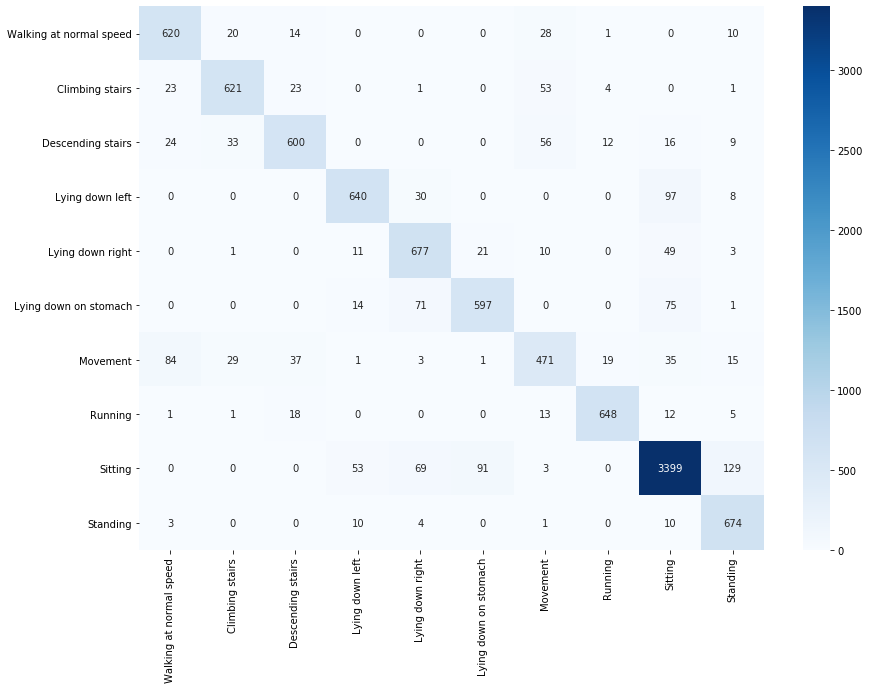

In [52]:
df_cm = pd.DataFrame(confusion_matrix(np.argmax(y_test, axis=1), run_interpreter(interpreter, X_test)),
                     index=class_labels.keys(),
                     columns=class_labels.keys())
plt.figure(figsize = (14,10))
sns.heatmap(df_cm, annot=True, fmt='g', cmap="Blues")

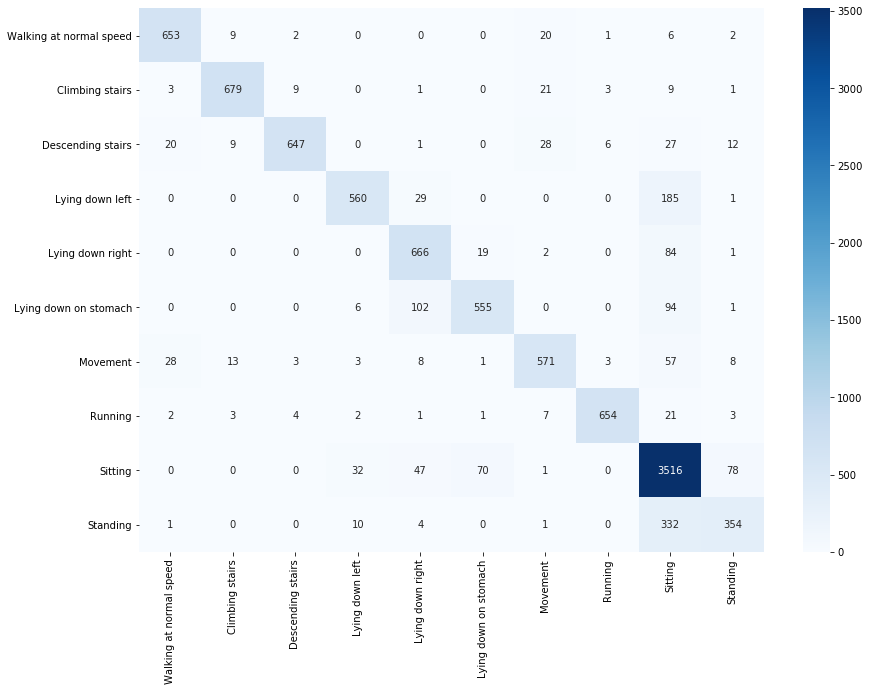

In [53]:
interpreter = tf.lite.Interpreter(model_path="models/cnn_model_hier_sitting_lyingback_thingy2021_2022_extended_filterv3.tflite")
interpreter.allocate_tensors()
cm = confusion_matrix(np.argmax(y_test, axis=1), run_interpreter(interpreter, X_test))

x = plot_heatmap(cm, class_labels.keys())

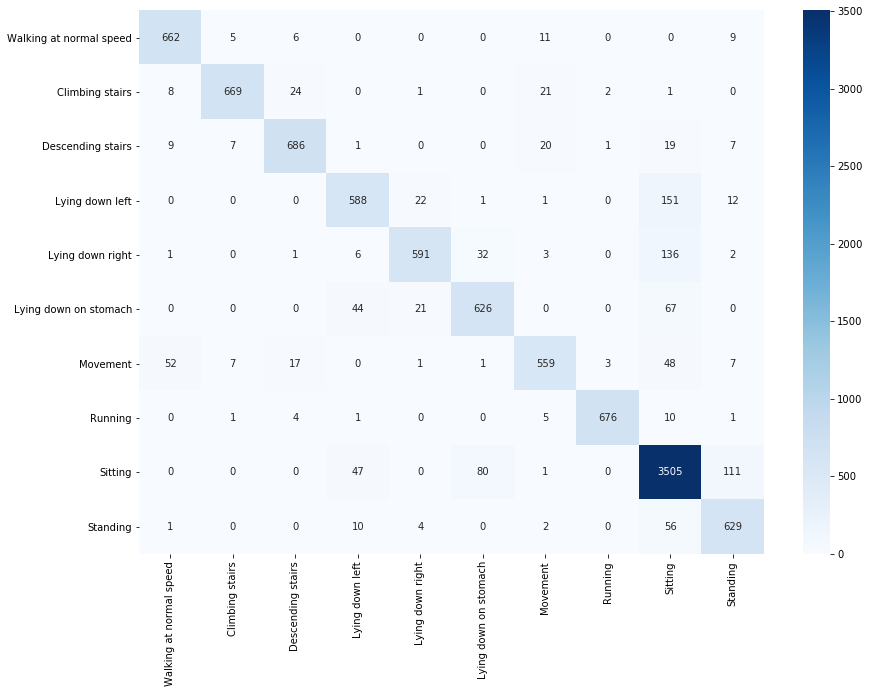

In [54]:
interpreter = tf.lite.Interpreter(model_path="models/cnn_model_hier_sitting_lyingback_thingy2021_2022_extended_filterv4.tflite")
interpreter.allocate_tensors()
cm = confusion_matrix(np.argmax(y_test, axis=1), run_interpreter(interpreter, X_test))

x = plot_heatmap(cm, class_labels.keys())